# EDA: Loan Credit

This project aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this project.

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

sns.set(color_codes=True)

In [2]:
# Reading dataset from local

application_data = pd.read_csv("application_data.csv")

In [3]:
# Determining the shape of the datset

application_data.shape

(307511, 122)

In [4]:
# Adjusting display

pd.set_option('display.max_rows', 150, 'display.max_columns', 150)

In [5]:
# Peeking at data.

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# Statistical overview

application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
#column names

application_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [8]:
# Percentage of null values in each column. Displaying columns with null values only.

null = application_data.isnull().sum()/len(application_data)*100
null[null>0].sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

#### Dropping columns where missing values are greater than 45% as imputing such large amount of data might adversely affect the data.

In [9]:
application_data = application_data.loc[:, application_data.isnull().mean() <= .45]

In [10]:
application_data.shape

(307511, 73)

In [11]:
# Checking the % of null values for each column in new dataset

null = application_data.isnull().sum()/len(application_data)*100
null = null[null>0].sort_values(ascending = False)
null

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

Some columns still have non-zero null percentage. We will handle these by imputation.
However, before we impute missing values, we need to fix errors in data and outliers as these may affect our imputed values.

## Fixing erroneous data

### 1. Negative values

In the cells shown below, we have changed the 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' because they had some negative values (which is not possible) and imputed them with absolute values for our analysis.

In [12]:
# Checking the values present in columns starting with 'DAYS'

print(application_data['DAYS_BIRTH'].unique())
print(application_data['DAYS_EMPLOYED'].unique())
print(application_data['DAYS_REGISTRATION'].unique())
print(application_data['DAYS_ID_PUBLISH'].unique())
print(application_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [13]:
# The columns starting with 'DAYS'

days_col = [col for col in application_data if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [14]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive

application_data[days_col]= abs(application_data[days_col])

In [15]:
# Re-checking the values present in columns starting with 'DAYS'

print(application_data['DAYS_BIRTH'].unique())
print(application_data['DAYS_EMPLOYED'].unique())
print(application_data['DAYS_REGISTRATION'].unique())
print(application_data['DAYS_ID_PUBLISH'].unique())
print(application_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120.  291. 2531. ... 6194. 5854. 6211.]
[1134.  828.  815. ... 3988. 3899. 3538.]


Negative values removed successfully.

### 2. 'XNA' values

Some columns have 'XNA' as values in them which isn't very comprehensible.

In [16]:
for col in application_data.columns:
    if 'XNA' in application_data[col].values:
        print (col)

CODE_GENDER
ORGANIZATION_TYPE


In [17]:
application_data.CODE_GENDER.value_counts()     

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Assuming that 'XNA' denotes that the applicant didn't want to disclose his/ her gender.

In [18]:
application_data.CODE_GENDER = application_data.CODE_GENDER.replace('XNA', 'Not disclosed')

In [19]:
application_data.CODE_GENDER.value_counts()

F                202448
M                105059
Not disclosed         4
Name: CODE_GENDER, dtype: int64

'XNA' values fixed.

## Outlier Handling

Segregating numerical and categorical values in separate lists.

In [20]:
num = application_data.describe().columns
list_num = list(num)

In [21]:
list_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

In [22]:
# Checking unique value counts for these numerical columns and storing them in a temporary list.

temp= []
for col in list_num:
    temp.append(len(application_data[col].value_counts()))

In [23]:
temp.sort()
temp

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 5,
 9,
 9,
 9,
 10,
 11,
 15,
 17,
 24,
 24,
 25,
 33,
 33,
 81,
 814,
 1002,
 2548,
 3773,
 5603,
 6168,
 12574,
 13672,
 15688,
 17460,
 119831,
 307511]

We see that some of these columns have very low count of individual values. Removing outliers from these columns won't make much sense (for example, boolean values). As there is a big jump from 81 to 814, we will be only removing outliers from columns having atleast 100 individual values.

In [24]:
for col in num:
    if len(application_data[col].value_counts())<100:
        list_num.remove(col)

In [25]:
list_num

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

We will now remove columns having normalised values (EXT_SOURCE_2, EXT_SOURCE_3). As the values range from 0-1.
Also, we will remove SK_ID_CURR as this columns hold individual IDs.

In [26]:
list_num

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [27]:
list_num.remove('EXT_SOURCE_2')
list_num.remove('EXT_SOURCE_3')
list_num.remove('SK_ID_CURR')

In [28]:
application_data[list_num].isnull().sum()

AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
DAYS_REGISTRATION           0
DAYS_ID_PUBLISH             0
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

Some of these columns have null values. Since they are very low in number, we can handle them by deletion of these specific rows. This will be done in the cells below.

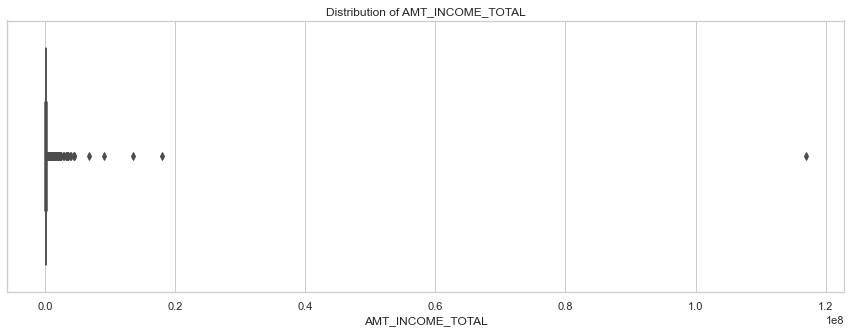

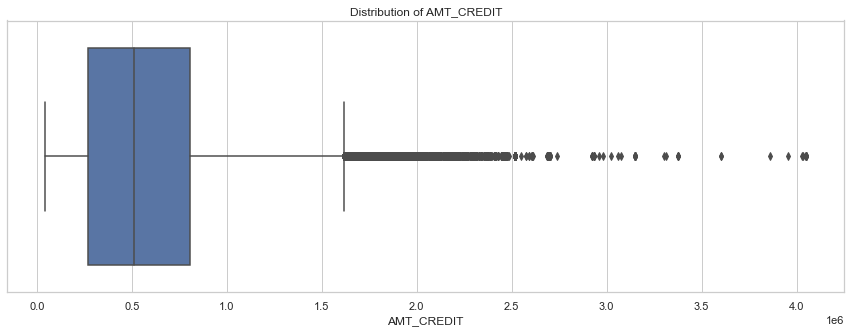

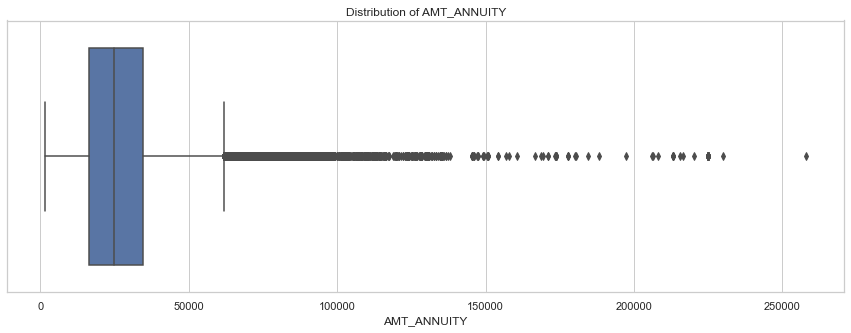

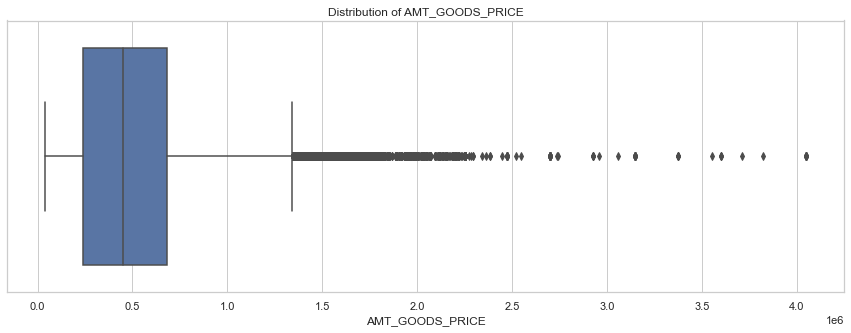

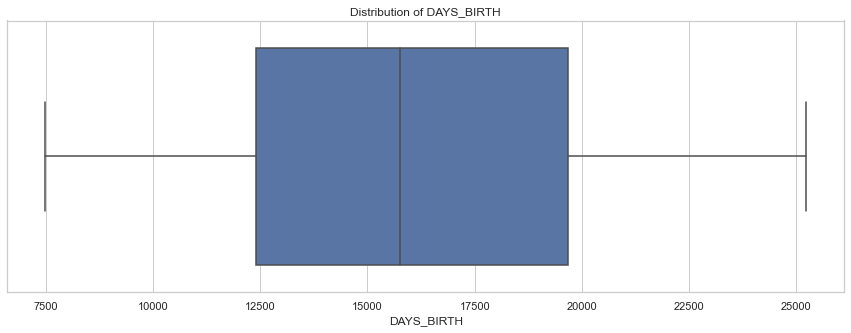

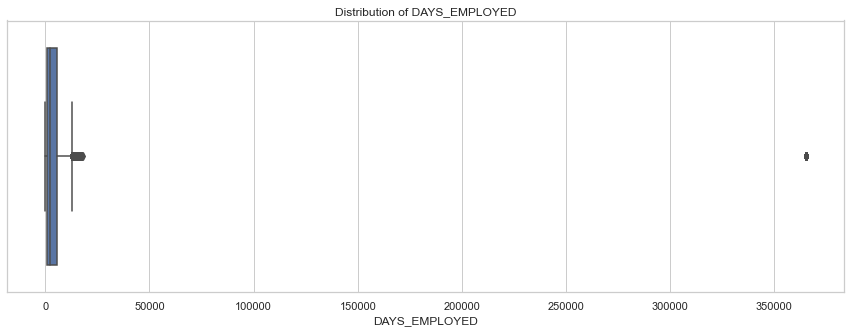

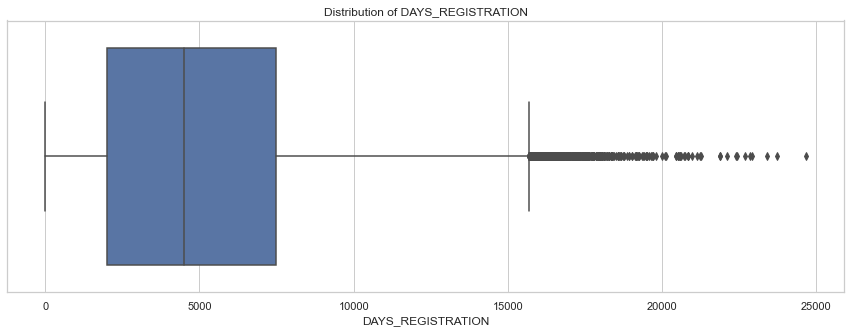

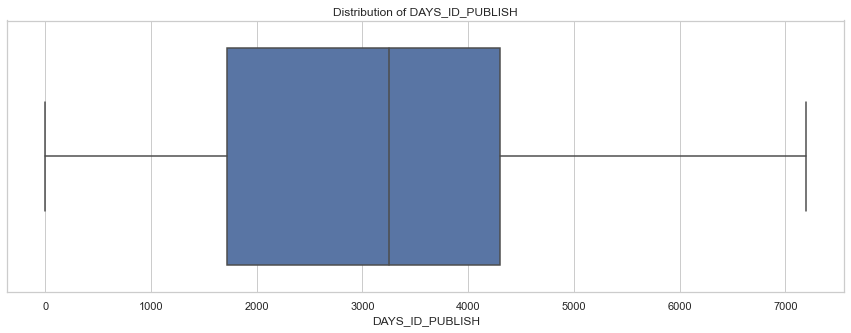

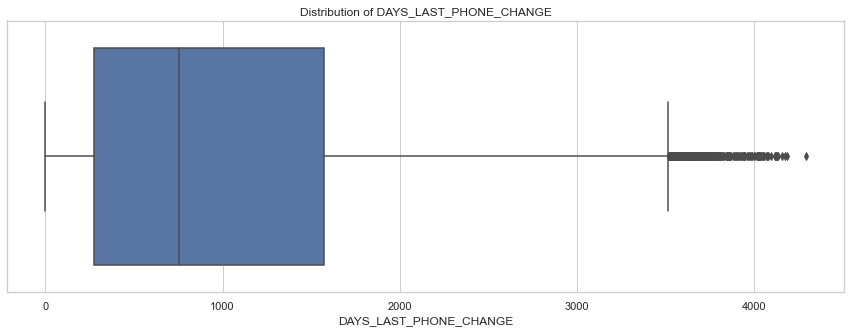

In [29]:
# Plotting boxplots to check for outliers.

sns.set_style('whitegrid')
for column in list_num:
    plt.figure(figsize=(15,5))
    sns.boxplot(application_data[column])
    plt.title('Distribution of '+column)
    plt.show()

We notice that some of these columns have outliers which should be removed.

As per IQR,

Outlier = less than Q1-1.5xIQR and greater than Q3+1.5xIQR.<br><br>
Since all of the boxplots have outliers on the right side, we will remove values greater than Q3+1.5xIQR.

In [30]:
for col in list_num:
    Q1 = application_data[col].quantile(0.25)
    Q3 = application_data[col].quantile(0.75)
    IQR = Q3 - Q1
    limit= Q3+1.5*IQR
    application_data = application_data[(application_data[col])<limit]

This will also remove rows having null values.

In [31]:
application_data[list_num].isnull().sum()

AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY               0
AMT_GOODS_PRICE           0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
DAYS_REGISTRATION         0
DAYS_ID_PUBLISH           0
DAYS_LAST_PHONE_CHANGE    0
dtype: int64

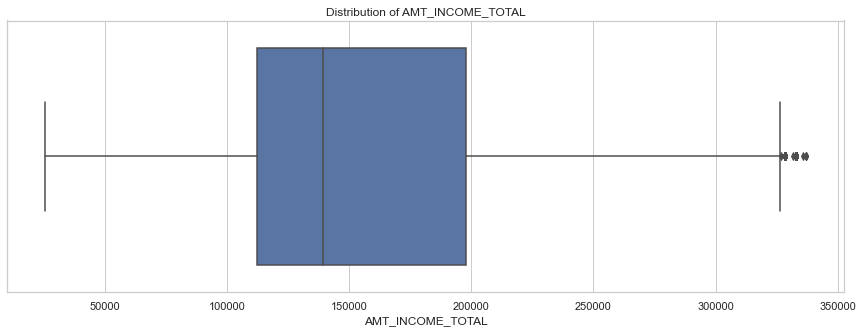

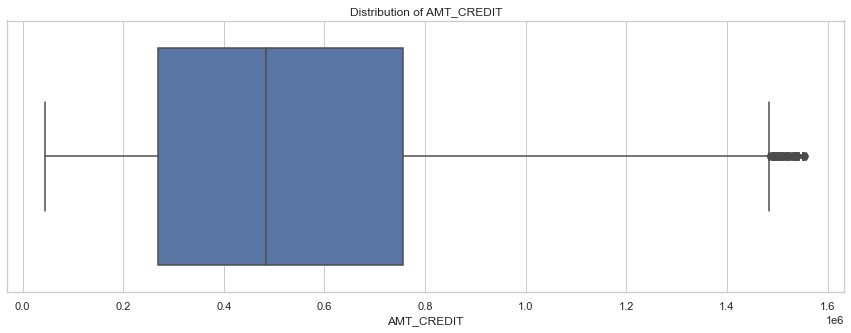

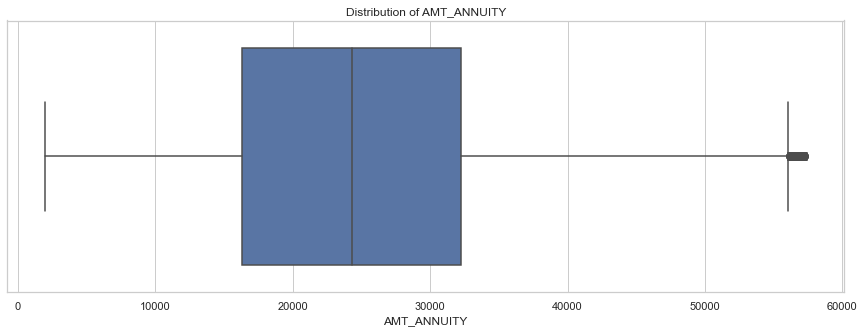

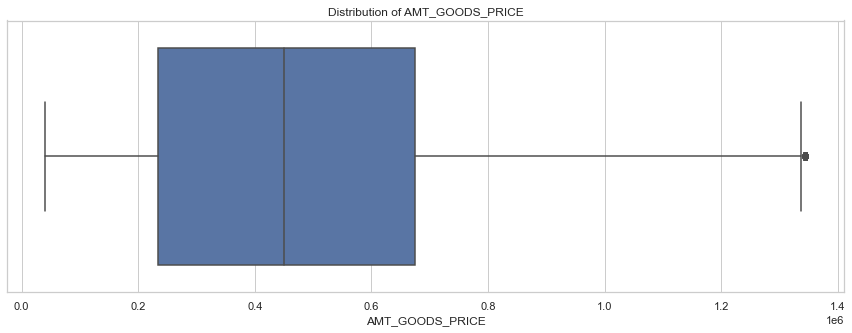

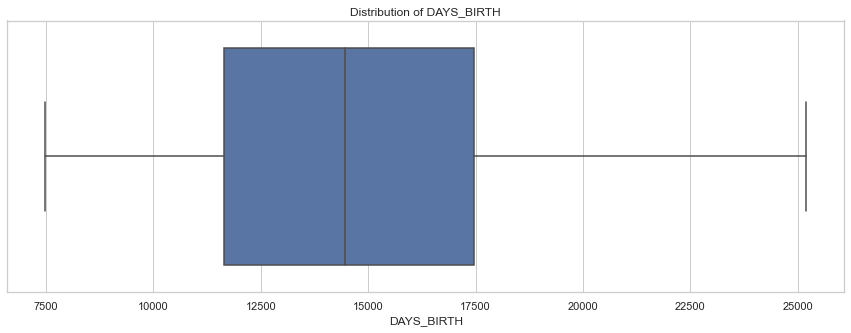

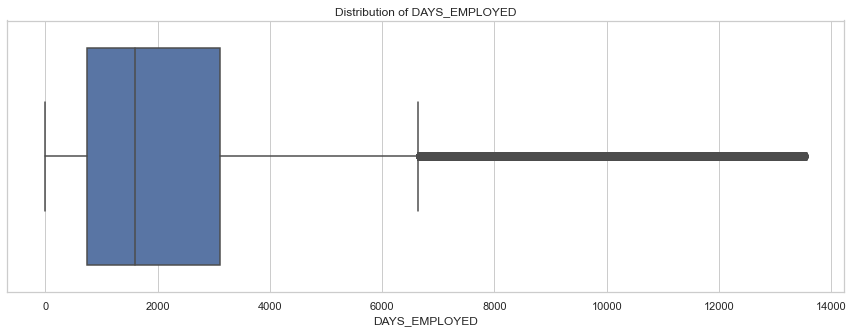

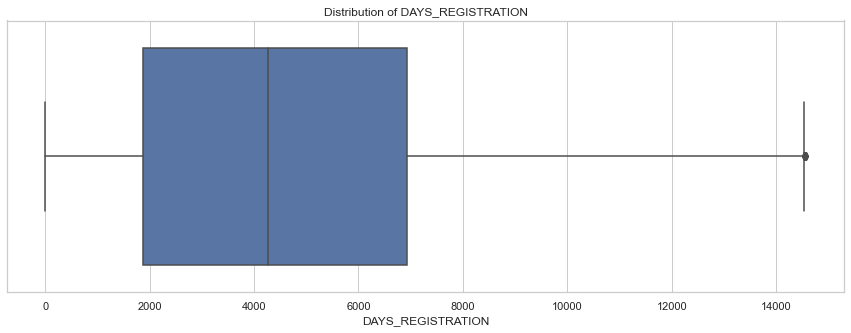

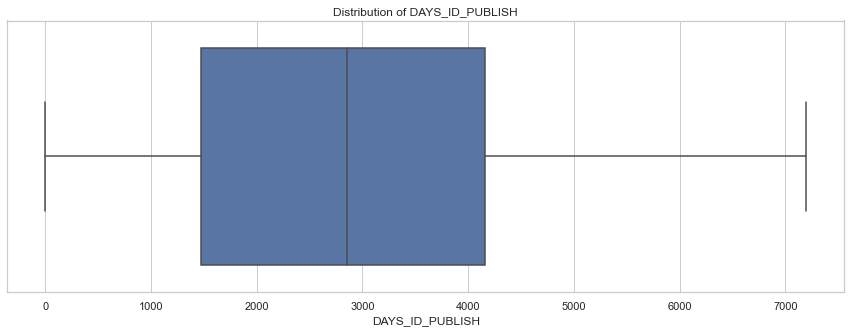

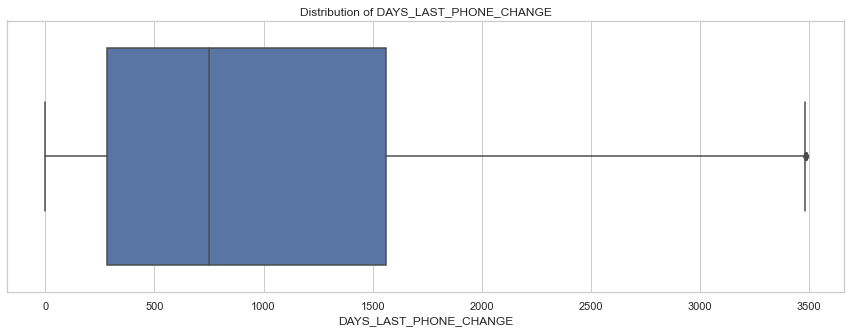

In [32]:
# Re-plotting box plots after removing outliers.

for column in list_num:
    plt.figure(figsize=(15,5))
    sns.boxplot(application_data[column])
    plt.title('Distribution of '+column)
    plt.show()

Outliers in numeric columns have been handled!!!

In [33]:
# Checking null percentage of columns.

null = application_data.isnull().sum()/len(application_data)*100
null = null[null>0].sort_values(ascending = False)
null

EXT_SOURCE_3                  20.146817
OCCUPATION_TYPE               16.170100
AMT_REQ_CREDIT_BUREAU_YEAR    13.780393
AMT_REQ_CREDIT_BUREAU_QRT     13.780393
AMT_REQ_CREDIT_BUREAU_MON     13.780393
AMT_REQ_CREDIT_BUREAU_WEEK    13.780393
AMT_REQ_CREDIT_BUREAU_DAY     13.780393
AMT_REQ_CREDIT_BUREAU_HOUR    13.780393
DEF_60_CNT_SOCIAL_CIRCLE       0.313456
OBS_60_CNT_SOCIAL_CIRCLE       0.313456
DEF_30_CNT_SOCIAL_CIRCLE       0.313456
OBS_30_CNT_SOCIAL_CIRCLE       0.313456
NAME_TYPE_SUITE                0.300003
EXT_SOURCE_2                   0.208522
dtype: float64

These columns still have some null values and the data is ready for imputation.

## Imputation

Upon segregating numerical and categorical columns we find that some 'FLAg_' columns have Y/N instead of 1/0. We will correct this to keep the data consistent.

In [34]:
# Numerical columns

list(application_data.describe().columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

In [35]:
# Categorical columns

list(set(application_data.columns) - set(application_data.describe().columns))

['NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR']

In [36]:
application_data.FLAG_OWN_CAR.value_counts()

N    143786
Y     79212
Name: FLAG_OWN_CAR, dtype: int64

In [37]:
application_data.FLAG_OWN_REALTY.value_counts()

Y    151700
N     71298
Name: FLAG_OWN_REALTY, dtype: int64

In [38]:
cols=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Function to convert columns

def convert(application_data, cols):
    for y in cols:
        application_data.loc[:,y].replace(('N', 'Y'), (0, 1), inplace=True)

# Calling the function for application_data

convert(application_data, cols)

In [39]:
application_data.FLAG_OWN_REALTY.value_counts()

1    151700
0     71298
Name: FLAG_OWN_REALTY, dtype: int64

In [40]:
list(application_data.describe().columns)

['SK_ID_CURR',
 'TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10'

In [41]:
list(set(application_data.columns) - set(application_data.describe().columns))

['NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE']

### Imputation in categorical variables

#### 1. OCCUPATION_TYPE

In [42]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 50959
Sales staff              29801
Core staff               24171
Drivers                  16578
Managers                 14919
High skill tech staff     9790
Accountants               8078
Medicine staff            7841
Security staff            6317
Cooking staff             5675
Cleaning staff            4455
Private service staff     2312
Low-skill Laborers        2047
Waiters/barmen staff      1282
Secretaries               1175
Realty agents              662
HR staff                   459
IT staff                   418
Name: OCCUPATION_TYPE, dtype: int64

In [43]:
application_data.OCCUPATION_TYPE.isnull().sum()

36059

Missing values in the column OCCUPATION_TYPE should not be replaced with the MODE value. As here it's not correct to impute 30% of a column based on assumption that most of the clients will be Laborers.

We can instead handle these missing values by creating a separate category "Unknown".

In [44]:
# Filling Nulls.

application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [45]:
application_data.OCCUPATION_TYPE.isnull().sum()

0

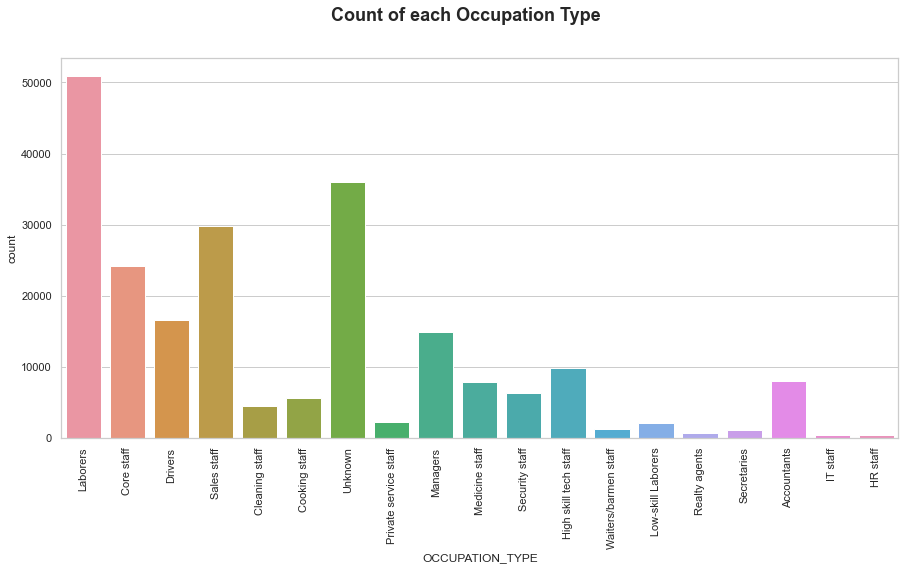

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(application_data.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.suptitle('Count of each Occupation Type', fontweight = 'bold', fontsize = 18)

plt.show()

#### 2. NAME_TYPE_SUITE

Missing values in Categorical variables NAME_TYPE_SUITE should be replaced with the MODE value 'Unaccompanied'.

In [47]:
# Finding Mode.

application_data['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [48]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      181350
Family              28108
Spouse, partner      8617
Children             2035
Other_B              1340
Other_A               688
Group of people       191
Name: NAME_TYPE_SUITE, dtype: int64

In [49]:
application_data.NAME_TYPE_SUITE.isnull().sum()

669

In [50]:
# Filling Nulls.

application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [51]:
application_data.NAME_TYPE_SUITE.isnull().sum()

0

### Imputation in numerical variables

<b>
    1. <br>
        'AMT_REQ_CREDIT_BUREAU_YEAR',<br>
        'AMT_REQ_CREDIT_BUREAU_MONTH',<br>
        'AMT_REQ_CREDIT_BUREAU_WEEK',<br>
        'AMT_REQ_CREDIT_BUREAU_DAY',<br>
        'AMT_REQ_CREDIT_BUREAU_HOUR',<br>
        'AMT_REQ_CREDIT_BUREAU_QRT'<br>
</b>

In [52]:
# Statistical overview.

application_data[['AMT_REQ_CREDIT_BUREAU_YEAR',
                  'AMT_REQ_CREDIT_BUREAU_QRT',
                  'AMT_REQ_CREDIT_BUREAU_MON',
                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_DAY',
                  'AMT_REQ_CREDIT_BUREAU_HOUR',]].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               192268.000000              192268.000000   
mean                     1.873021                   0.257099   
std                      1.829615                   0.605664   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     23.000000                  19.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              192268.000000               192268.000000   
mean                    0.267325                    0.033838   
std                     0.908352                    0.201905   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    24.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              192268.000000               192268.000000  
mean                    0.006969                    0.006616  
std                     0.110712                    0.085258  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

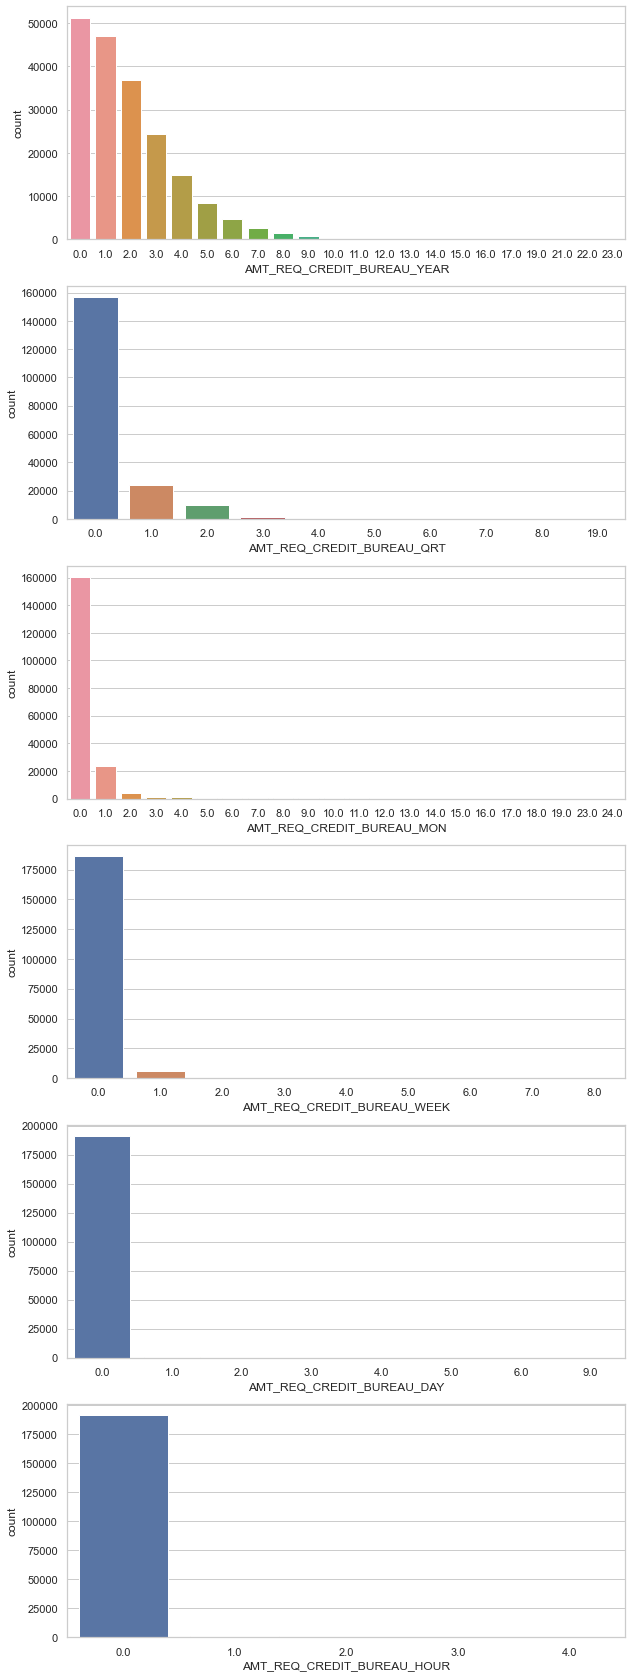

In [53]:
# Countplots

sns.set_style('whitegrid')

f,axes = plt.subplots(6,1, figsize= (10,30))

sns.countplot(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=axes[0])
sns.countplot(application_data['AMT_REQ_CREDIT_BUREAU_QRT'], ax=axes[1])
sns.countplot(application_data['AMT_REQ_CREDIT_BUREAU_MON'], ax=axes[2])
sns.countplot(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=axes[3])
sns.countplot(application_data['AMT_REQ_CREDIT_BUREAU_DAY'], ax=axes[4])
sns.countplot(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=axes[5])

plt.show()

From the above analysis it is clear that we can safely impute the missing values in the columns 

'AMT_REQ_CREDIT_BUREAU_YEAR',<br>
'AMT_REQ_CREDIT_BUREAU_MONTH',<br>
'AMT_REQ_CREDIT_BUREAU_WEEK',<br>
'AMT_REQ_CREDIT_BUREAU_DAY',<br>
'AMT_REQ_CREDIT_BUREAU_HOUR',<br>
'AMT_REQ_CREDIT_BUREAU_QRT'<br>

with the mode, which is the value '0'. <br><br>
Since they all are number of credit enquiries (discrete variables), replacing missing values with the most frequent value rather than mean would make more sense.

In [54]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)

In [55]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)

In [56]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)

In [57]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)

In [58]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)

In [59]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)

#### 2. EXT_SOURCE_3

In [60]:
# Statistical overview

application_data.EXT_SOURCE_3.describe()

count    178071.000000
mean          0.498693
std           0.196476
min           0.000527
25%           0.355639
50%           0.520898
75%           0.657784
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

In [61]:
application_data.EXT_SOURCE_3.mean()-application_data.EXT_SOURCE_3.median()

-0.022204829765964273

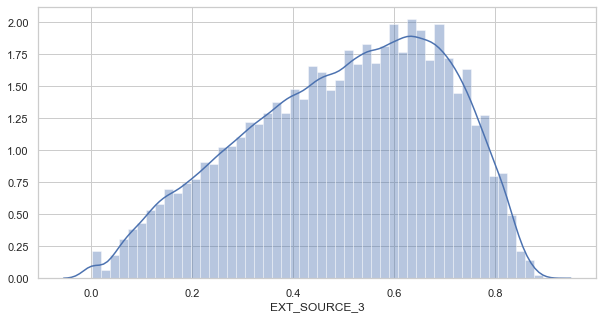

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(application_data.EXT_SOURCE_3)
plt.show()

In [63]:
application_data.EXT_SOURCE_3.mode()

0    0.7463
dtype: float64

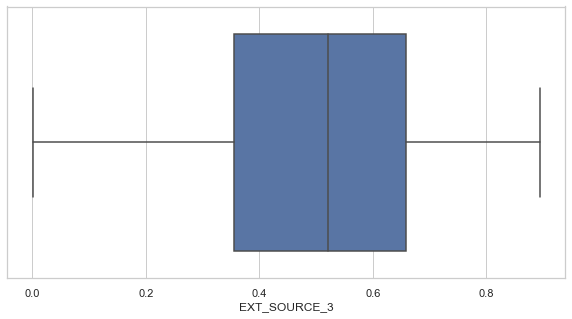

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(application_data.EXT_SOURCE_3)
plt.show()

From above, it is clear that this data is 'right-skewed'. Hence, the mean of the data is shifted right due to the skewness. It will be better to impute this column by Median. Also, the difference between median and mean is low compared to mode.

In [65]:
# Imputing will median.

application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median(), inplace=True)

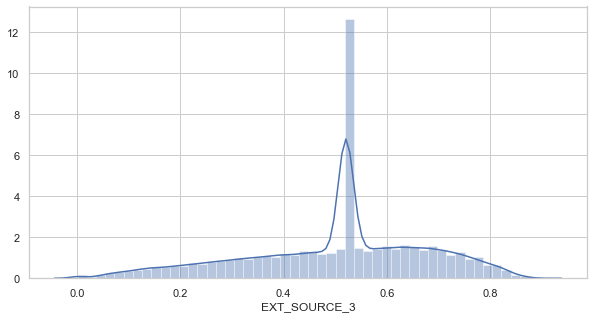

In [66]:
# Distplot after imputation.

plt.figure(figsize=(10,5))
sns.distplot(application_data.EXT_SOURCE_3)
plt.show()

We can clearly see that after imputation the skewness of data has somewhat been fixed.

In [67]:
null = application_data.isnull().sum()/len(application_data)*100
null = null[null>0].sort_values(ascending = False)
null

DEF_60_CNT_SOCIAL_CIRCLE    0.313456
OBS_60_CNT_SOCIAL_CIRCLE    0.313456
DEF_30_CNT_SOCIAL_CIRCLE    0.313456
OBS_30_CNT_SOCIAL_CIRCLE    0.313456
EXT_SOURCE_2                0.208522
dtype: float64

All remaining null percantages are below 1%. Missing values handled!!!

### Errors in Data types and Data

In [68]:
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

Following variabes could not be float (number of days,number of enquiries, 
number of family members and number of people in social circle) as these are 
discrete variables. So converting them to integer type.

In [69]:
# Converting to type int

application_data['DAYS_REGISTRATION'] = application_data['DAYS_REGISTRATION'].astype(int,errors='ignore')
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
application_data['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
application_data['DEF_30_CNT_SOCIAL_CIRCLE'] = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_DAY'] = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int,errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int,errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_MON'] = application_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(int,errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int,errors='ignore')
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int,errors='ignore')

In [70]:
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION                int32
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [71]:
application_data.describe()

SK_ID_CURR         TARGET   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  222998.000000  222998.000000  222998.000000    222998.000000   
mean   278156.519265       0.090799       0.355214         0.680275   
std    102835.953772       0.287324       0.478579         0.466371   
min    100002.000000       0.000000       0.000000         0.000000   
25%    189016.250000       0.000000       0.000000         0.000000   
50%    278136.500000       0.000000       0.000000         1.000000   
75%    367062.750000       0.000000       1.000000         1.000000   
max    456255.000000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  222998.000000     222998.000000  2.229980e+05  222998.000000   
mean        0.501677     155107.957581  5.392466e+05   25103.778462   
std         0.764635      60557.477371  3.203742e+05   11252.072523   
min         0.000000      25650.000000  4.500000e+04    1980.000000   
25%         0.000000     112500.000000  2.700000e+05   16321.500000   
50%         0.000000     139500.000000  4.847895e+05   24309.000000   
75%         1.000000     198000.000000  7.551900e+05   32206.500000   
max        19.000000     337050.000000  1.557544e+06   57366.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     2.229980e+05               222998.000000  222998.000000   
mean      4.802288e+05                    0.020153   14658.519301   
std       2.862861e+05                    0.012811    3658.573618   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.340000e+05                    0.010006   11648.000000   
50%       4.500000e+05                    0.018850   14453.000000   
75%       6.750000e+05                    0.026392   17462.000000   
max       1.345500e+06                    0.072508   25192.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
count  222998.000000      222998.000000    222998.000000    222998.0   
mean     2317.253908        4620.760801      2782.879851         1.0   
std      2252.102823        3196.859774      1511.642859         0.0   
min         0.000000           0.000000         0.000000         1.0   
25%       747.000000        1869.000000      1470.000000         1.0   
50%      1603.000000        4275.000000      2854.000000         1.0   
75%      3104.000000        6934.750000      4161.000000         1.0   
max     13551.000000       14577.000000      7197.000000         1.0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   222998.000000    222998.000000     222998.000000  222998.000000   
mean         0.999960         0.246011          0.998031       0.271810   
std          0.006353         0.430686          0.044326       0.444893   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  222998.000000    222998.000000         222998.000000   
mean        0.058812         2.248895              2.072494   
std         0.235273         0.946941              0.493549   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                222998.000000            222998.000000   
mean                      2.052772                12.146930   
std                       

#### AGE

In [72]:
application_data.DAYS_BIRTH.describe()

count    222998.000000
mean      14658.519301
std        3658.573618
min        7489.000000
25%       11648.000000
50%       14453.000000
75%       17462.000000
max       25192.000000
Name: DAYS_BIRTH, dtype: float64

DAYS_BIRTH column is age of the peron at the time of loan application.<br>
This could be converted to age in years by dividing by 365.25 (considering leap years)

In [73]:
application_data['AGE']= application_data['DAYS_BIRTH']//365.25
application_data.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [74]:
application_data.AGE.describe()

count    222998.000000
mean         39.632176
std          10.014320
min          20.000000
25%          31.000000
50%          39.000000
75%          47.000000
max          68.000000
Name: AGE, dtype: float64

In [75]:
#Creating binned variable for AGE

application_data['AGE_GROUP']= pd.cut(application_data.AGE,bins=np.linspace(20 ,70,num=11))

In [76]:
# Checking binned variable

application_data.AGE_GROUP.value_counts()

(35.0, 40.0]    38130
(30.0, 35.0]    35006
(40.0, 45.0]    34126
(25.0, 30.0]    33441
(45.0, 50.0]    28666
(50.0, 55.0]    24723
(20.0, 25.0]    15614
(55.0, 60.0]     9832
(60.0, 65.0]     3035
(65.0, 70.0]      424
Name: AGE_GROUP, dtype: int64

Binning of AGE into AGE_GROUP done.

## Checking Imbalance in data.

In [77]:
# Checking the target variable value counts

application_data.TARGET.value_counts()

0    202750
1     20248
Name: TARGET, dtype: int64

There seems to be a heavy imbalance in the dataset. Let's probe.

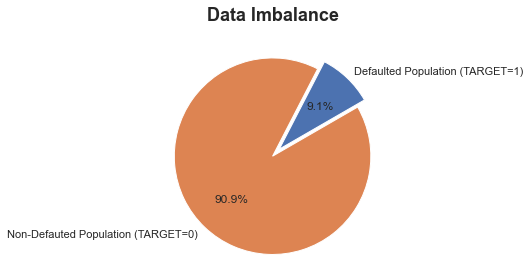

In [78]:
# Pie chart of Defaulters vs Non-Defaulters

count1 = application_data.TARGET.value_counts()[1]
count0 = application_data.TARGET.value_counts()[0]
        
count1 = (count1/len(application_data['TARGET']))*100
count0 = (count0/len(application_data['TARGET']))*100

x = ['Defaulted Population (TARGET=1)','Non-Defauted Population (TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data Imbalance\n',fontsize=18, fontweight= 'bold')
plt.show()

<b> Ratio of Imbalance

In [79]:
application_data.TARGET.value_counts()[1] / application_data.TARGET.value_counts()[0]

0.0998668310727497

This is the ratio of the count of defauters to the count of all other cases in the given dataset.<br><br>
Also, we can say that about 9.1% of people faced difficulties in repayment of the loan.

## Creating subsets of the main data.

Splitting Data with respect to TARGET=0 and TARGET=1

In [80]:
T0= application_data[application_data.TARGET==0]
T1= application_data[application_data.TARGET==1]

In [81]:
T0.shape

(202750, 74)

In [82]:
T1.shape

(20248, 74)

## Univariate Analysis

In [83]:
#categorical cols

col_cat= list(set(application_data.columns) - set(application_data.describe().columns))
col_cat

['NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'AGE_GROUP',
 'NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE']

In [84]:
#numerical cols

col_num= list(set(application_data.describe().columns))
col_num

['EXT_SOURCE_2',
 'REG_REGION_NOT_WORK_REGION',
 'AMT_CREDIT',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_20',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_14',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_OWN_REALTY',
 'DAYS_EMPLOYED',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_15',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'TARGET',
 'FLAG_DOCUMENT_12',
 'DAYS_REGISTRATION',
 'FLAG_CONT_MOBILE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'REGION_POPULATION_RELATIVE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_DOCUMENT_6',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'SK_ID_CURR',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_19',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_5',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_10',
 'AGE',
 'FLAG_DOCUMENT_16',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'REGIO

### 1. Categorical Columns: Total Count and Percentage Count

In [85]:
def plotting(df, t0, t1, column):
    
    df=df
    t0=t0
    t1=t1
    col=column
    
    print('\n')
    
    fig= plt.figure(figsize=(25,7))
    
    ax1= plt.subplot(1,2,1)
    plt.yscale('log')
    sns.countplot(x=column, hue= 'TARGET', data= df, ax= ax1)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count', fontsize=14)
    new_labels = ['Non-defaulters', 'Defaulters']
    leg = ax1.axes.get_legend()
    for t, l in zip(leg.texts, new_labels): t.set_text(l)
   
    ax2= plt.subplot(1,2,2)
    plt.yscale('log')
    df2= pd.DataFrame()
    df2['Non-Defaulters']= ((t0[col].value_counts())/len(t0))
    df2['Defaulters']= ((t1[col].value_counts())/len(t1))
    df2.plot.bar(ax= ax2)
    plt.title('Plotting data for target in terms of percentage', fontsize= 14)
    
    fig.suptitle(col, fontsize=18, fontweight='bold')
    
#     fig.tight_layout()
    plt.show()

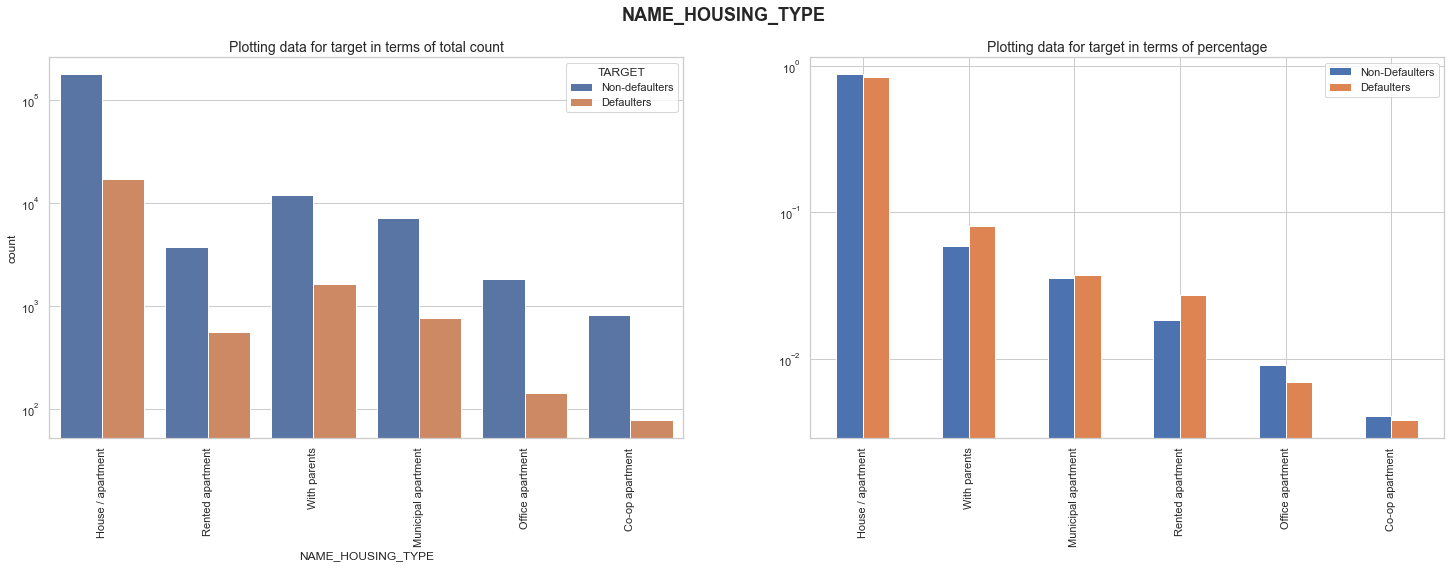

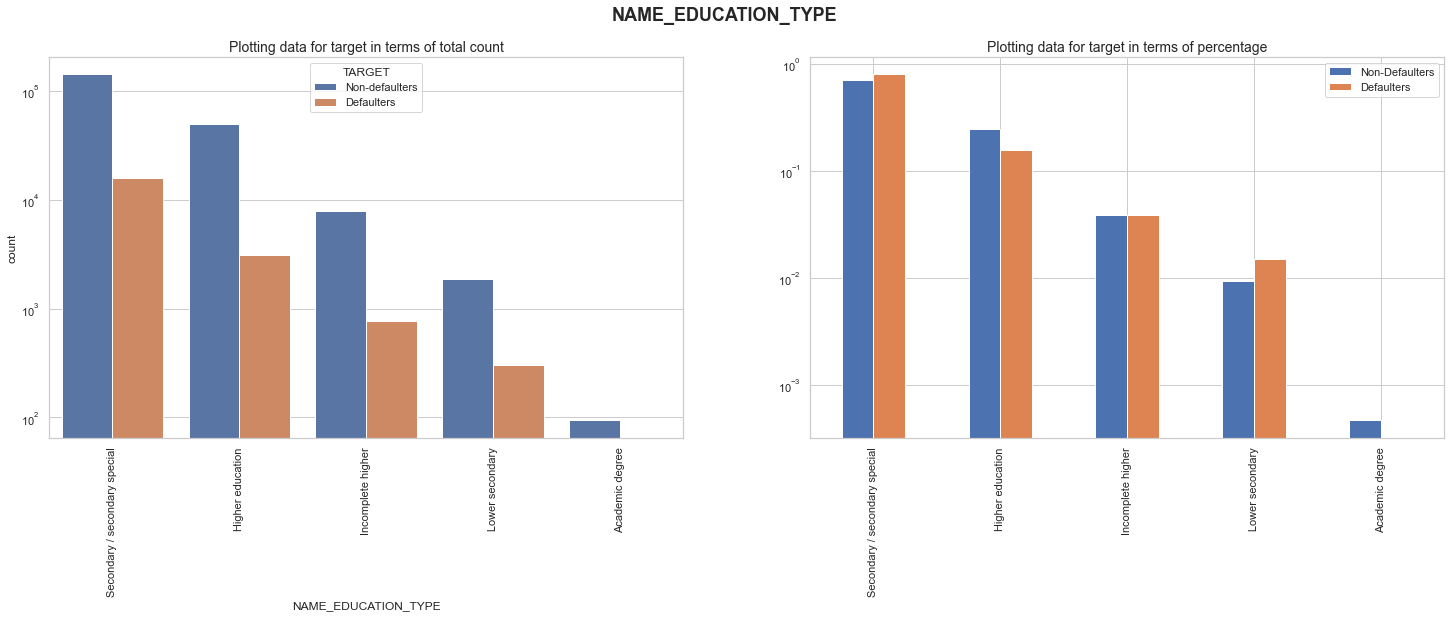

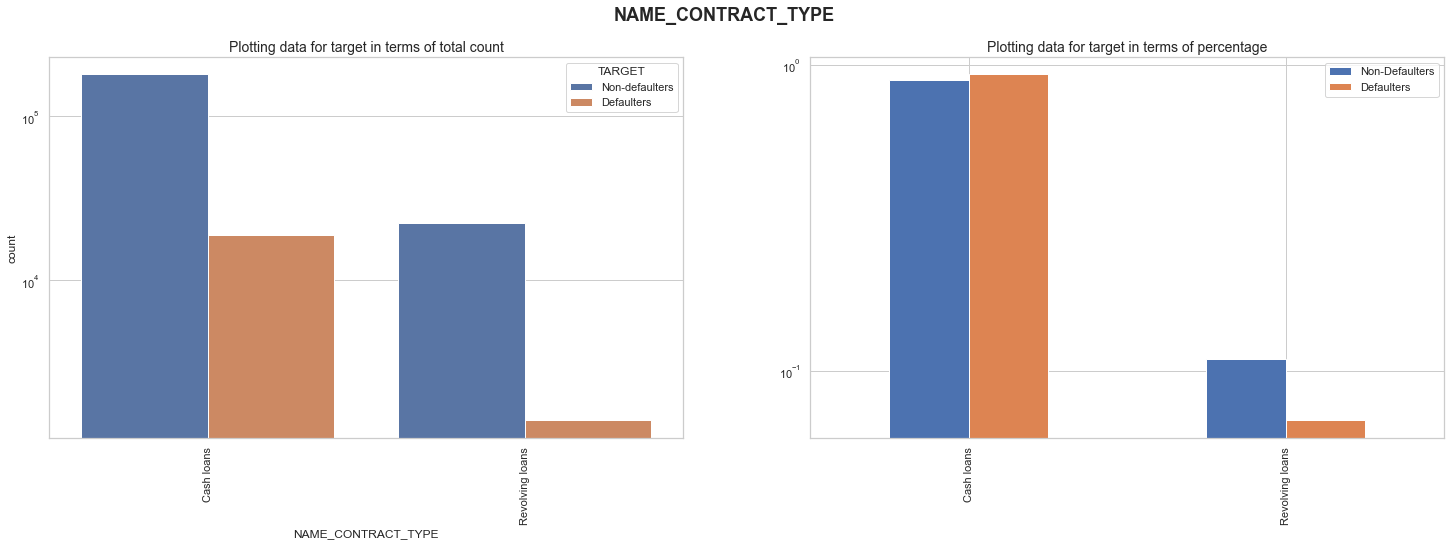

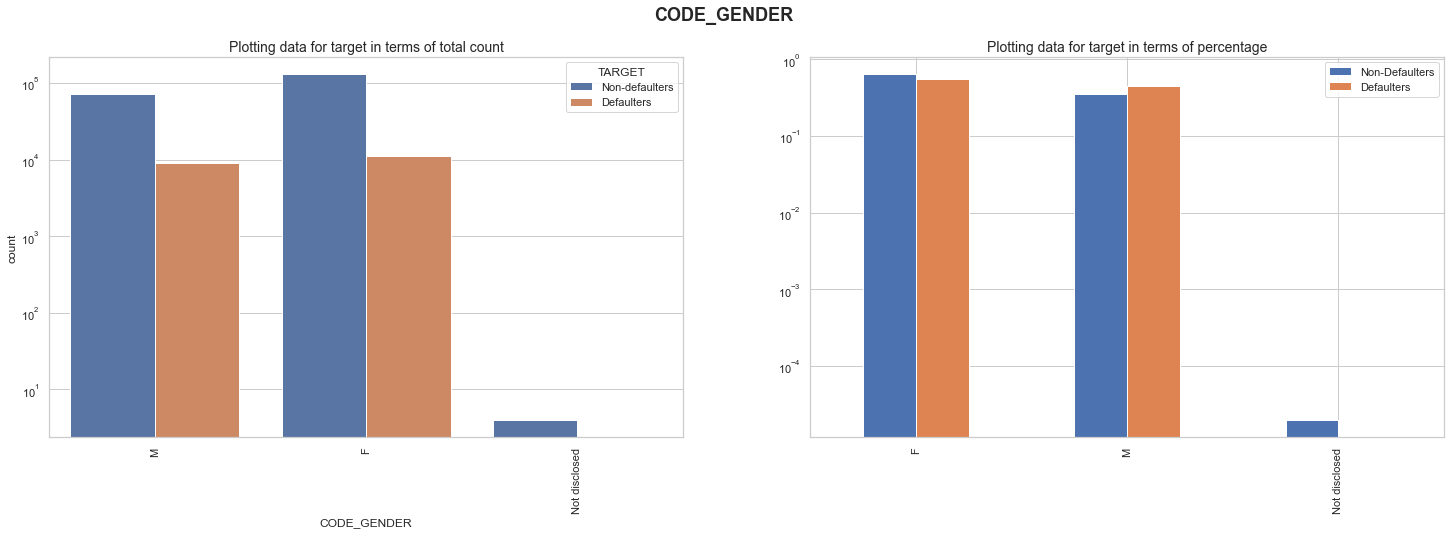

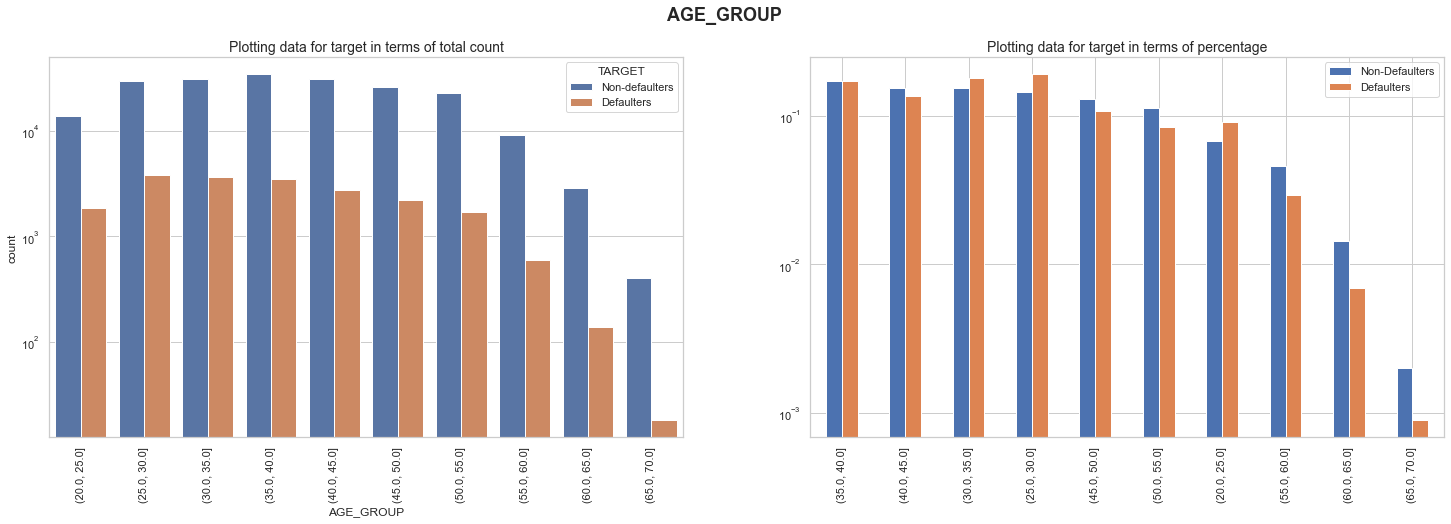

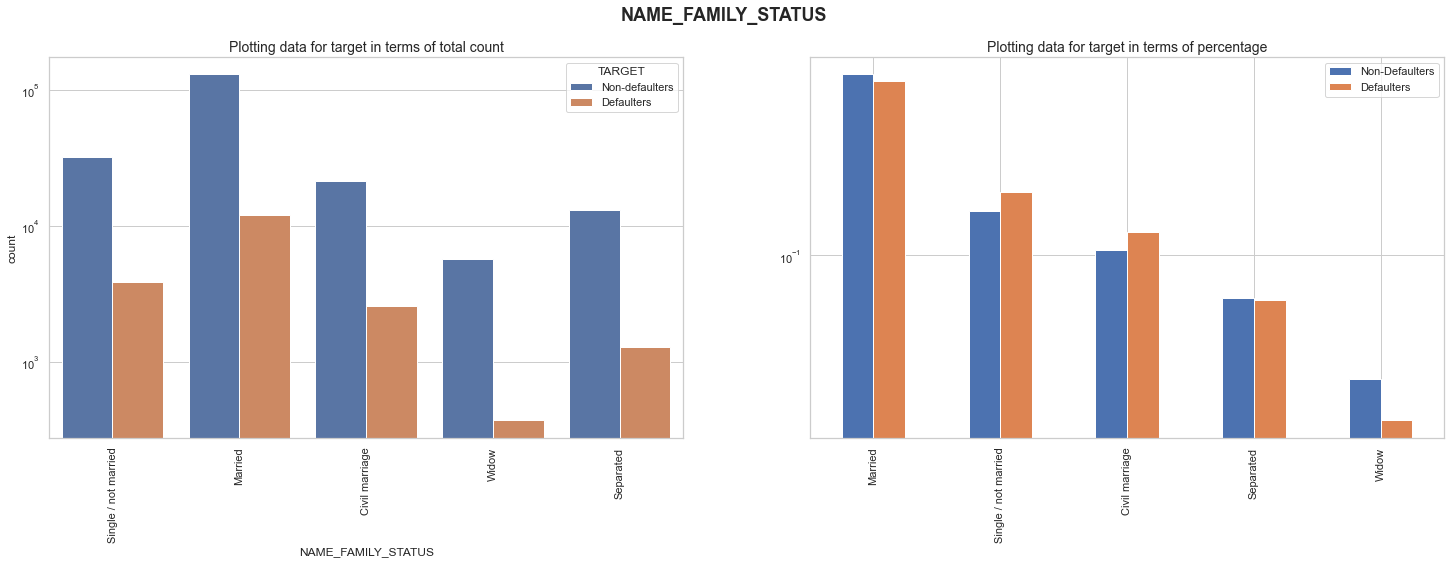

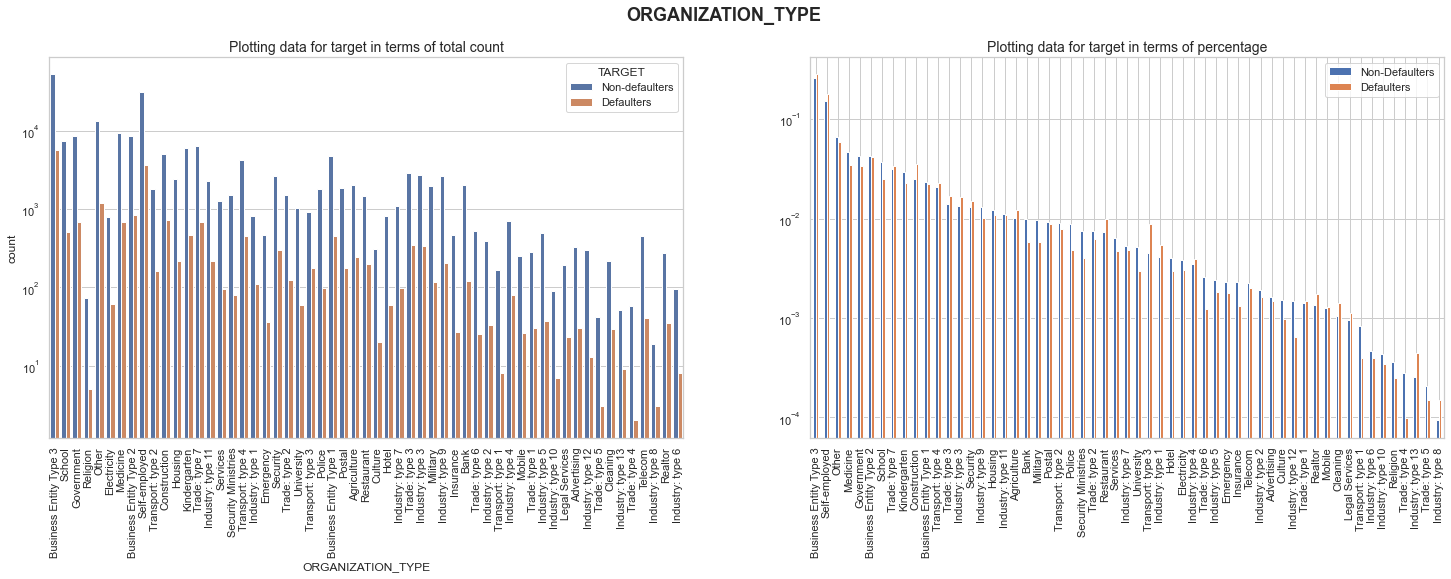

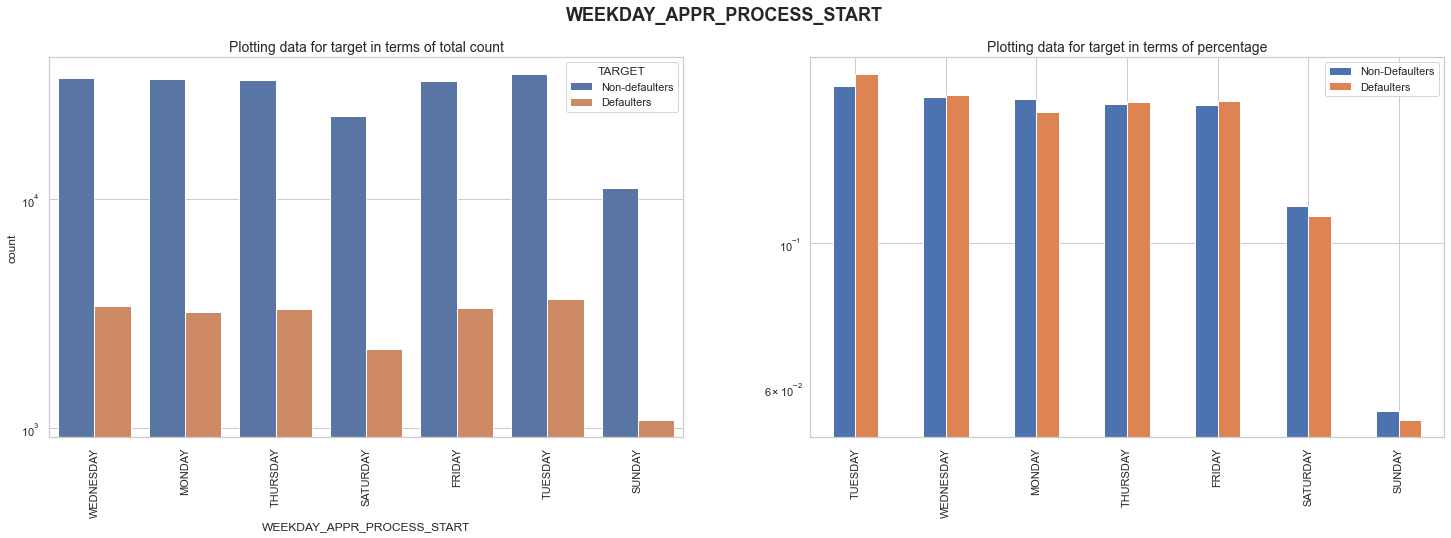

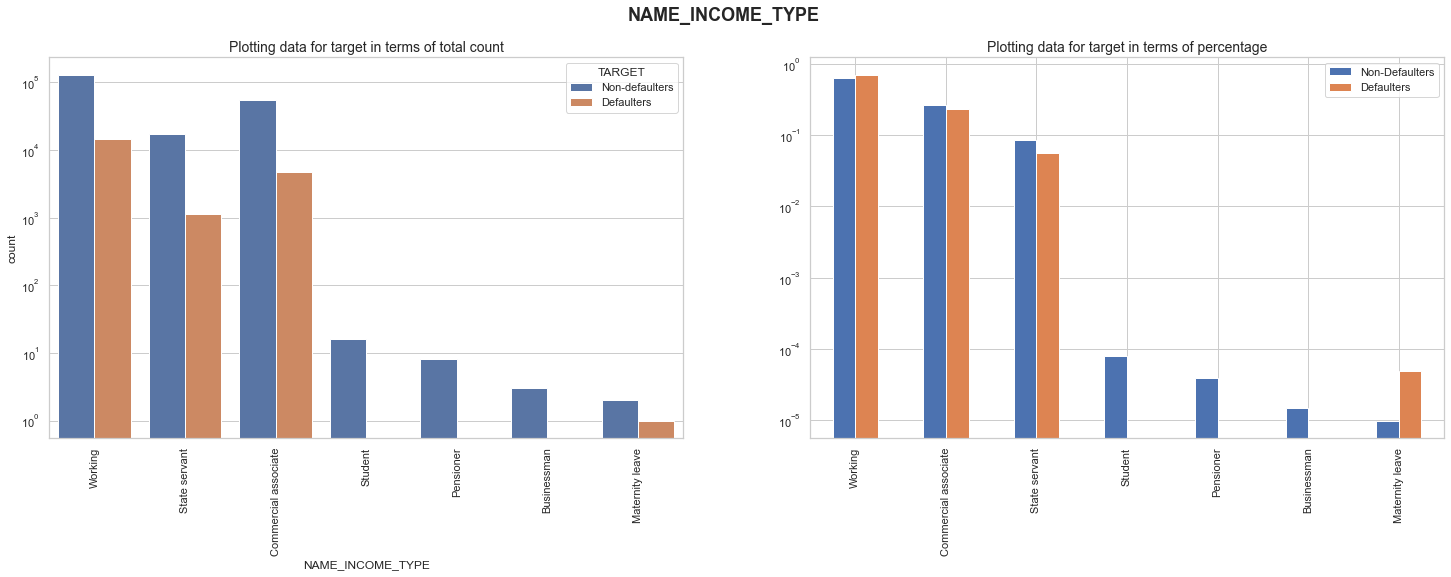

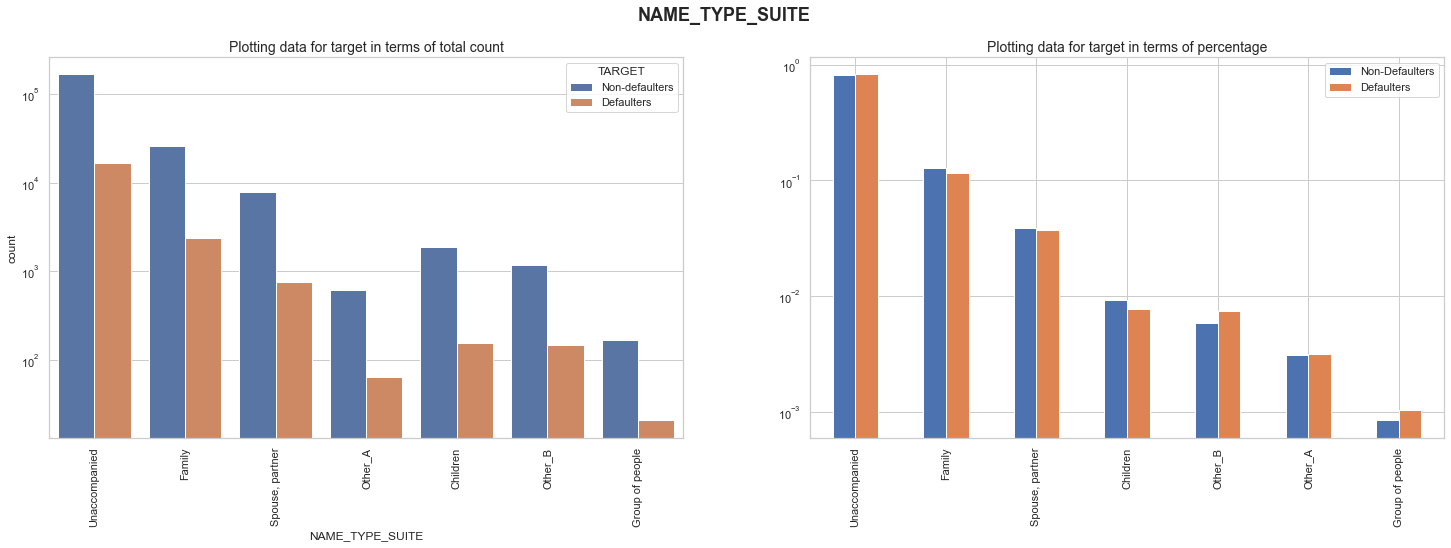

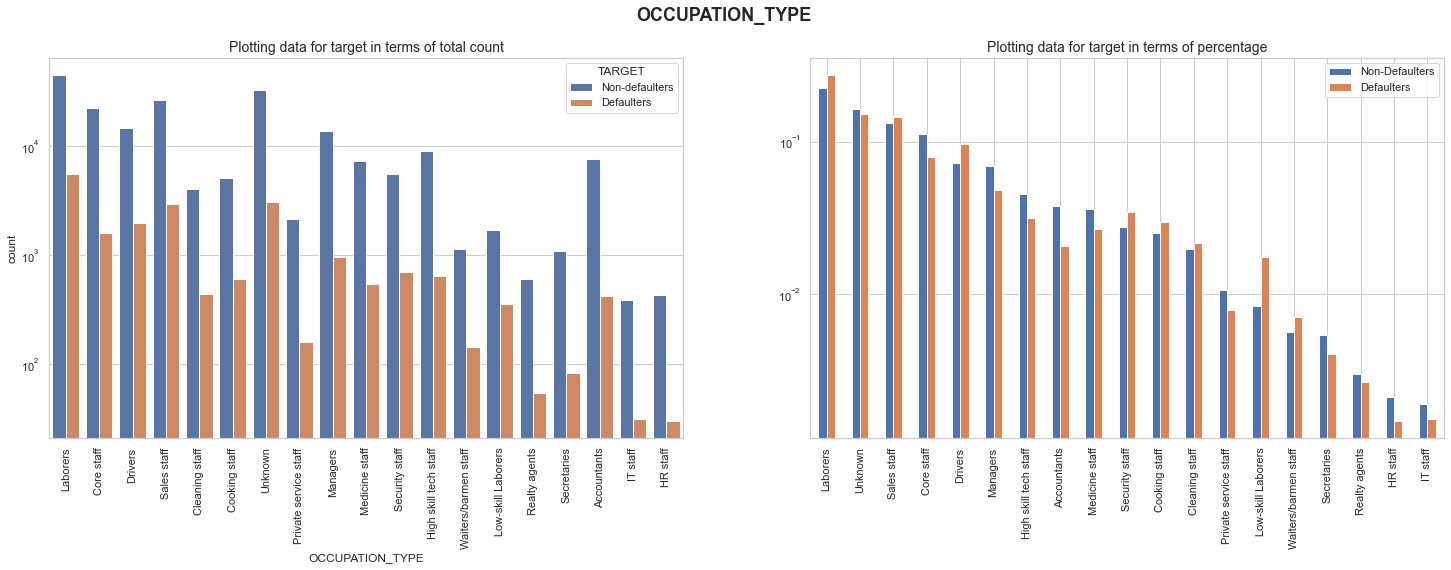

In [86]:
for column in col_cat:
    plotting(application_data, T0, T1, column)

Note: The above graphs are plotted in log scale due to the imbalances in dataset. It improves readability and makes it easier to draw qualitative inferences.

Inferences drawn from the above graphs:

- People are likely to repay the loan if it is of revolving type as compared to cash loans.
- The number of cash loans is higher as compared to the count of revolving loans.<br>
<br>
- We can say females applied for loan more than the males.
- Females are more sincere towards repaying the loans as defaulter percentage is lower as compared to males.<br><br>
- Working class has higher count and percentage of defaulters.
- State servants have low chances of being in defaulter list as compared to working and commercial associates.<br><br>
- Secondary education type people are likely to be defaulters we can say that the percentage is higher as more number of people are applying for loans in this category.<br><br>
- Huge  chunk of people that applied for loans were laborers.
- Laborers are more likely to be defaulters followed by sales and drivers. 
- The percentage of Core staff and Accountants who were defaulters was low.
<br><br>
- Most of the people who required loan were between 20 to 50.
- People between the age of 20 to 35 are likely to be defaulters.
- The count of applicants older than 55 years of age was low.
<br><br>
- Most of the people that applied for loans were married.
- High percentage of Single and Civil married people were defaulters.
<br><br>
- Population living in Rented apartments and those living with parents have higher default rate as they have higher proportion in the defaulted population as compared to non defaulted population. 
- Living in rental apartment means a cash out flow towards rent and thus less cash left for repayment of loan. 
- Living with parents may suggest that the income is not too high and thus difficulty in repayment of loan.
- Large amount of loans was taken by own house/apartment people and they were less likely to be defaulters.

### 2. Numerical Columns

#### Finding Correlation: Non-Defaulters

#### Heatmap

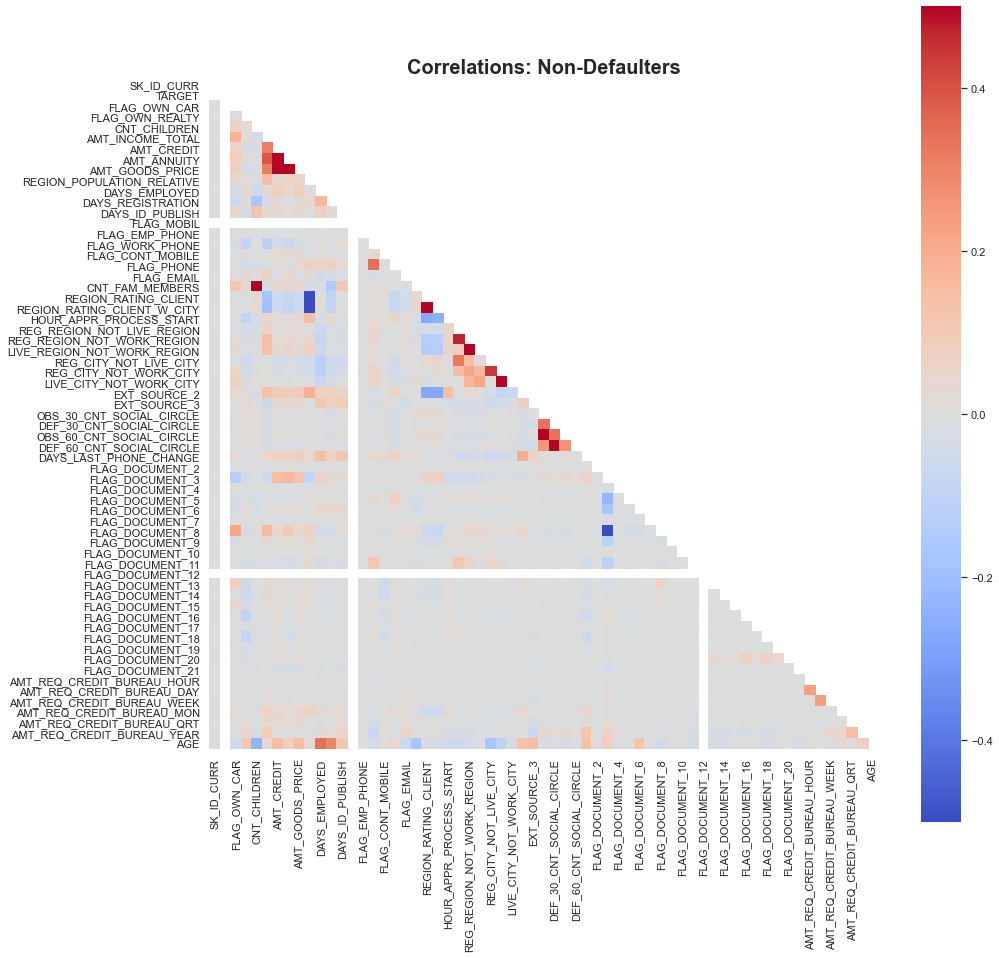

In [87]:
# Correlation Table.

corr= T0.corr()

# Masking repeated values.

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

# Plotting

f, ax= plt.subplots(figsize=(15,15))
plt.title('Correlations: Non-Defaulters', fontsize= 20, fontweight= 'bold')
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-0.5, vmax=0.5, square=True, cmap='coolwarm')

From above heatmap we can see that there isn't a very strong correlation between most of the drivers. However, some drivers do share strong correlations. We find top 10 such drivers.

#### Finding top 10 correlation for Non-Defaulters

In [88]:
# Finding absolute highest correlation coefficients after removing duplicates, self correlation and no variation columns.

corr0= T0.corr().abs().unstack().sort_values(kind='quicksort')
corr0= corr0.dropna()
corr0= corr0[corr0 != 1.0]
corr0= corr0.drop_duplicates()
corr0

CNT_CHILDREN                 FLAG_EMP_PHONE                5.280344e-07
SK_ID_CURR                   CNT_CHILDREN                  1.141113e-06
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_MON     1.237796e-06
OBS_30_CNT_SOCIAL_CIRCLE     DAYS_EMPLOYED                 4.849753e-06
AMT_REQ_CREDIT_BUREAU_YEAR   REGION_POPULATION_RELATIVE    5.083523e-06
                                                               ...     
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      8.638283e-01
CNT_FAM_MEMBERS              CNT_CHILDREN                  8.924493e-01
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          9.503381e-01
AMT_CREDIT                   AMT_GOODS_PRICE               9.813029e-01
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      9.985006e-01
Length: 1770, dtype: float64

In [89]:
top10_T0= corr0.tail(10)
top10_T0

FLAG_DOCUMENT_3              FLAG_DOCUMENT_8                0.558735
AMT_GOODS_PRICE              AMT_ANNUITY                    0.751969
AMT_CREDIT                   AMT_ANNUITY                    0.753571
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.818123
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.859258
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.863828
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.892449
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950338
AMT_CREDIT                   AMT_GOODS_PRICE                0.981303
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998501
dtype: float64

Plotting heatmap for top correlations: Non-Defaulters.

In [90]:
top10_df = T0[["FLAG_DOCUMENT_8",
                 "FLAG_DOCUMENT_3",
                 "AMT_ANNUITY",
                 "AMT_GOODS_PRICE",
                 "AMT_CREDIT",
                 "LIVE_CITY_NOT_WORK_CITY",
                 "REG_CITY_NOT_WORK_CITY",
                 "REG_REGION_NOT_WORK_REGION",
                 "LIVE_REGION_NOT_WORK_REGION",
                 "CNT_CHILDREN",
                 "DEF_30_CNT_SOCIAL_CIRCLE",
                 "DEF_60_CNT_SOCIAL_CIRCLE",
                 "CNT_FAM_MEMBERS",
                 "REGION_RATING_CLIENT",
                 "REGION_RATING_CLIENT_W_CITY",
                 "OBS_30_CNT_SOCIAL_CIRCLE",
                 "OBS_60_CNT_SOCIAL_CIRCLE"]]

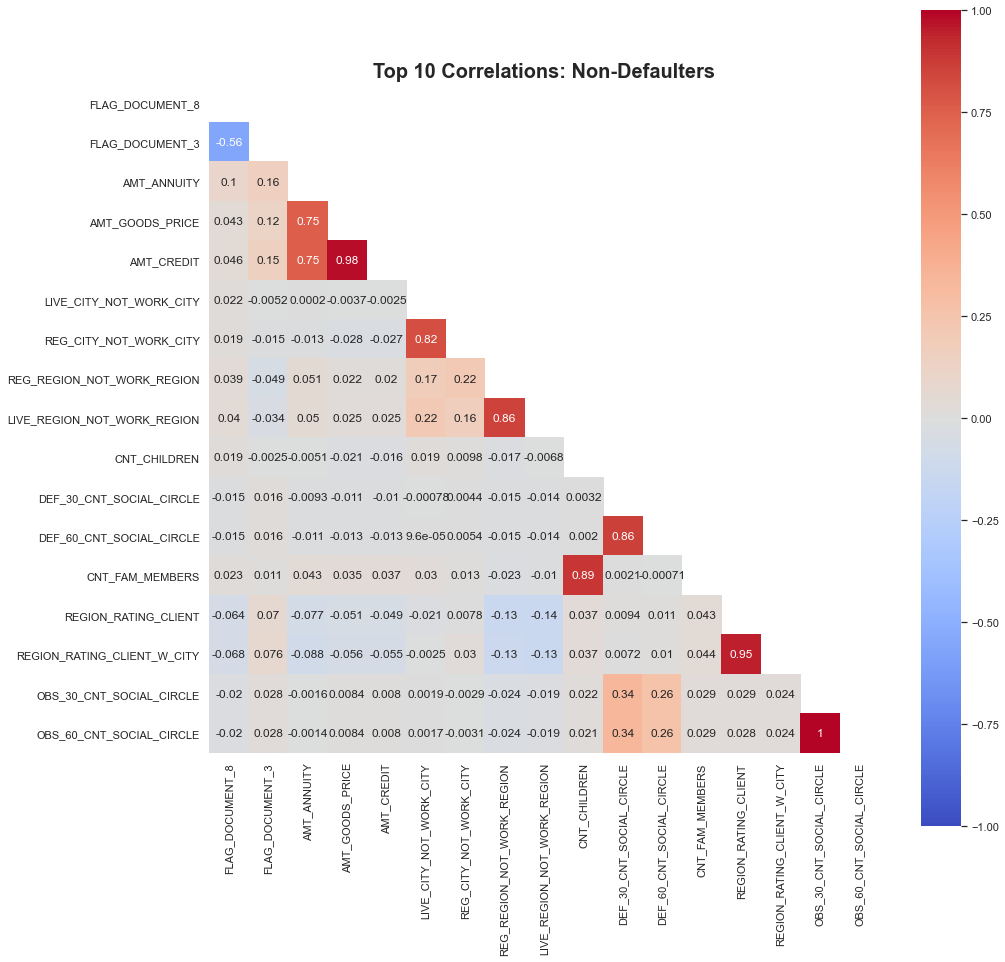

In [91]:
# Correlation Table.

corr= top10_df.corr()

# Masking repeated values.

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

# Plotting.

f, ax= plt.subplots(figsize=(15,15))
plt.title('Top 10 Correlations: Non-Defaulters', fontsize= 20, fontweight= 'bold')
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, cmap='coolwarm',annot=True)

#### Finding Correlation: Defaulters

#### Heatmap

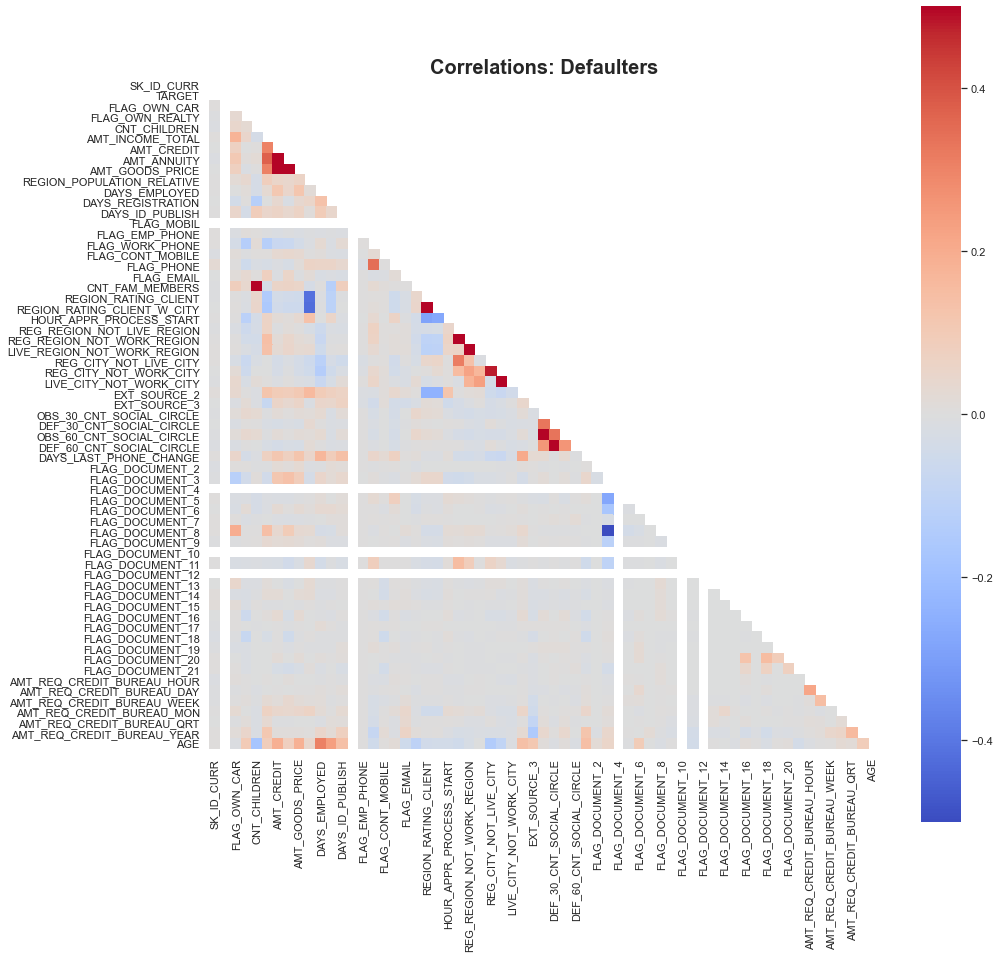

In [92]:
# Orrelation Table.

corr= T1.corr()

# Masking repeated values.

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

# Plotting.

f, ax= plt.subplots(figsize=(15,15))
plt.title('Correlations: Defaulters', fontsize= 20, fontweight= 'bold')
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-0.5, vmax=0.5, square=True, cmap='coolwarm')
    

From above heatmap we can see that there isn't a very strong correlation between most of the drivers. However, some drivers do share strong correlations. We find top 10 such drivers.

Note: the blank columns and rows in heatmap implies that the data in that particular column didn't vary.

#### Finding top 10 correlation for Defaulters

In [93]:
# Finding absolute highest correlation coefficients after removing duplicates, self correlation and no variation columns.


corr1= T1.corr().abs().unstack().sort_values(kind='quicksort')
corr1= corr1.dropna()
corr1= corr1[corr1 != 1.0]
corr1= corr1.drop_duplicates()
corr1

FLAG_DOCUMENT_9              CNT_FAM_MEMBERS             0.000011
DAYS_REGISTRATION            SK_ID_CURR                  0.000018
AMT_GOODS_PRICE              CNT_CHILDREN                0.000029
AMT_REQ_CREDIT_BUREAU_DAY    REGION_RATING_CLIENT        0.000033
DAYS_EMPLOYED                FLAG_OWN_CAR                0.000033
                                                           ...   
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.867311
CNT_CHILDREN                 CNT_FAM_MEMBERS             0.893504
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.960275
AMT_GOODS_PRICE              AMT_CREDIT                  0.977865
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE    0.998250
Length: 1653, dtype: float64

In [94]:
top10_T1= corr1.tail(10)
top10_T1

FLAG_DOCUMENT_8              FLAG_DOCUMENT_3                0.629956
AMT_ANNUITY                  AMT_GOODS_PRICE                0.738416
AMT_CREDIT                   AMT_ANNUITY                    0.740489
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.766074
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.849085
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867311
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893504
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.960275
AMT_GOODS_PRICE              AMT_CREDIT                     0.977865
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998250
dtype: float64

We can clearly see that the top 10 correlated driver pairs for defaulters and non-defaulters are the same.

In [95]:
top10_df = T1[["FLAG_DOCUMENT_8",
             "FLAG_DOCUMENT_3",
             "AMT_ANNUITY",
             "AMT_GOODS_PRICE",
             "AMT_CREDIT",
             "LIVE_CITY_NOT_WORK_CITY",
             "REG_CITY_NOT_WORK_CITY",
             "REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION",
             "CNT_CHILDREN",
             "DEF_30_CNT_SOCIAL_CIRCLE",
             "DEF_60_CNT_SOCIAL_CIRCLE",
             "CNT_FAM_MEMBERS",
             "REGION_RATING_CLIENT",
             "REGION_RATING_CLIENT_W_CITY",
             "OBS_30_CNT_SOCIAL_CIRCLE",
             "OBS_60_CNT_SOCIAL_CIRCLE"]]

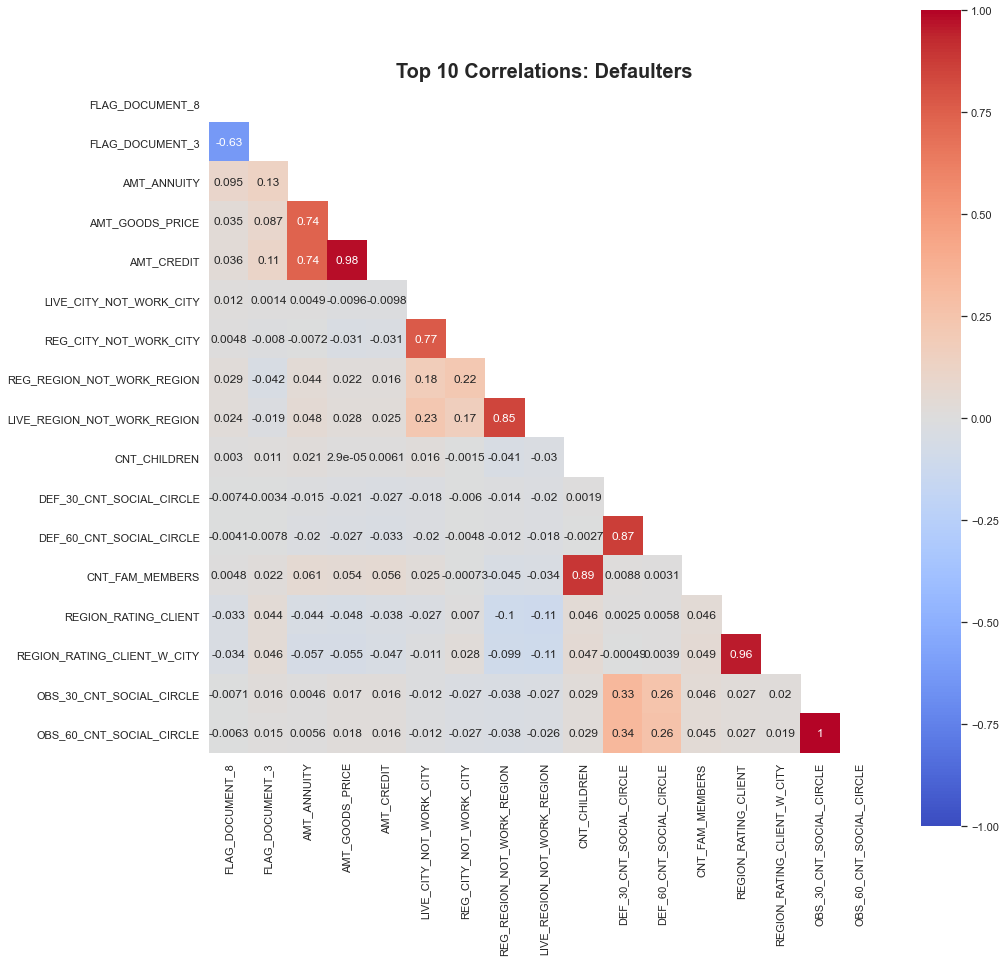

In [96]:
# Correlation Table.

corr= top10_df.corr()

# Masking repeated values.

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

# Plotting.

f, ax= plt.subplots(figsize=(15,15))
plt.title('Top 10 Correlations: Defaulters', fontsize= 20, fontweight= 'bold')
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, cmap='coolwarm',annot=True)

Correlation analysis done!

#### Plots for univariate analysis of numeric columns.

In [97]:
#numerical cols

col_num= list(set(application_data.describe().columns))
col_num

['EXT_SOURCE_2',
 'REG_REGION_NOT_WORK_REGION',
 'AMT_CREDIT',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_20',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_14',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_OWN_REALTY',
 'DAYS_EMPLOYED',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_15',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'TARGET',
 'FLAG_DOCUMENT_12',
 'DAYS_REGISTRATION',
 'FLAG_CONT_MOBILE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'REGION_POPULATION_RELATIVE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_DOCUMENT_6',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'SK_ID_CURR',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_19',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_5',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_10',
 'AGE',
 'FLAG_DOCUMENT_16',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'REGIO

Defining a function to plot distplot and histogram (for better readability) for the numeric columns.

In [98]:
def plotcont(var):
    
    print('\n')
    sns.set_style('whitegrid')
    f,axes = plt.subplots(2,2, figsize= (15,7))
    
    plt.subplot(2, 2, 1)
    T0[var].plot.hist(color= 'green')
    plt.title('Distribution for Non-Defaulters', fontsize=14)

    
    plt.subplot(2, 2, 2)
    T1[var].plot.hist(color= 'brown')
    plt.title('Distribution for Defaulters', fontsize=14)
    
    plt.subplot(2, 2, 3)
    sns.distplot(T0[var], color= 'green')
    
    plt.subplot(2, 2, 4)
    sns.distplot(T1[var], color= 'brown')
    
    f.suptitle(var, fontsize=18, fontweight='bold')
    plt.show()

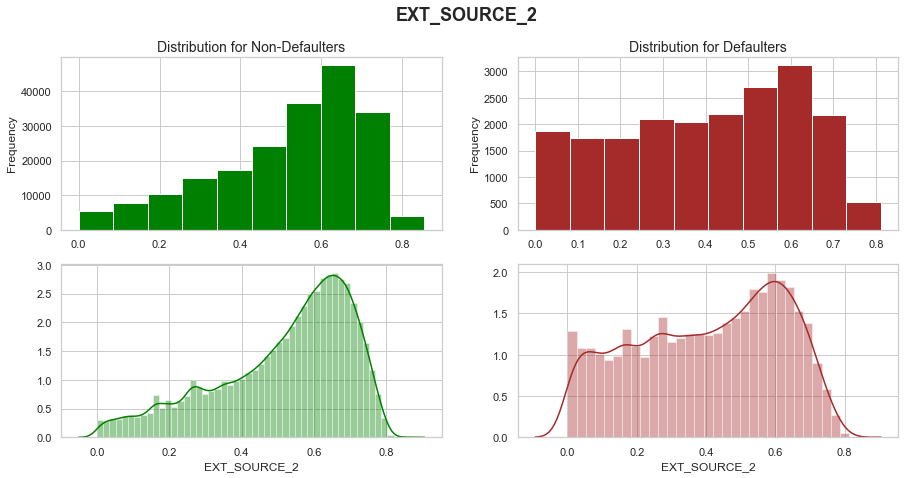

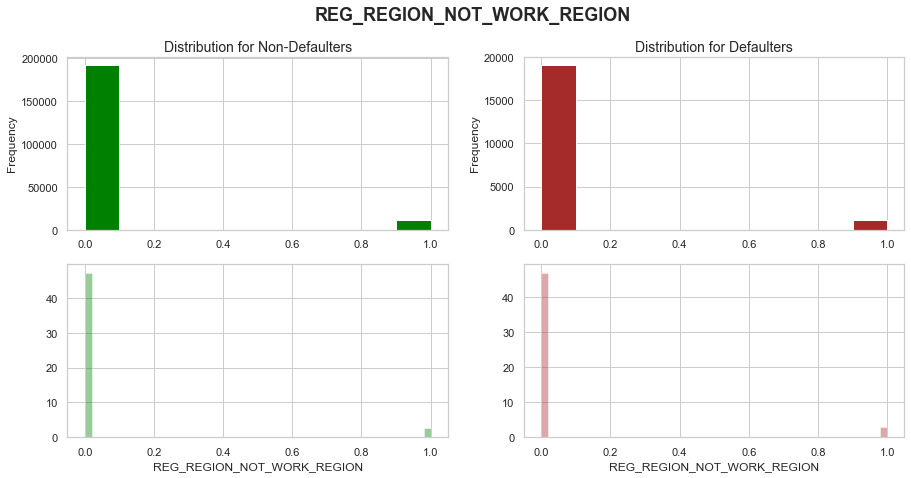

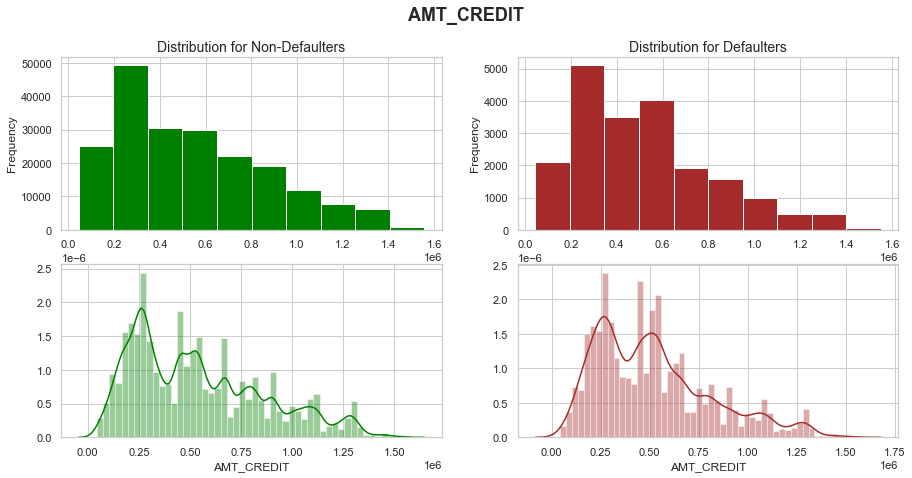

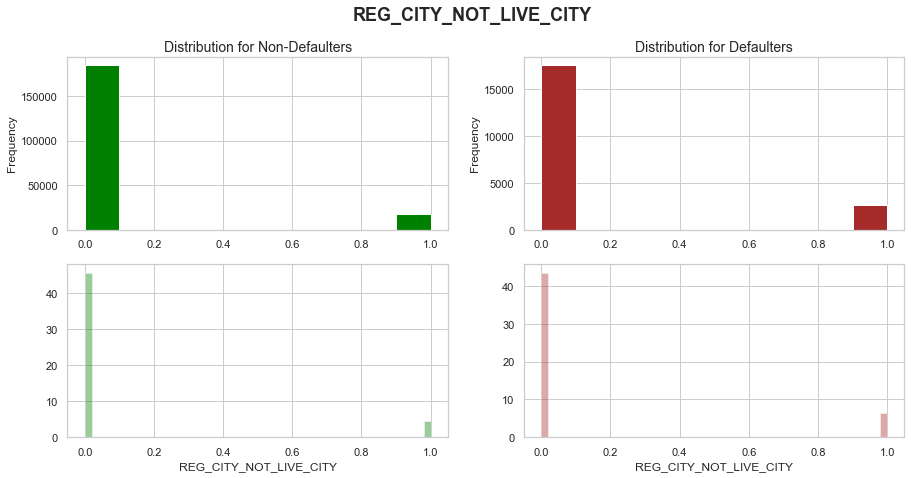

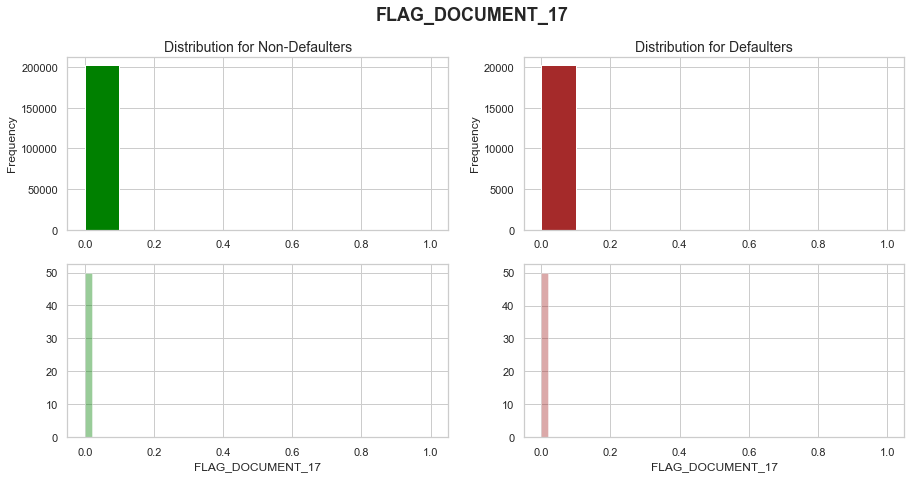

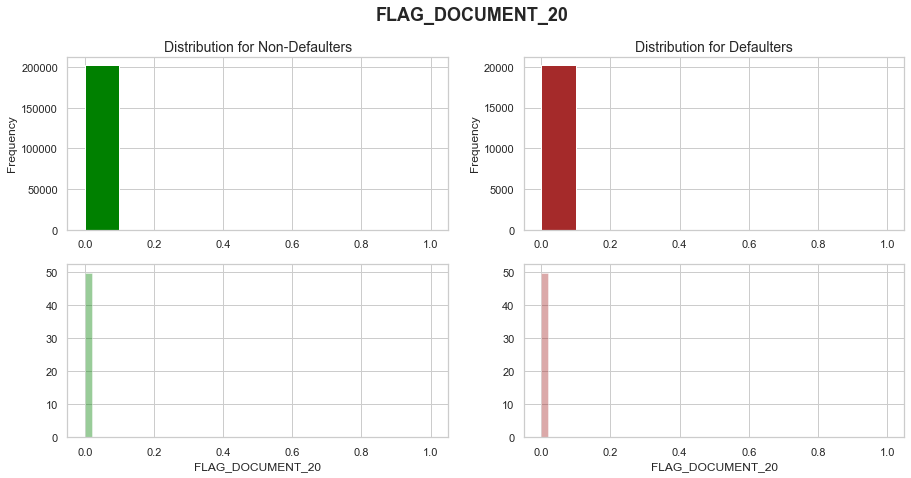

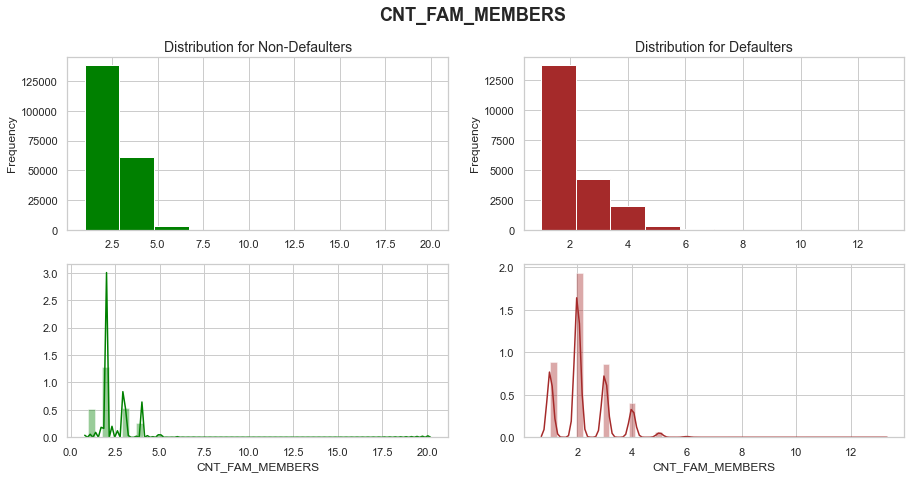

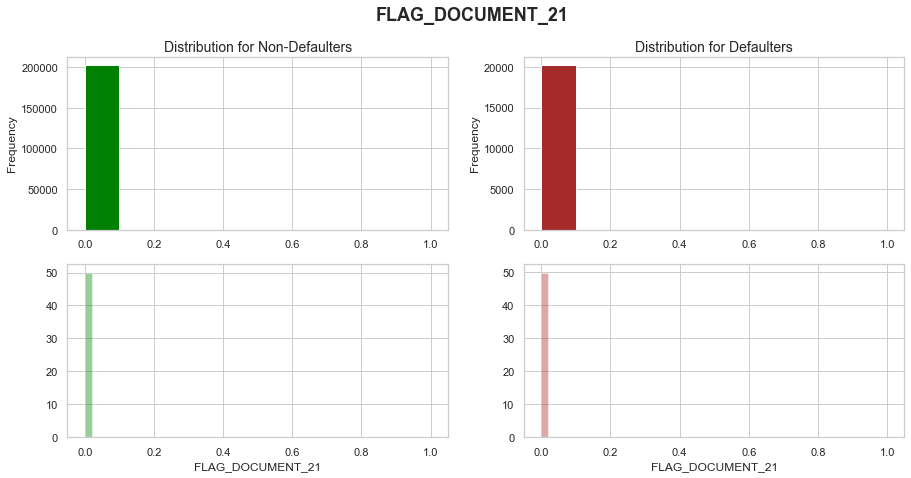

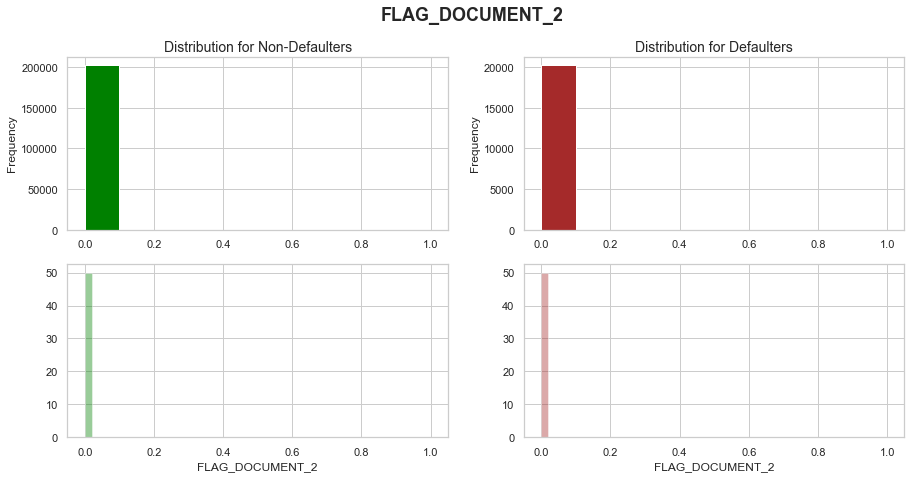

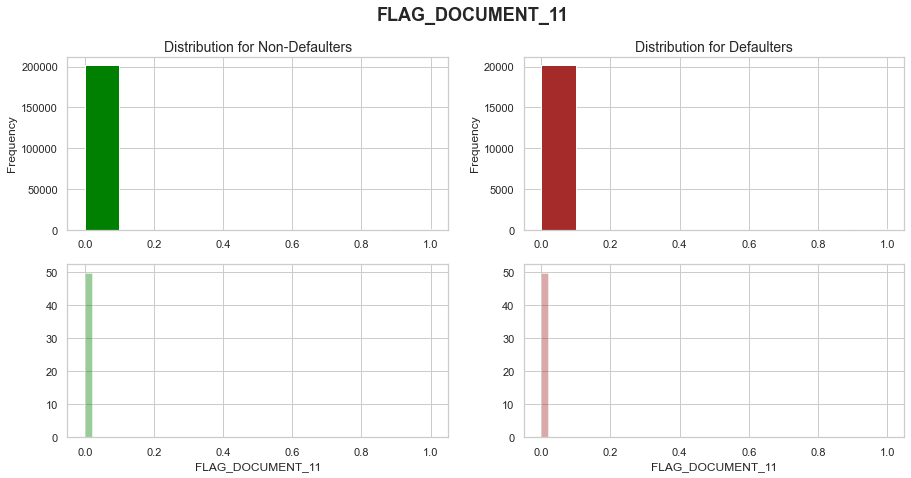

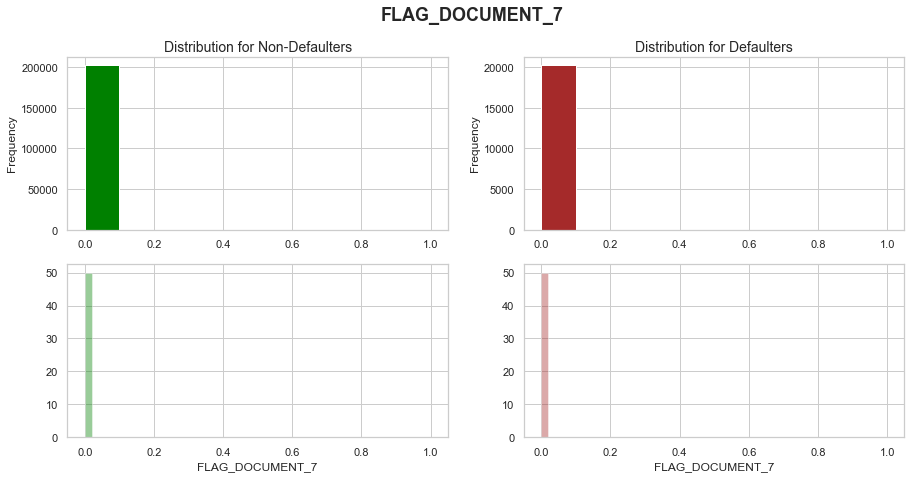

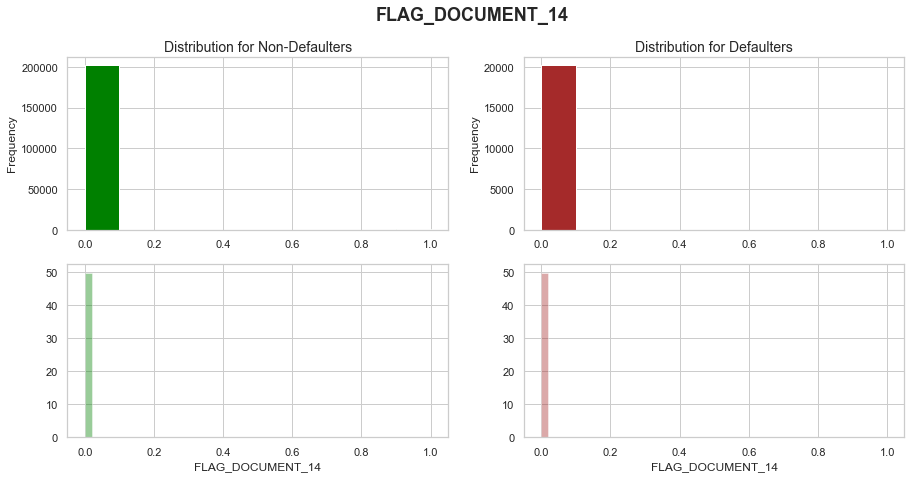

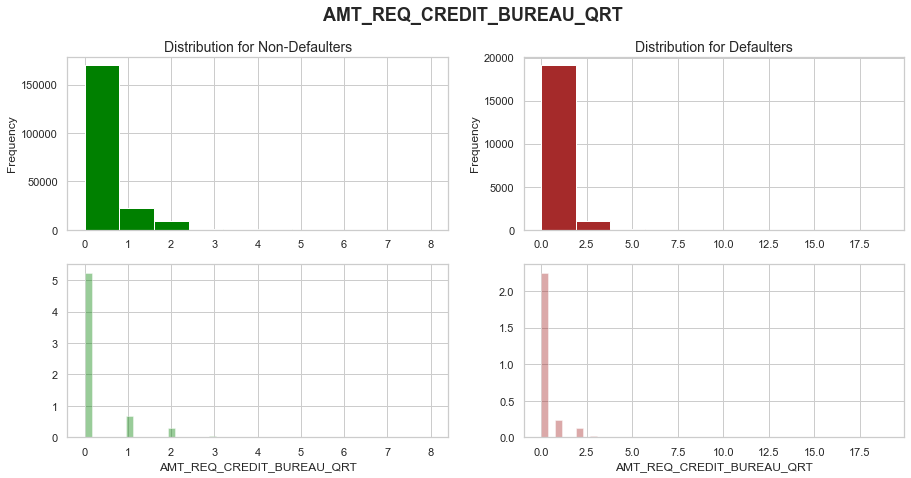

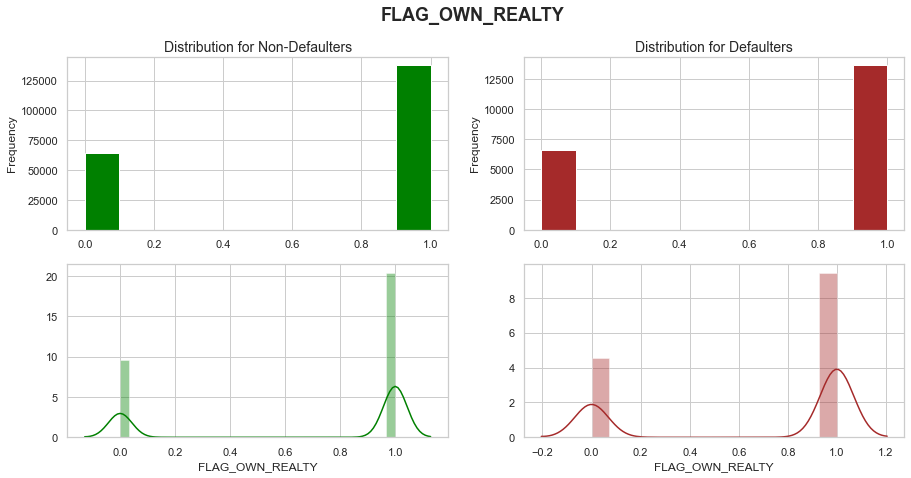

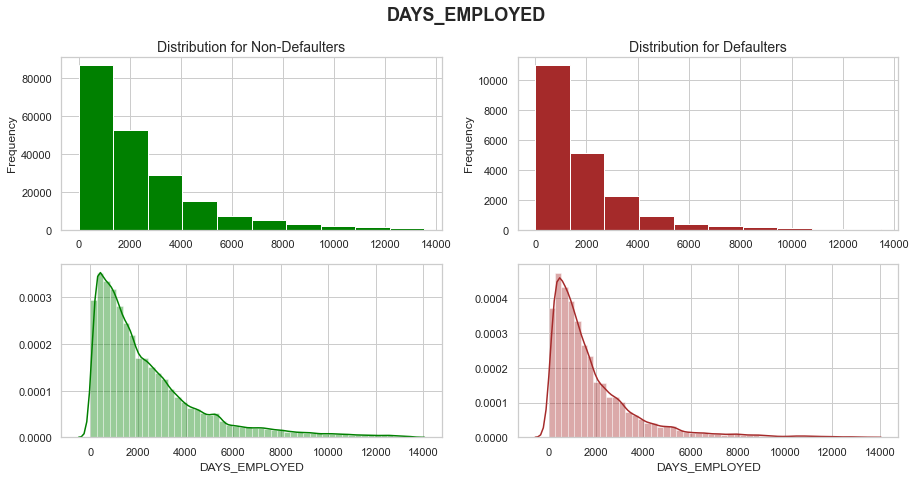

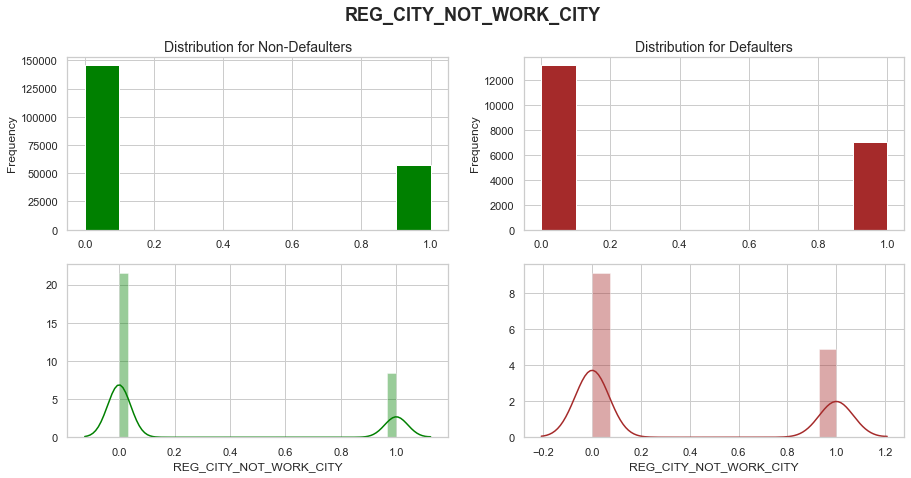

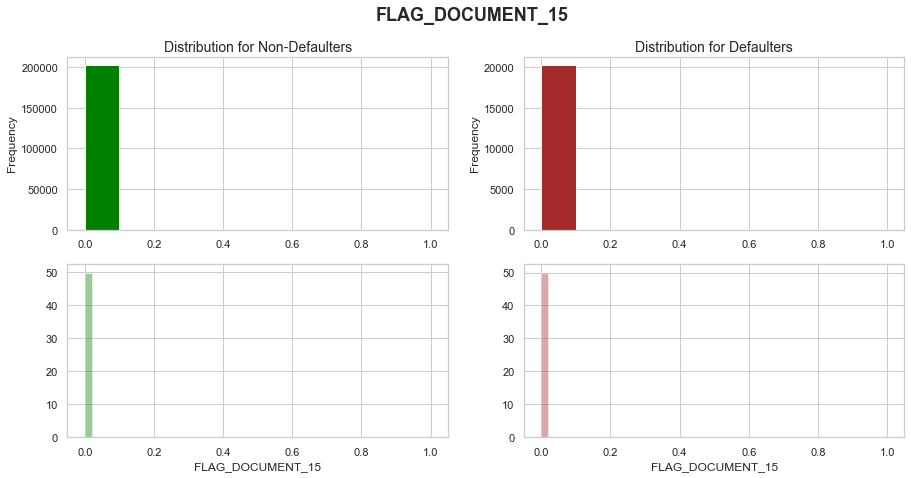

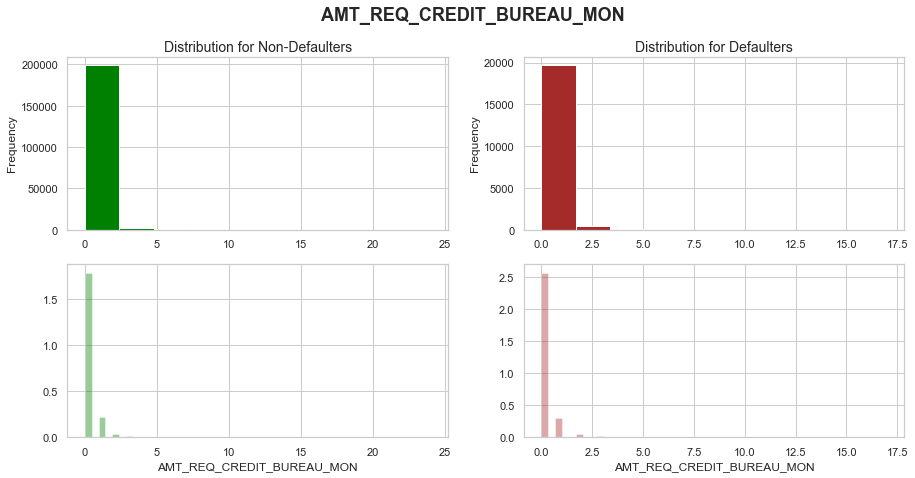

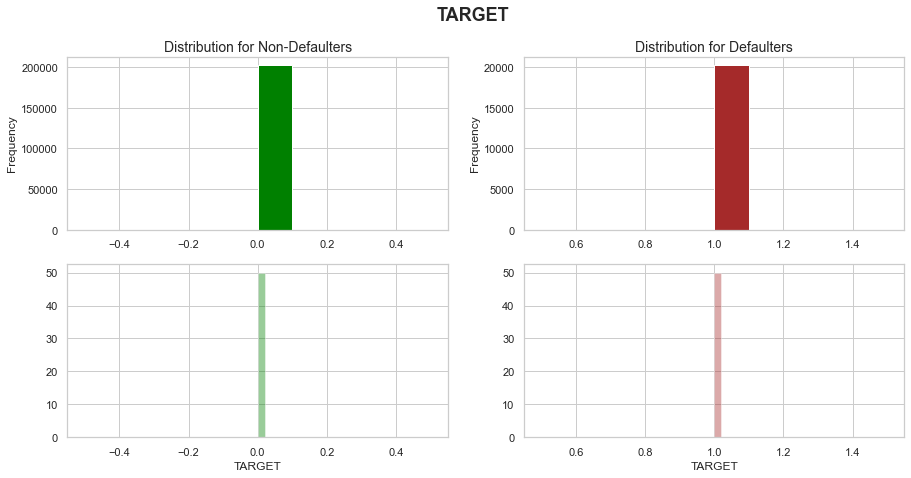

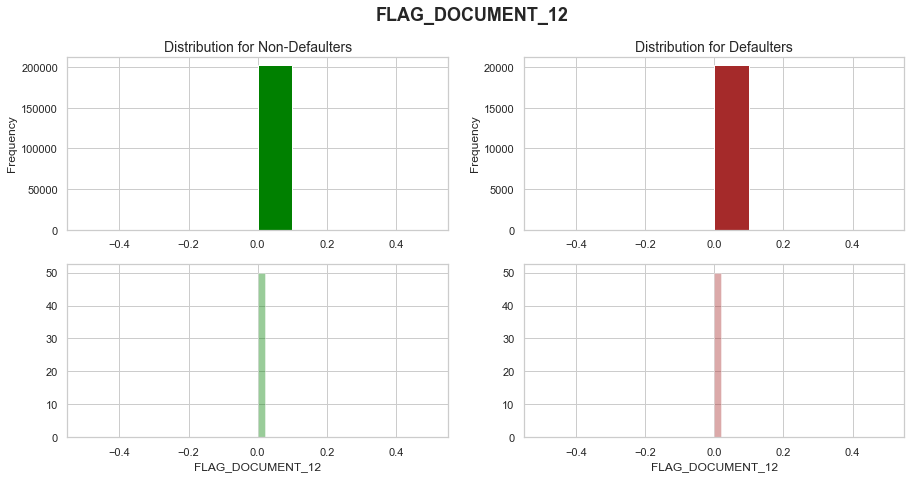

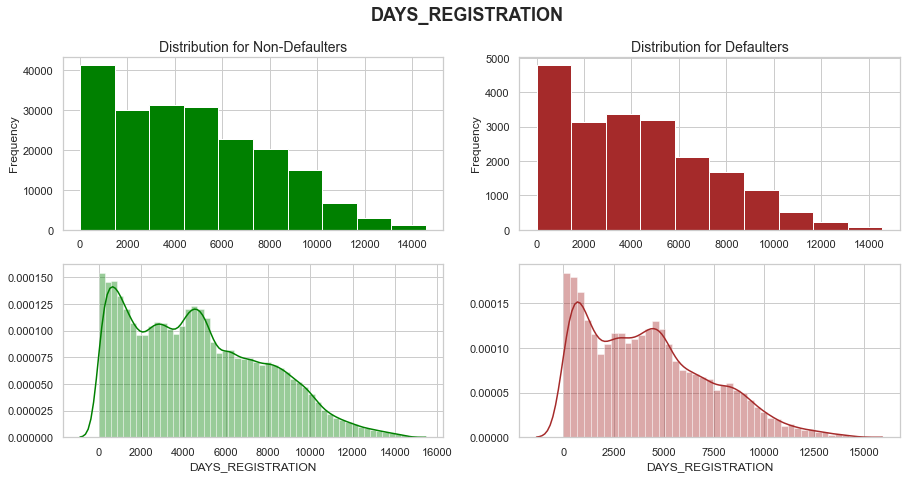

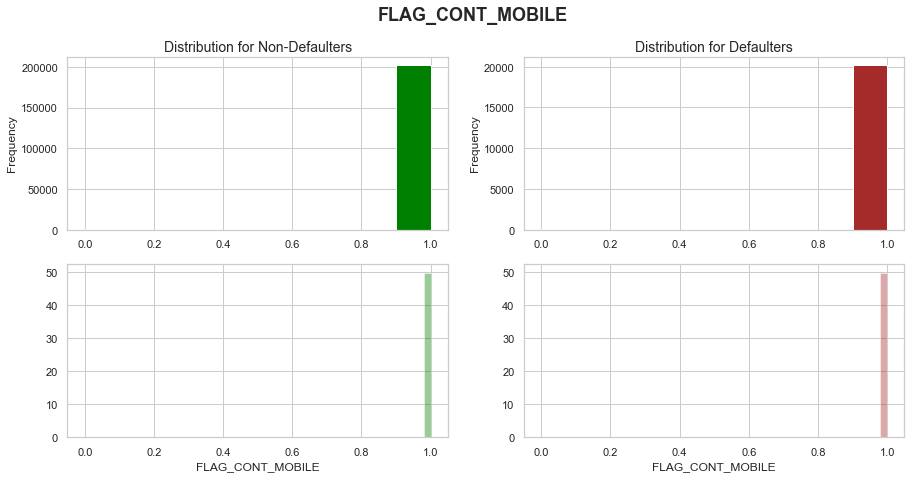

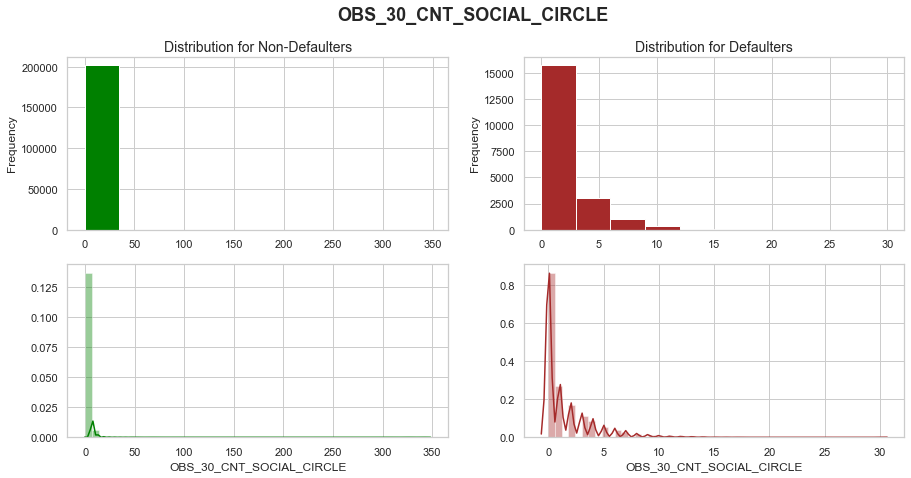

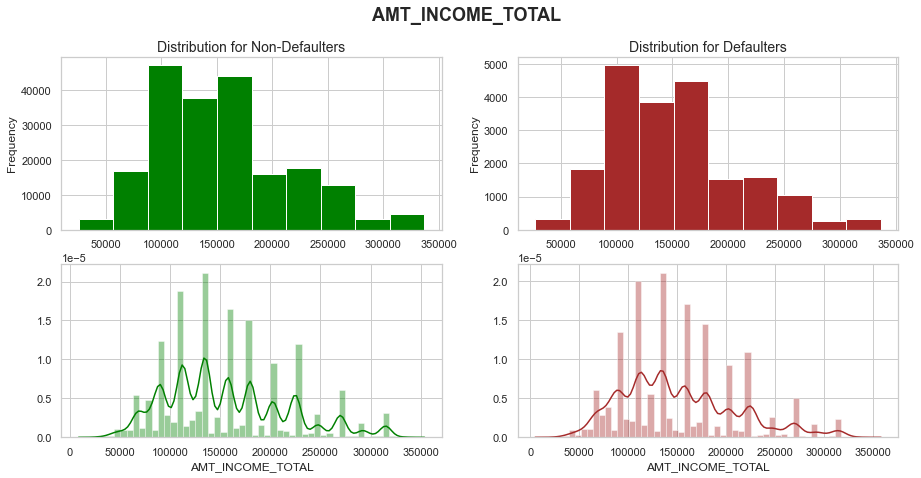

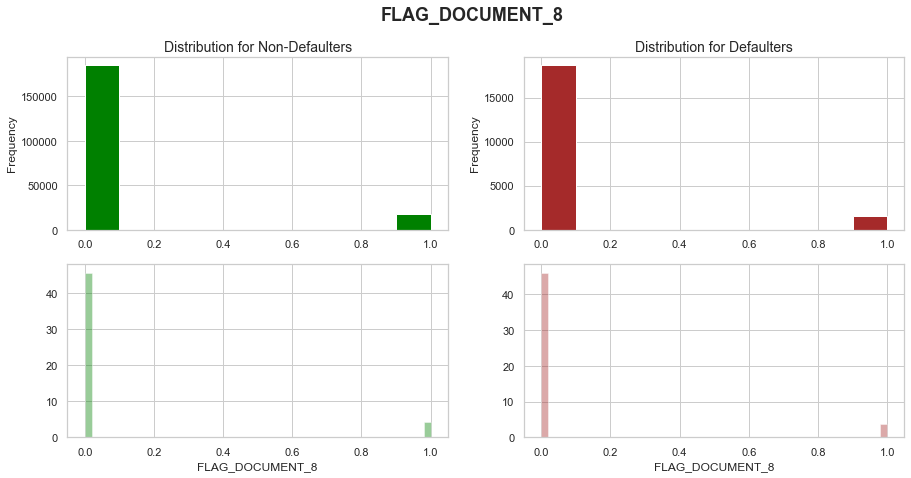

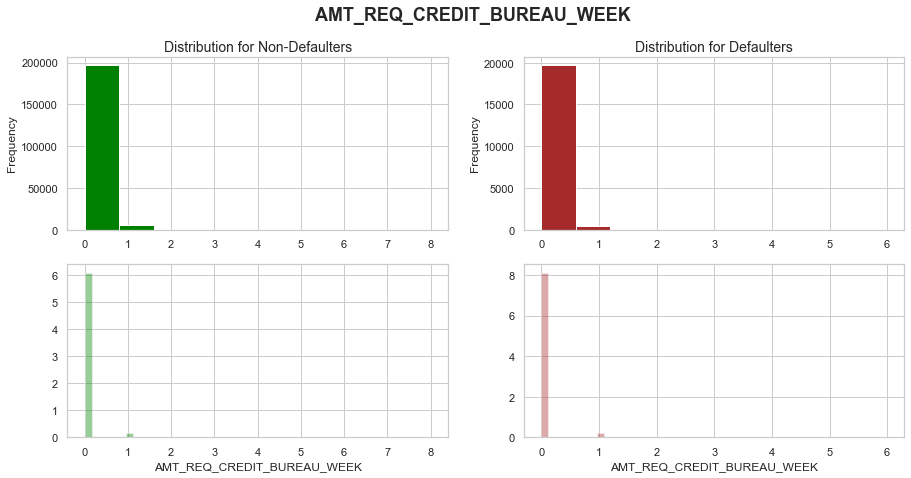

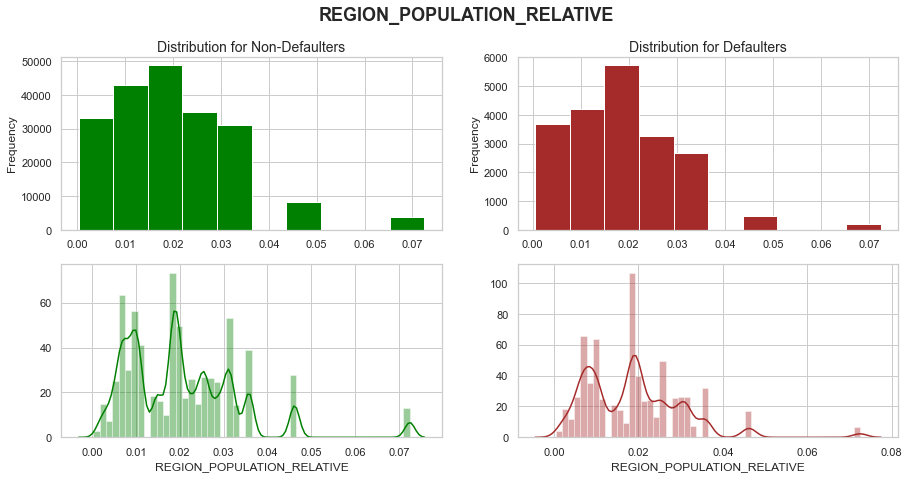

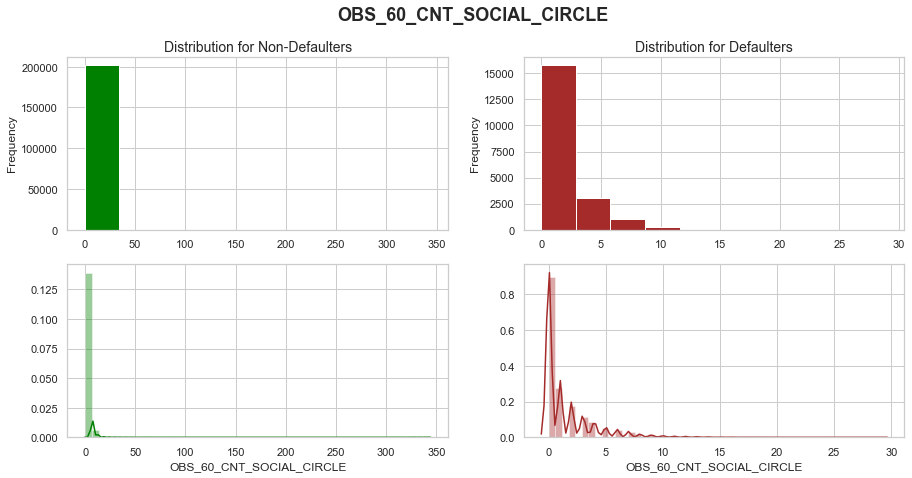

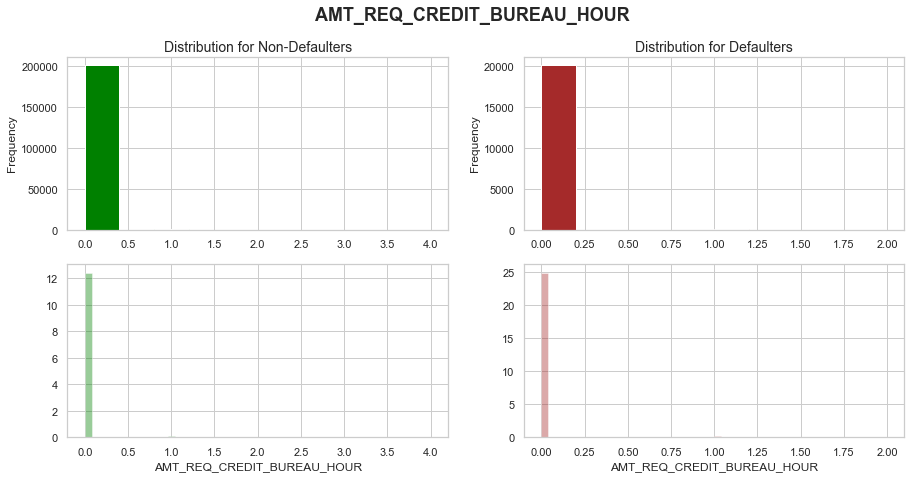

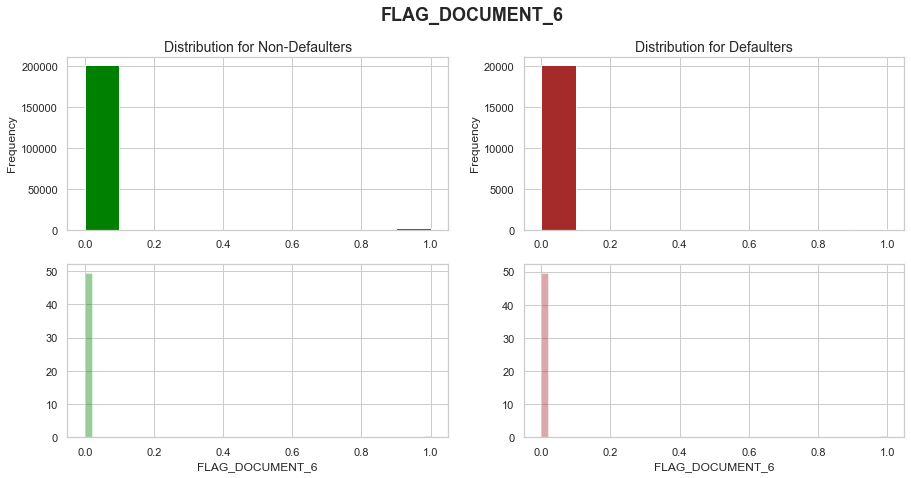

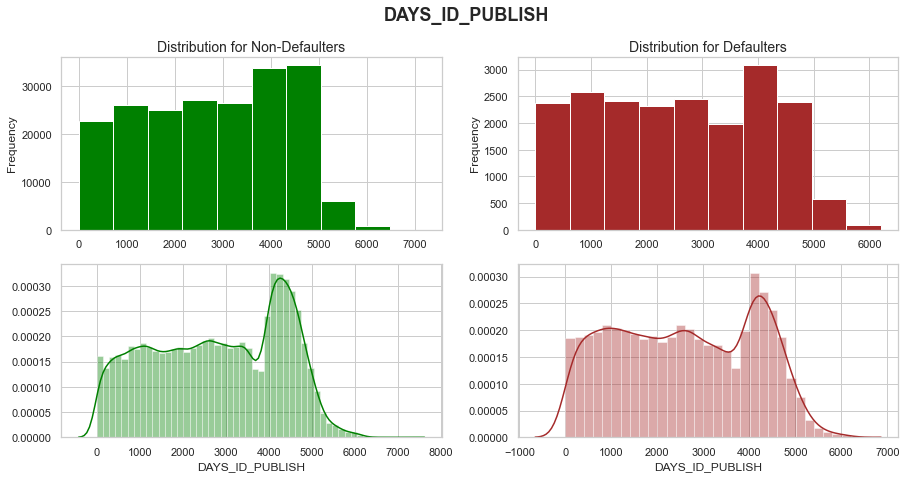

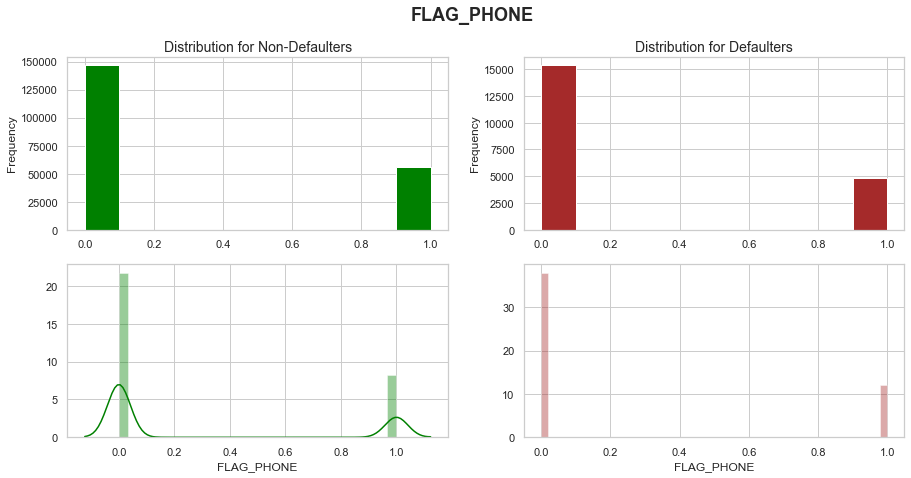

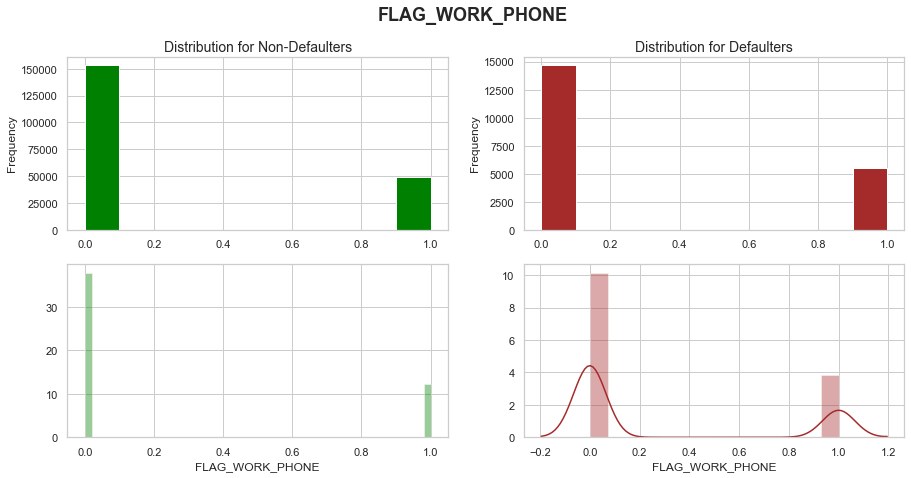

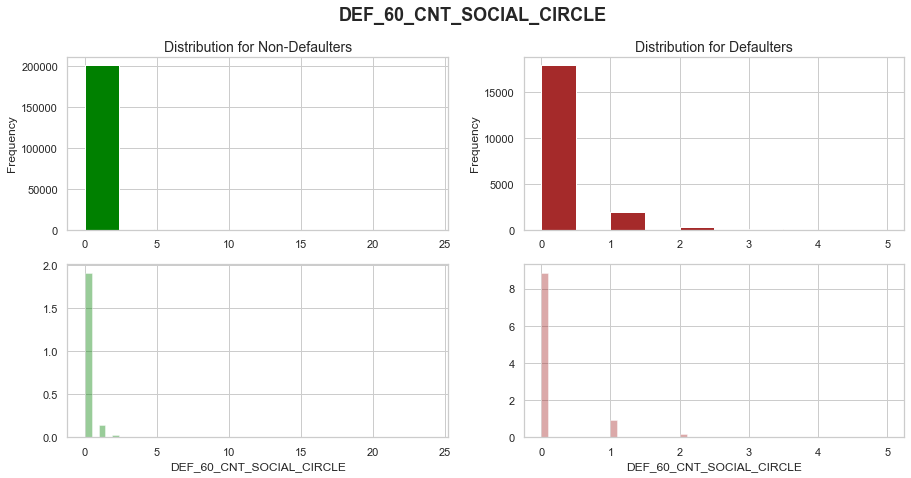

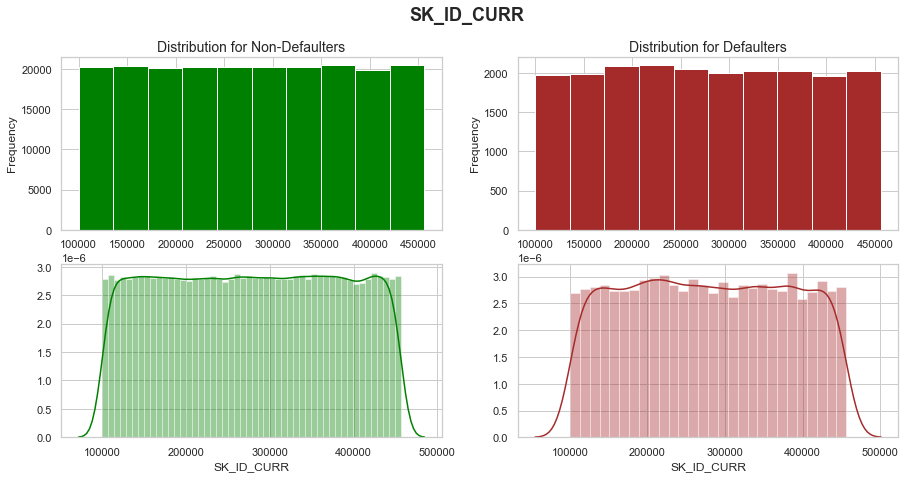

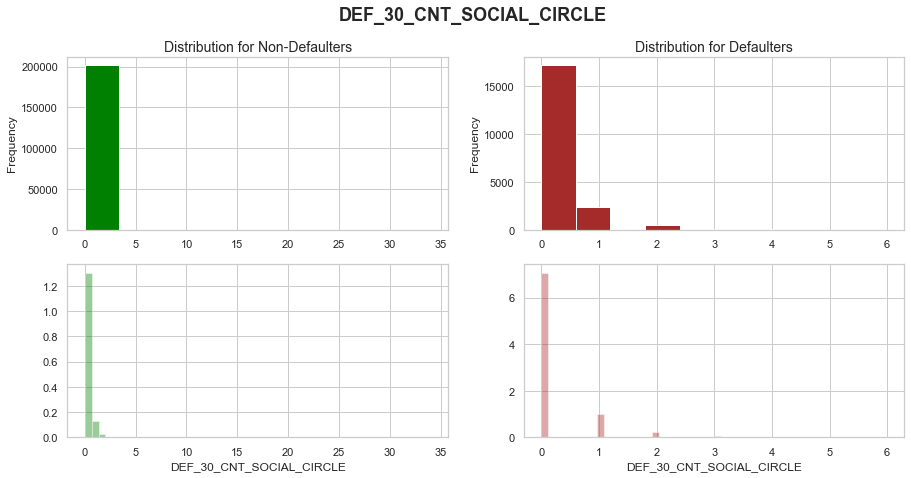

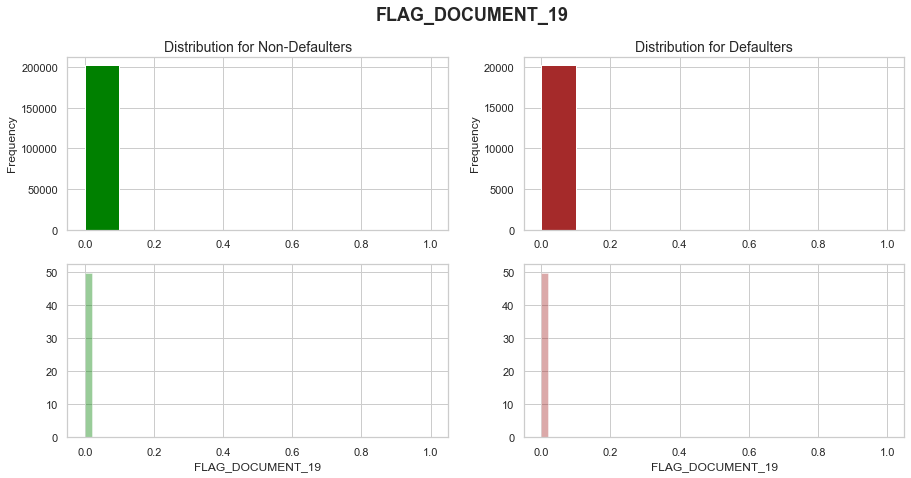

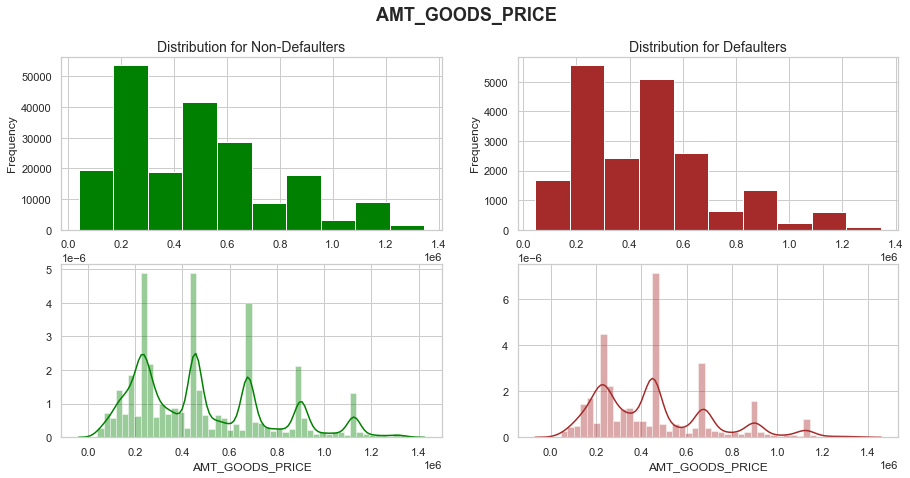

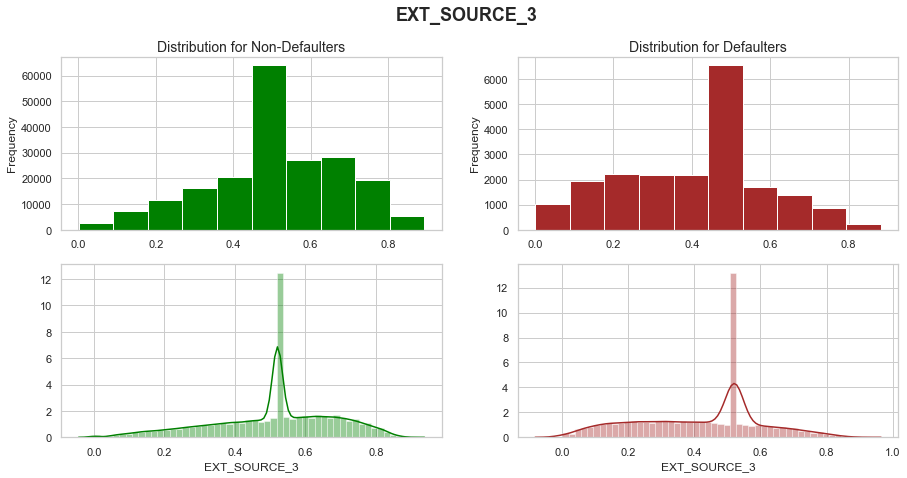

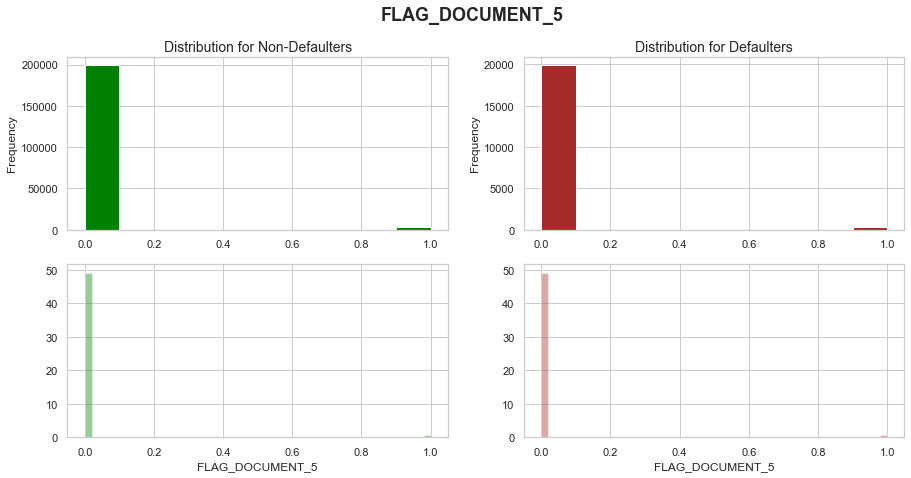

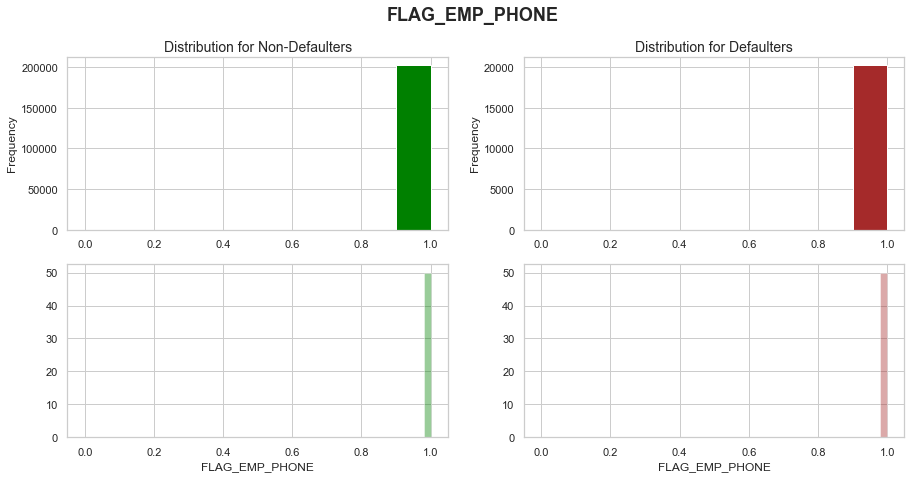

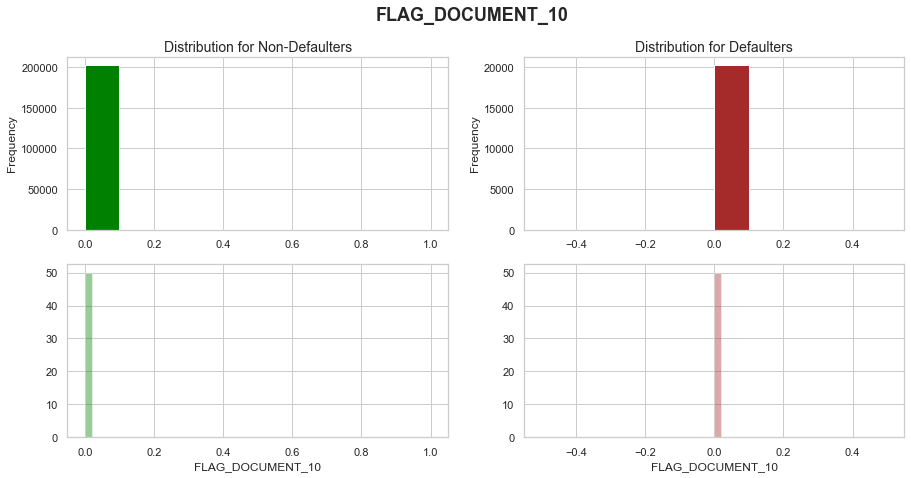

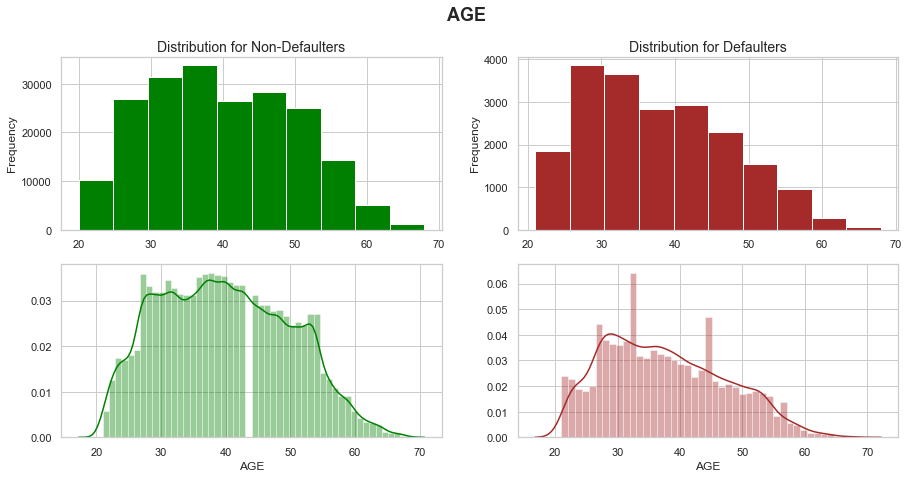

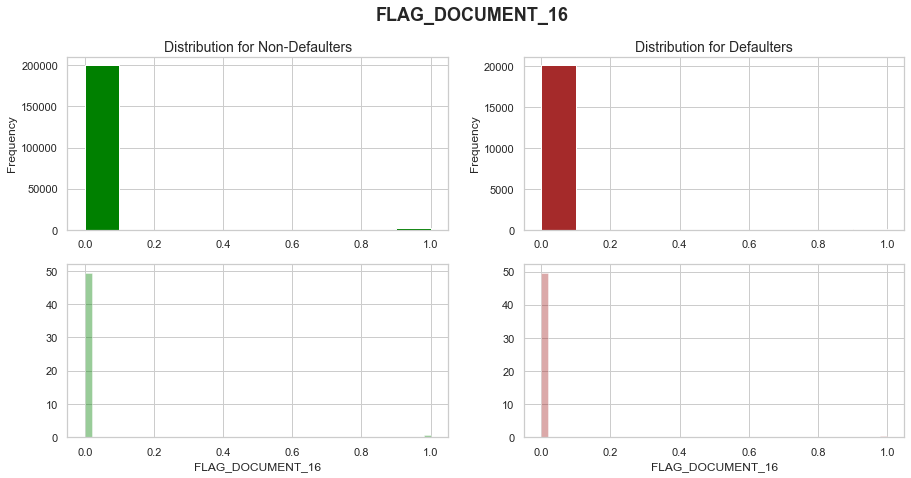

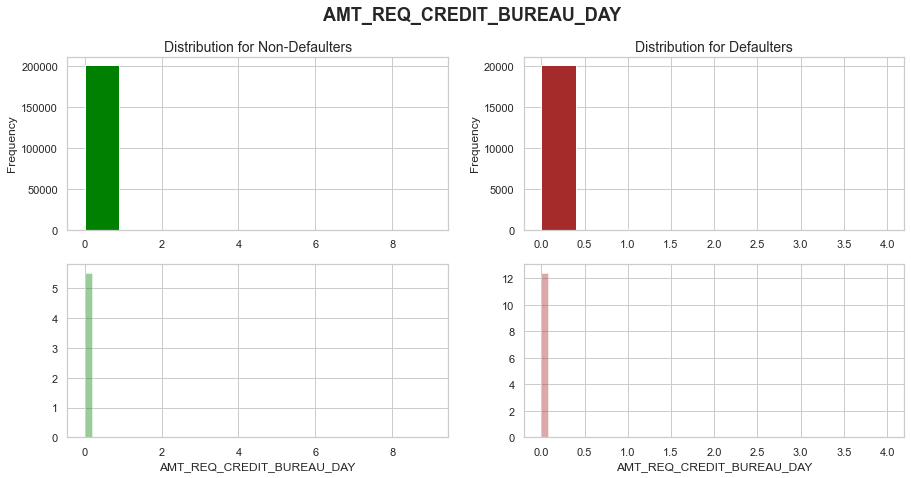

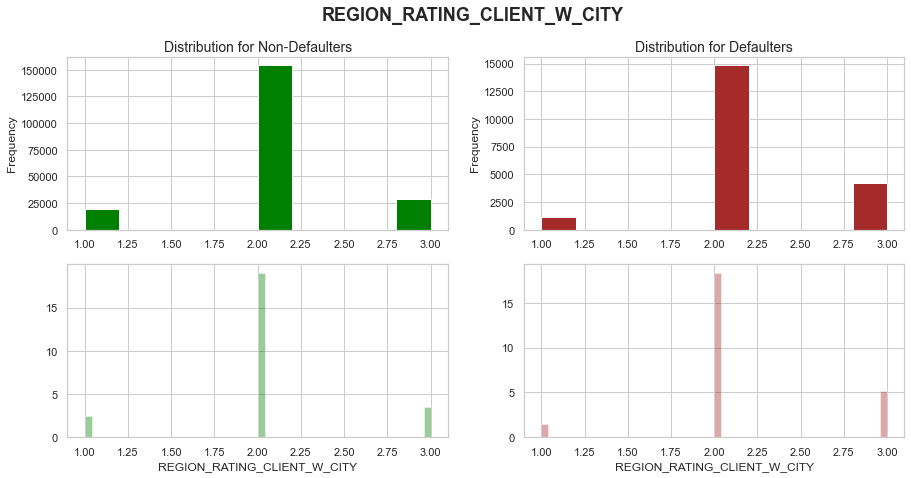

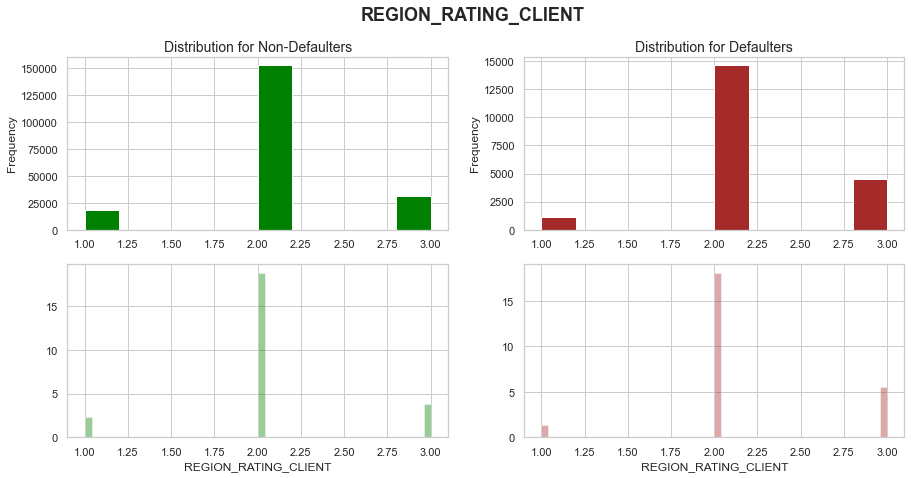

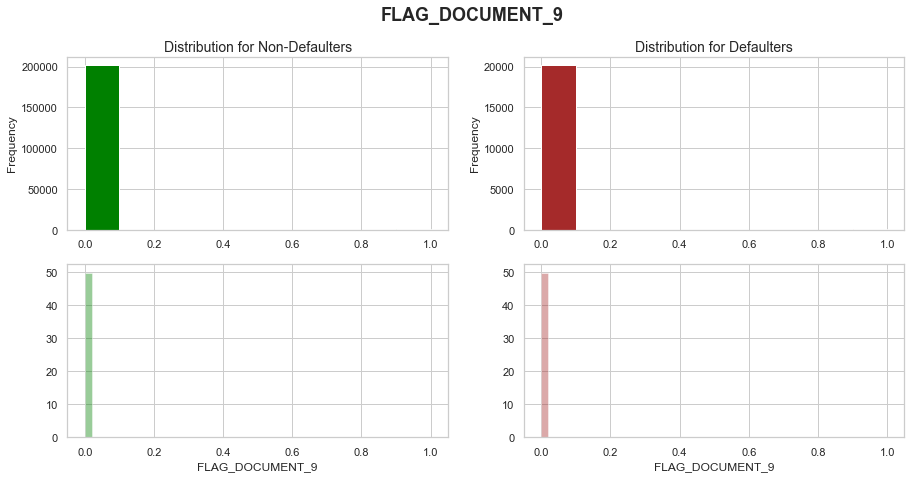

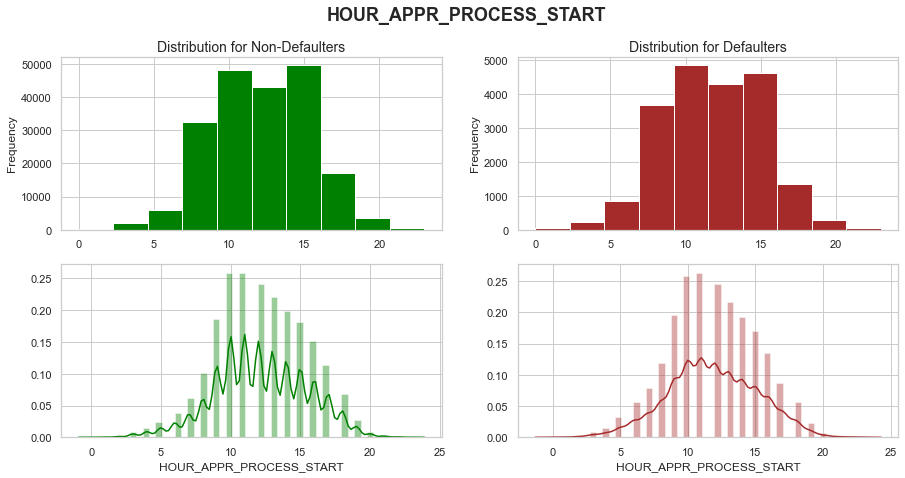

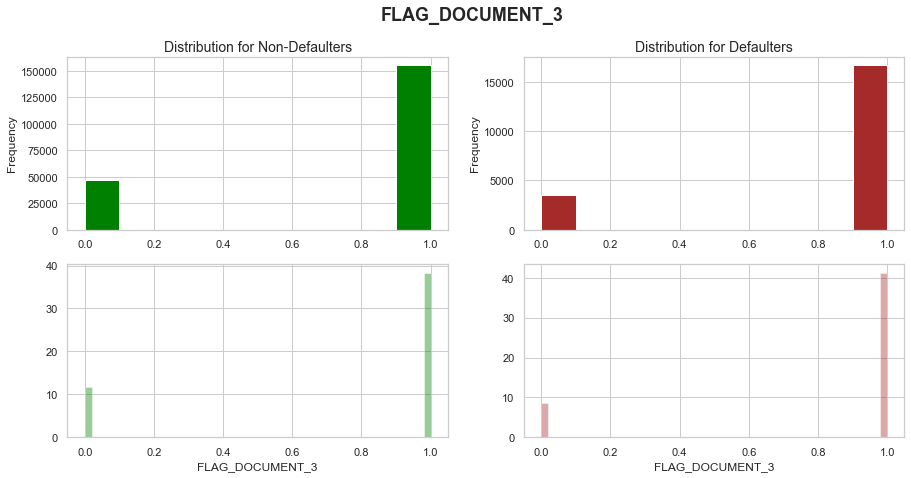

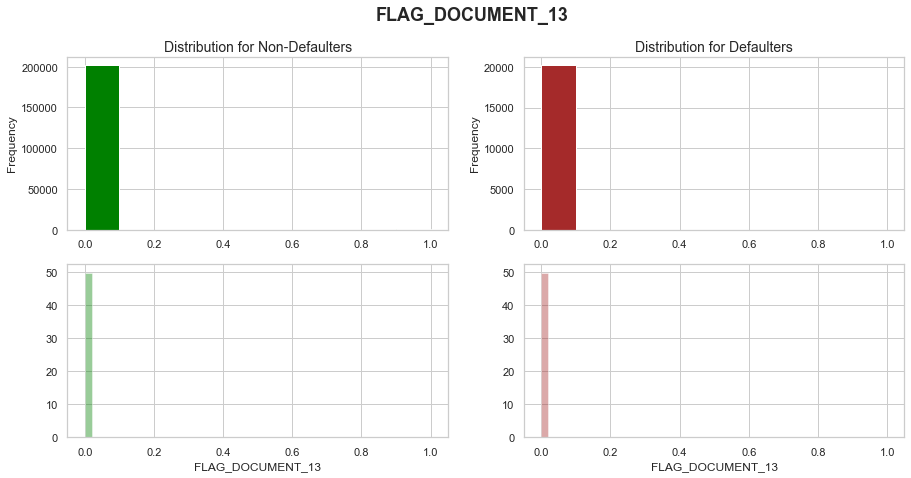

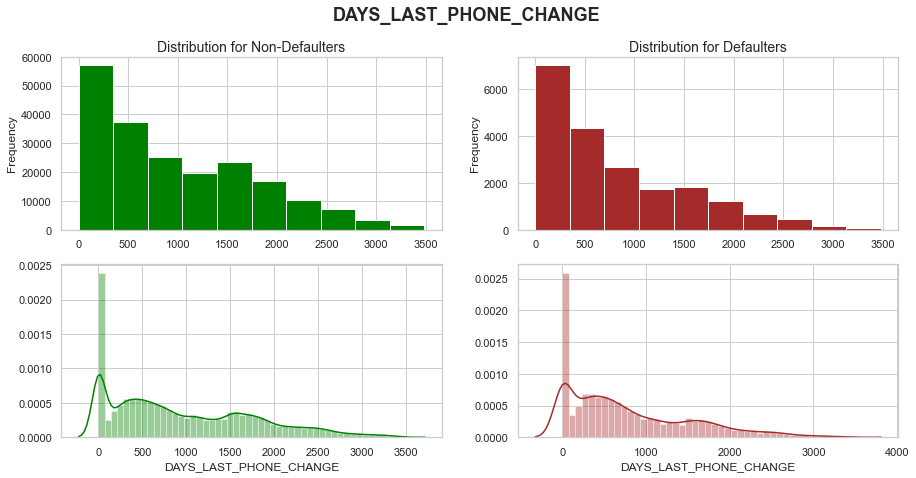

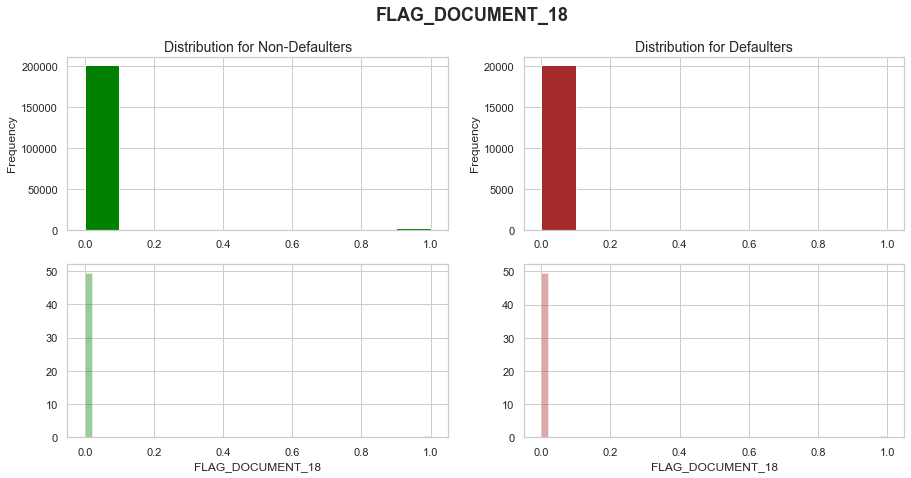

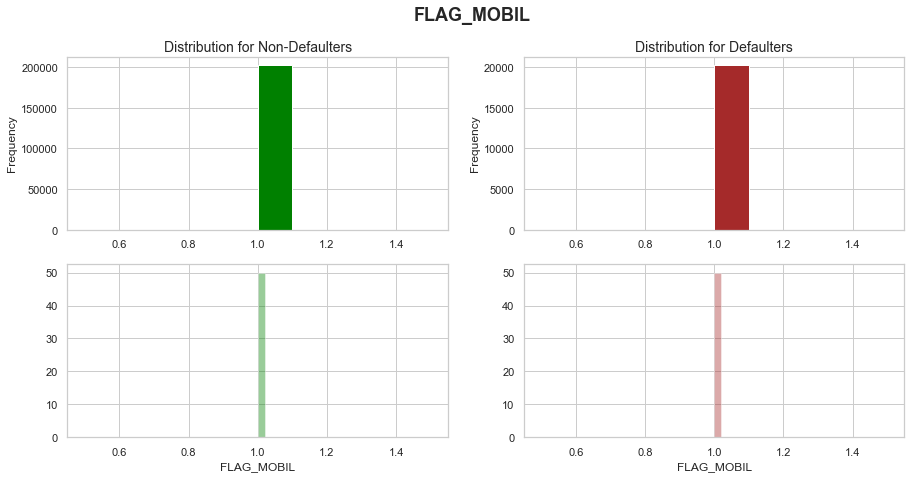

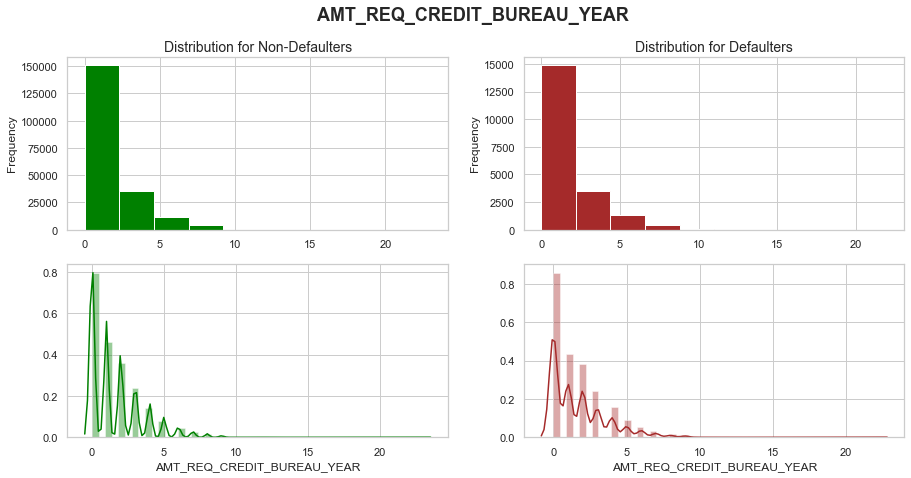

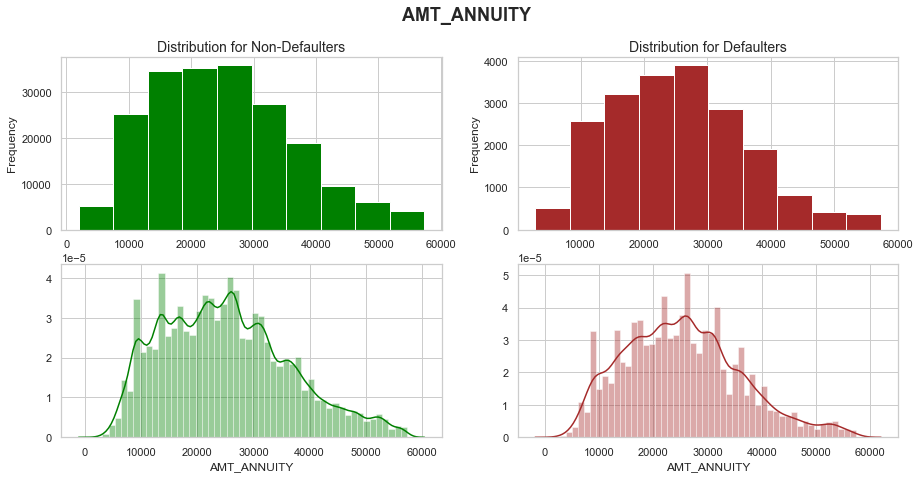

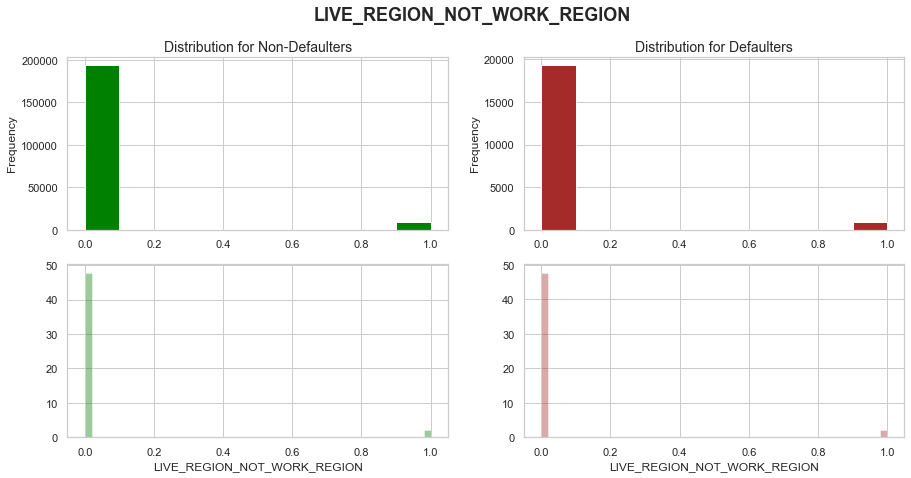

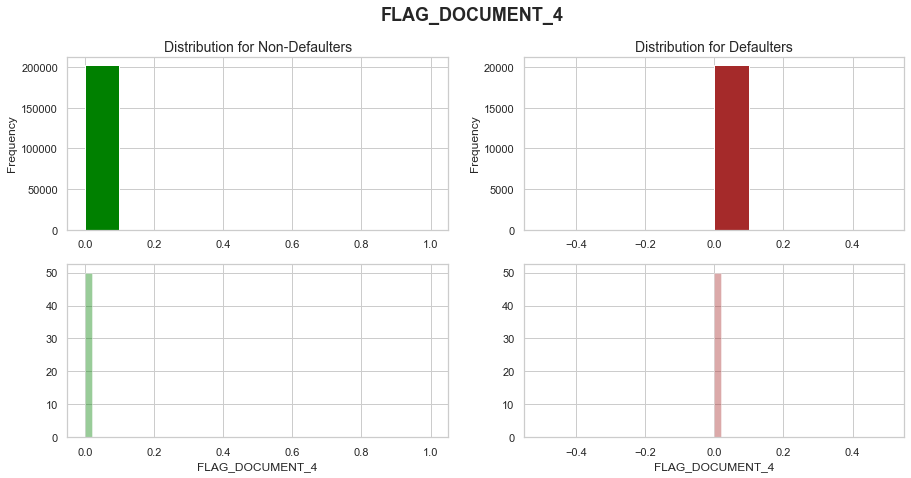

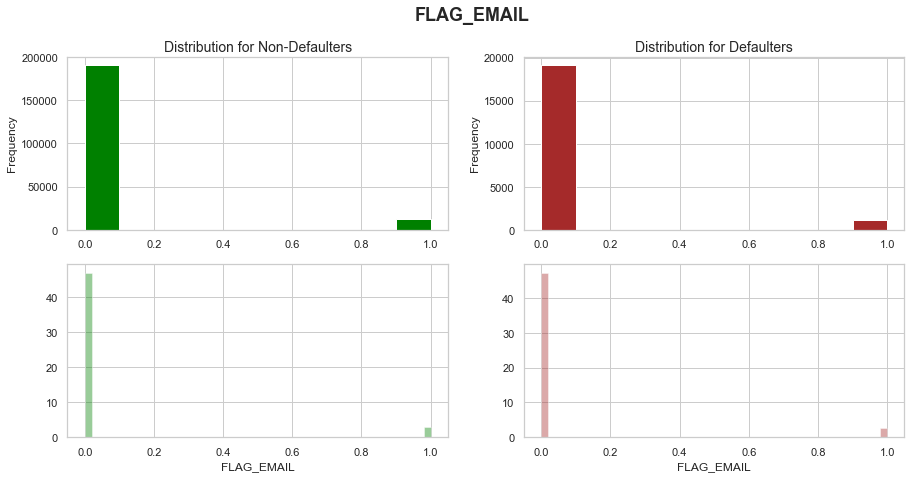

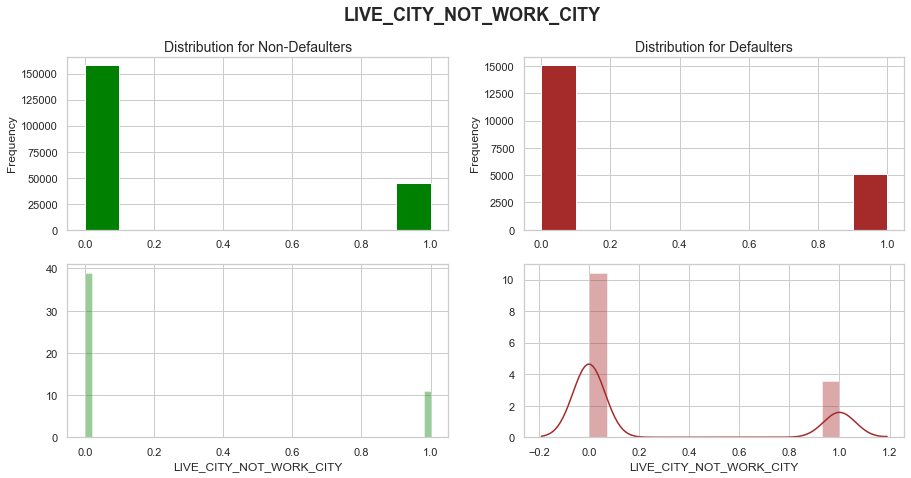

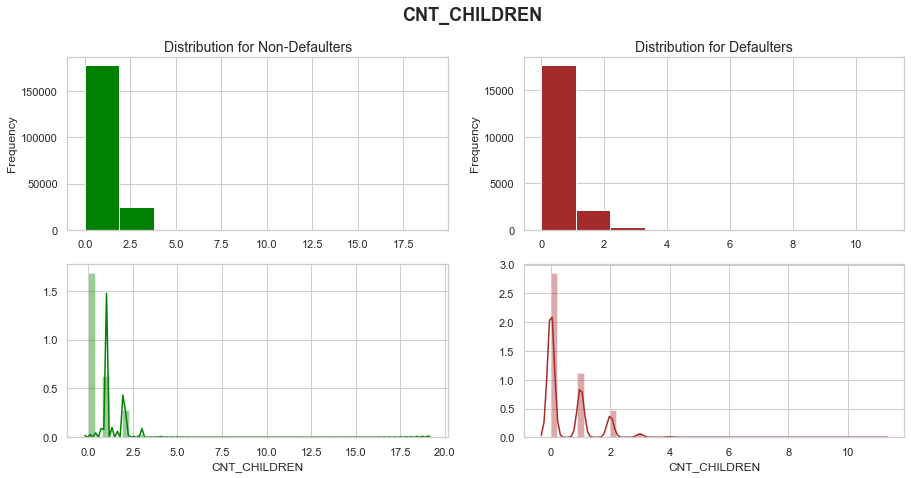

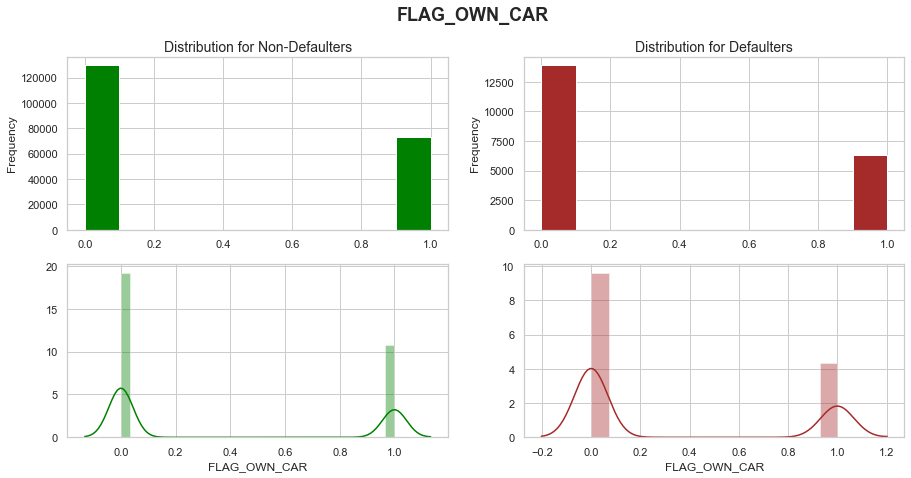

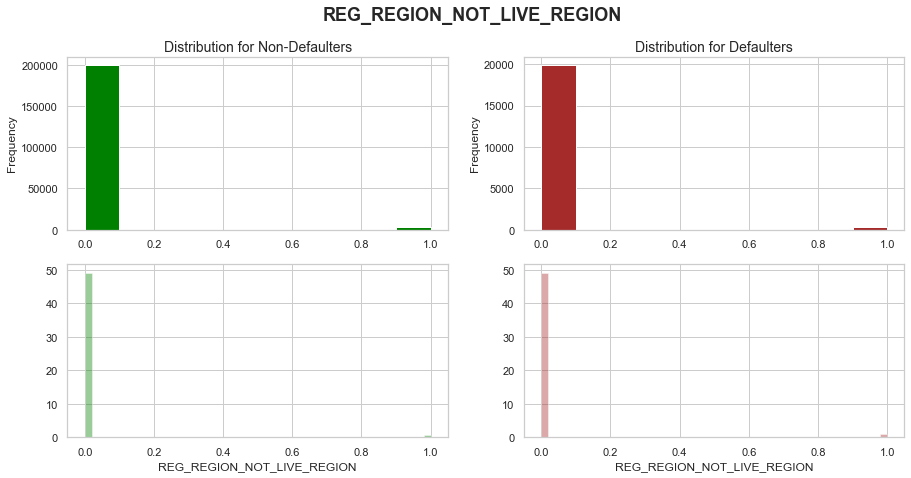

In [99]:
for var in col_num:
    plotcont(var)

Pulling out some important columns/ plots from above analysis for insights.

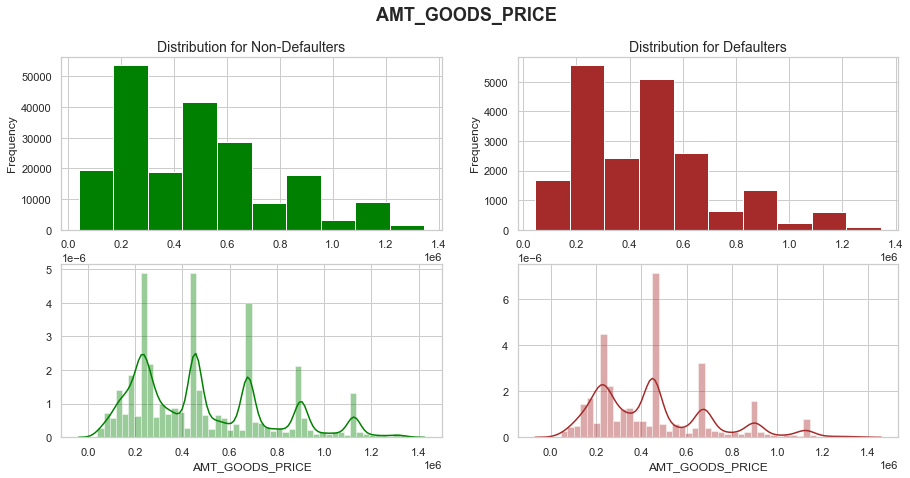

In [100]:
plotcont('AMT_GOODS_PRICE')

Defaults are higher for price of the goods for which the loan is given is lesser (between 0 to 500,000)

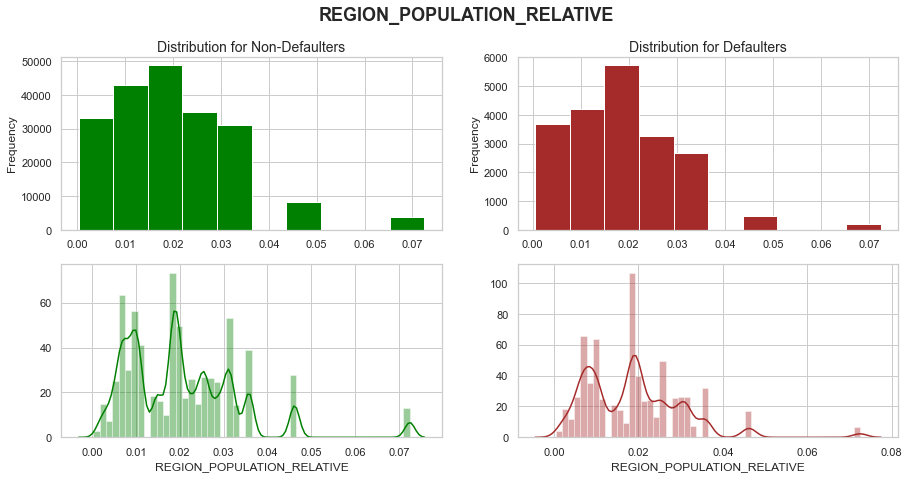

In [101]:
plotcont('REGION_POPULATION_RELATIVE')

People living in higher density areas having lesser defaults

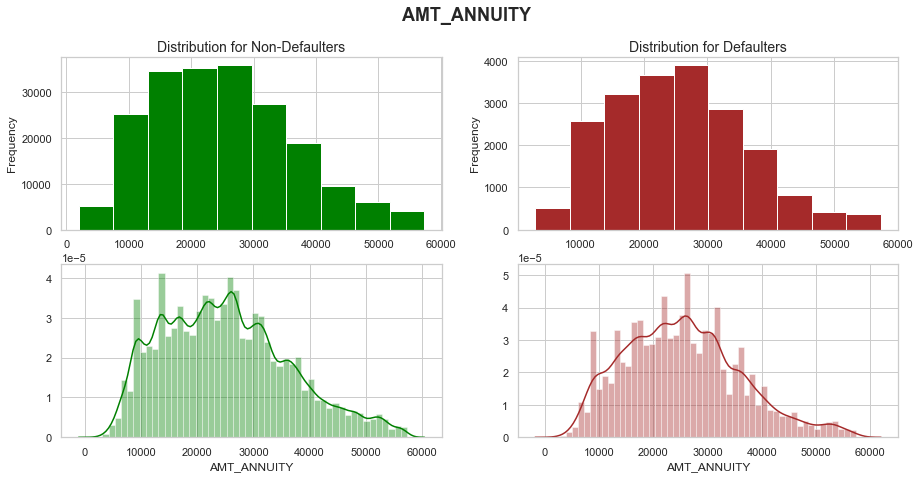

In [102]:
plotcont('AMT_ANNUITY')

For lower annuity amounts (10-20k) the amount of defaulters were low. However, the defaulters increased when annuity was 30k.

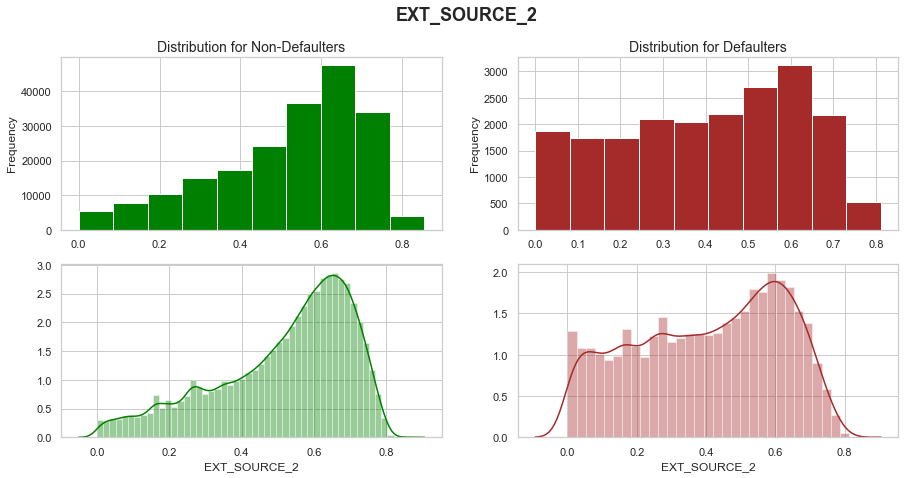

In [103]:
plotcont('EXT_SOURCE_2')

A lower value of EXT_SOURCE_2 score indicated high chances of defaults.

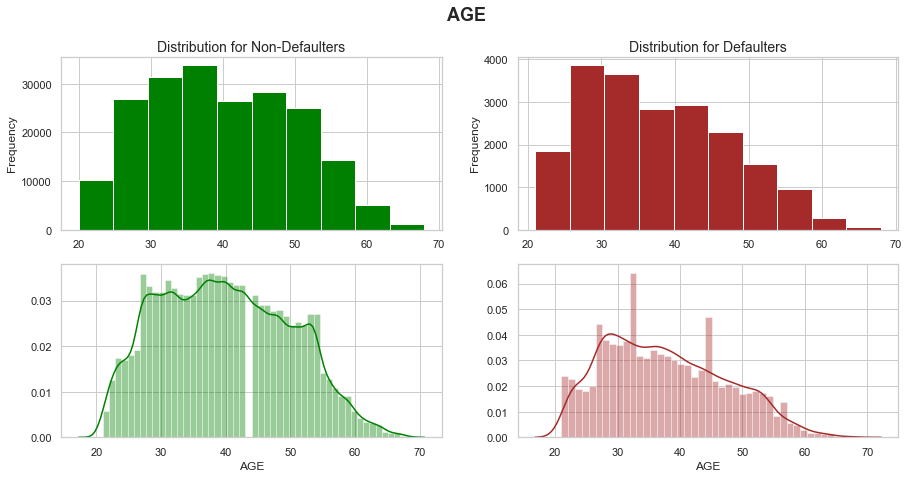

In [104]:
plotcont('AGE')

Defaulter distplot data is left skewed so younger people are likely to be defaulter as compared to older people.

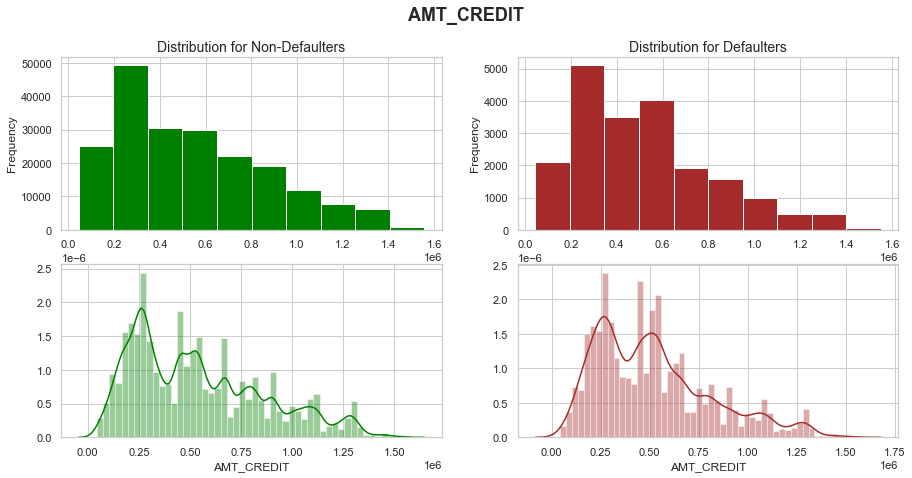

In [105]:
plotcont('AMT_CREDIT')

Defaulters were high for credit amount around 500k.

## Bivariate analysis for numerical variables

In [106]:
def plotbivarcontcont(var1,var2):
    
    print('\n')
    sns.set_style('whitegrid')
    f,axes = plt.subplots(2,2, figsize= (15,10))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var1, y=var2, data=T0, color= 'green', alpha= 0.02)
    plt.title('Non-Defaulters', fontsize=14)
    plt.xlabel(var1)

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var1, y=var2, data=T1, color= 'brown', alpha= 0.02)
    plt.title('Defaulters', fontsize=14)
    plt.xlabel(var1)

    f.suptitle(var1+' vs '+var2, fontsize=18, fontweight='bold')
    plt.show()

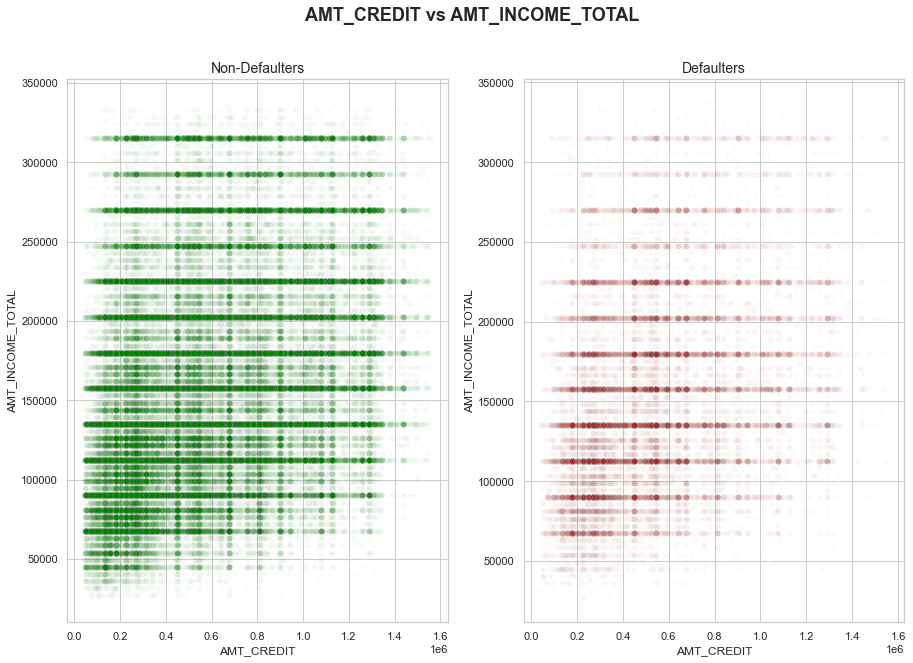

In [107]:
plotbivarcontcont('AMT_CREDIT', 'AMT_INCOME_TOTAL')

Lower desity of defaults where income is higher than 200k or credit is lower than 200k. 

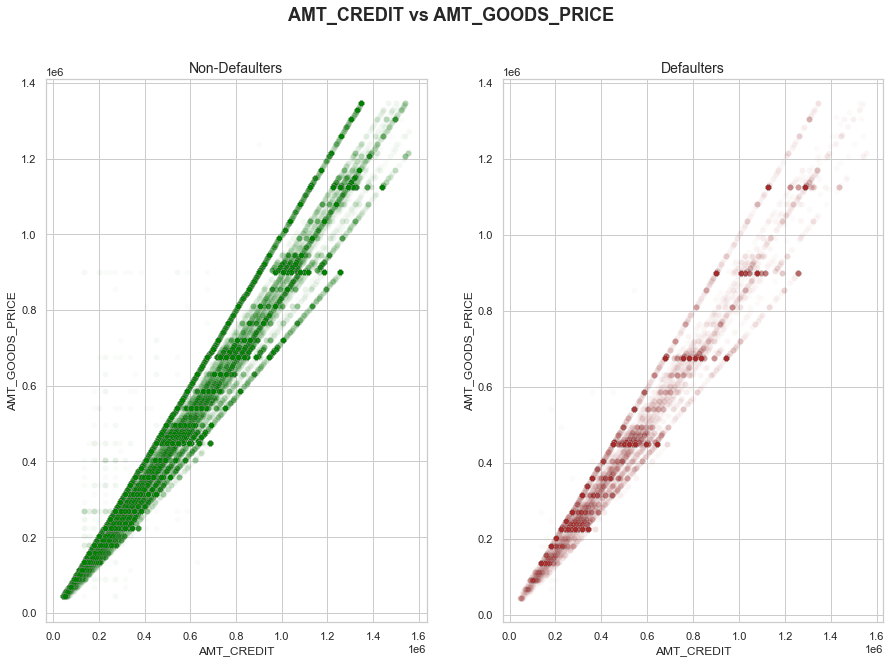

In [108]:
plotbivarcontcont('AMT_CREDIT', 'AMT_GOODS_PRICE')

A high positive correlation found between credit amount and goods price as expected by correlation analysis.

## Previous applications data analysis.

This data set contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [109]:
# Reading the dataset of previous application

previous_data = pd.read_csv("previous_application.csv")

In [110]:
previous_data.shape

(1670214, 37)

In [111]:
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [112]:
# Cleaning the missing data

# Percentage of null values in each column

null = previous_data.isnull().sum()/len(previous_data)*100
null[null>0].sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
RATE_DOWN_PAYMENT            53.636480
AMT_DOWN_PAYMENT             53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [113]:
# Removing columns having null percentage of more than 35.

previous_data = previous_data.loc[:, previous_data.isnull().mean() <= .35]

In [114]:
previous_data.shape

(1670214, 26)

In [115]:
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [116]:
previous_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [117]:
# XNA and XAP are replaced by NaN
previous_data= previous_data.replace('XNA', np.NaN)
previous_data= previous_data.replace('XAP', np.NaN)
previous_data.shape

(1670214, 26)

In [118]:
previous_data.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [119]:
previous_data.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

<b>
    As you can see above, the shape of preious application data is (1670214,26) and the length of SK_ID_PREV is also 1670214, but the length of SK_ID_CURR is 338857, which is less than that of SK_ID_PREV. Thus, tells us that there are duplicate number of SK_ID_PREV.

### Let's merge the dataframes based on SK_ID_CURR

    
After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously  taken loan more than once.

In [120]:
# Now merging the Application dataset with previous appliaction dataset

new_data= application_data.merge(previous_data, left_on= 'SK_ID_CURR', right_on= 'SK_ID_CURR', how= 'inner')

In [121]:
new_data.shape

(1013945, 99)

In [122]:
application_data.shape

(222998, 74)

In [123]:
new_data.SK_ID_CURR.value_counts()

265681    73
173680    72
382179    64
389950    64
198355    63
          ..
208126     1
220400     1
234729     1
257254     1
389919     1
Name: SK_ID_CURR, Length: 212574, dtype: int64

In [124]:
new_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                1             0          202500.0      406597.5   
1                0             0          270000.0     1293502.5   
2                0             0          270000.0     1293502.5   
3                0             0          270000.0     1293502.5   
4                1             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          637.0               3648   
1                    0.003541         1188.0               1186   
2                    0.003541         1188.0               1186   
3                    0.003541         1188.0               1186   
4                    0.010032          225.0               4260   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0           2120.0           1               1                0   
1            291.0           1               1                0   
2            291.0           1               1                0   
3            291.0           1               1                0   
4           2531.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

In [125]:
new_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL

In [126]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
  

In [127]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

## Univariate analysis on the merged data. 

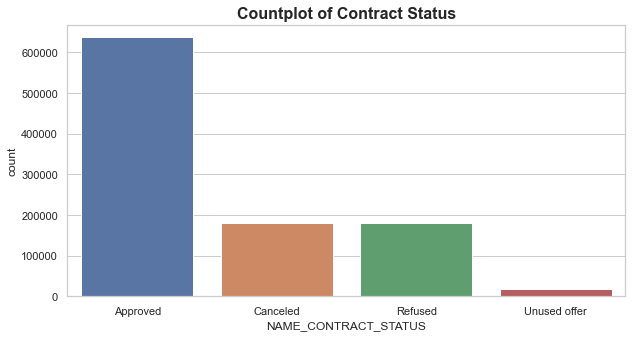

In [128]:
plt.figure(figsize=(10,5))
sns.countplot(new_data.NAME_CONTRACT_STATUS)
plt.title('Countplot of Contract Status', fontweight= 'bold', fontsize= 16)
plt.show()

Splitting new dataset into four datasets as per Contract Status

In [129]:
approved= new_data[new_data.NAME_CONTRACT_STATUS=='Approved']
refused= new_data[new_data.NAME_CONTRACT_STATUS=='Refused']
cancelled= new_data[new_data.NAME_CONTRACT_STATUS=='Canceled']
unused= new_data[new_data.NAME_CONTRACT_STATUS=='Unused Offer']

### Analysing TARGET variable across new datasets

In [130]:
def plot_func(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,7))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=20, fontweight= 'bold')
    ax1.set_xlabel('%s' %var, fontsize= 20)
    ax1.set_ylabel("Count of Loans", fontsize= 20)
    s1.set_xticklabels(s1.get_xticklabels(), fontsize= 14)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    ax2.set_xlabel('%s' %var, fontsize= 20)
    ax2.set_ylabel("Count of Loans", fontsize= 20)
    ax2.set_title("Approved", fontsize=20, fontweight= 'bold')
    s2.set_xticklabels(s1.get_xticklabels(), fontsize= 14)
    
    
    s3=sns.countplot(ax=ax3,x=cancelled[var], data=cancelled, order= cancelled[var].value_counts().index,)
    ax3.set_title("Cancelled", fontsize=20, fontweight= 'bold')
    ax3.set_xlabel('%s' %var, fontsize= 20)
    ax3.set_ylabel("Count of Loans", fontsize= 20)
    s3.set_xticklabels(s1.get_xticklabels(), fontsize= 14)
    
    plt.show()

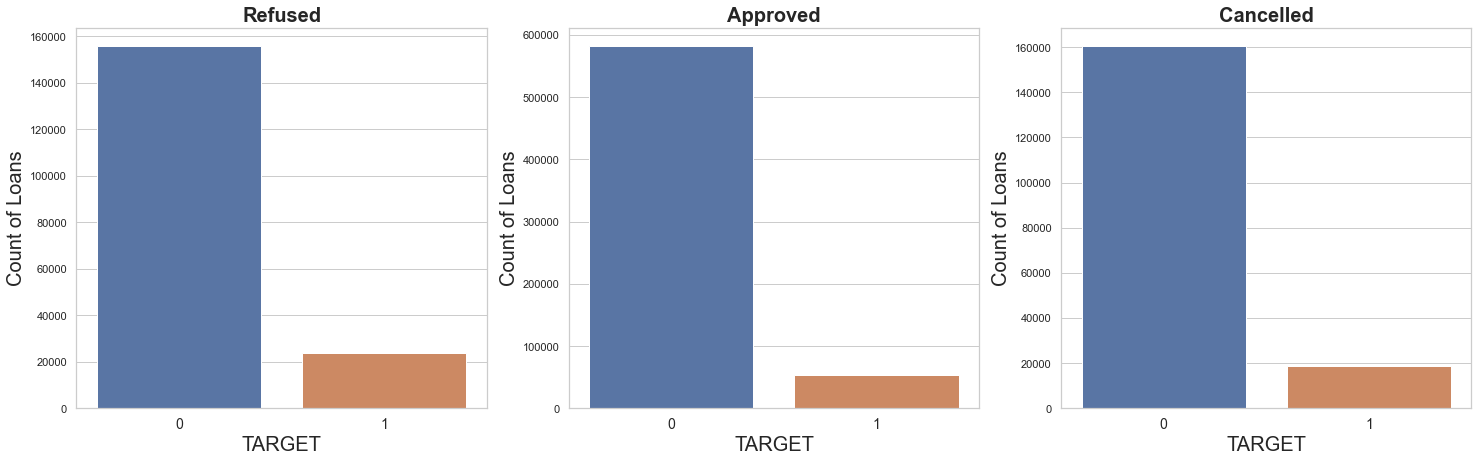

In [131]:
plot_func('TARGET')

In [132]:
refused.TARGET.value_counts(normalize=True)

0    0.867553
1    0.132447
Name: TARGET, dtype: float64

In [133]:
approved.TARGET.value_counts(normalize=True)

0    0.915462
1    0.084538
Name: TARGET, dtype: float64

In [134]:
cancelled.TARGET.value_counts(normalize=True)

0    0.895759
1    0.104241
Name: TARGET, dtype: float64

Loans which were previously refused or cancelled had a higher default rate.

## Bivariate Analysis on the new datasets


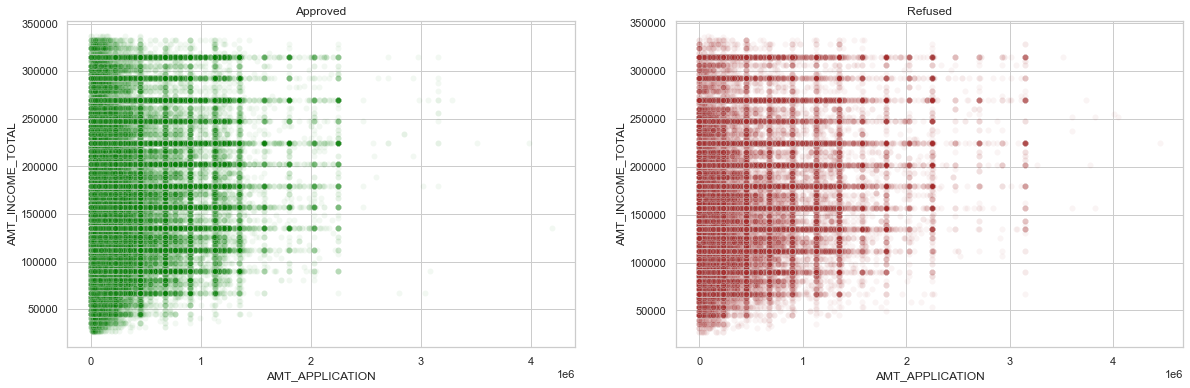

In [135]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved, alpha= 0.05, color= 'green')
plt.title('Approved')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused, alpha= 0.05, color= 'brown')
plt.title('Refused')
plt.show()

Loan request higher than 200k had a higher rejection rate compared to approveal rate. Also loan rejection rate was much lower if the income was higher than 300k.

Splitting new merged data as per TARGET variable.(Defaulter and Non-Defaulter)

In [136]:
new_T0 = new_data.loc[new_data['TARGET'] == 0]
new_T1 = new_data.loc[new_data['TARGET'] == 1]

## Correlation between drivers in the merged data

### Non-Defaulters

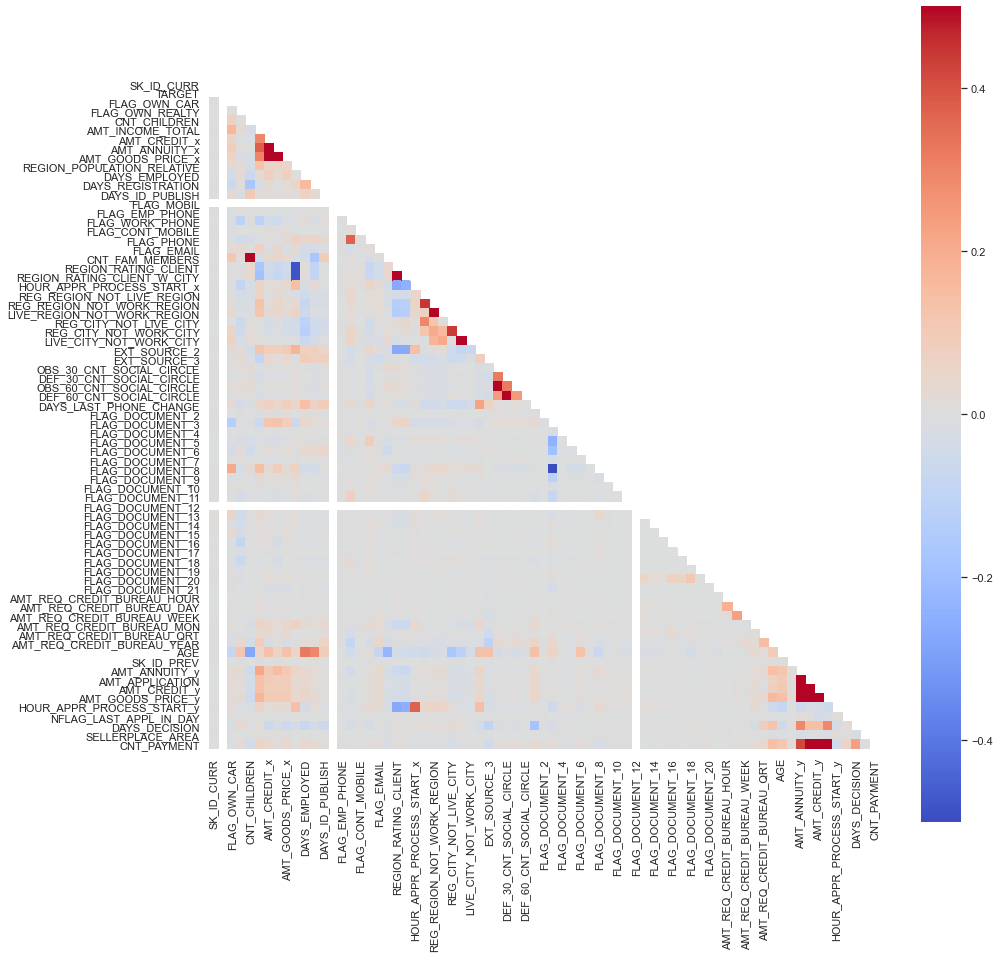

In [137]:
corr= new_T0.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax= plt.subplots(figsize=(15,15))
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-0.5, vmax=0.5, square=True, cmap='coolwarm')

### Defaulters

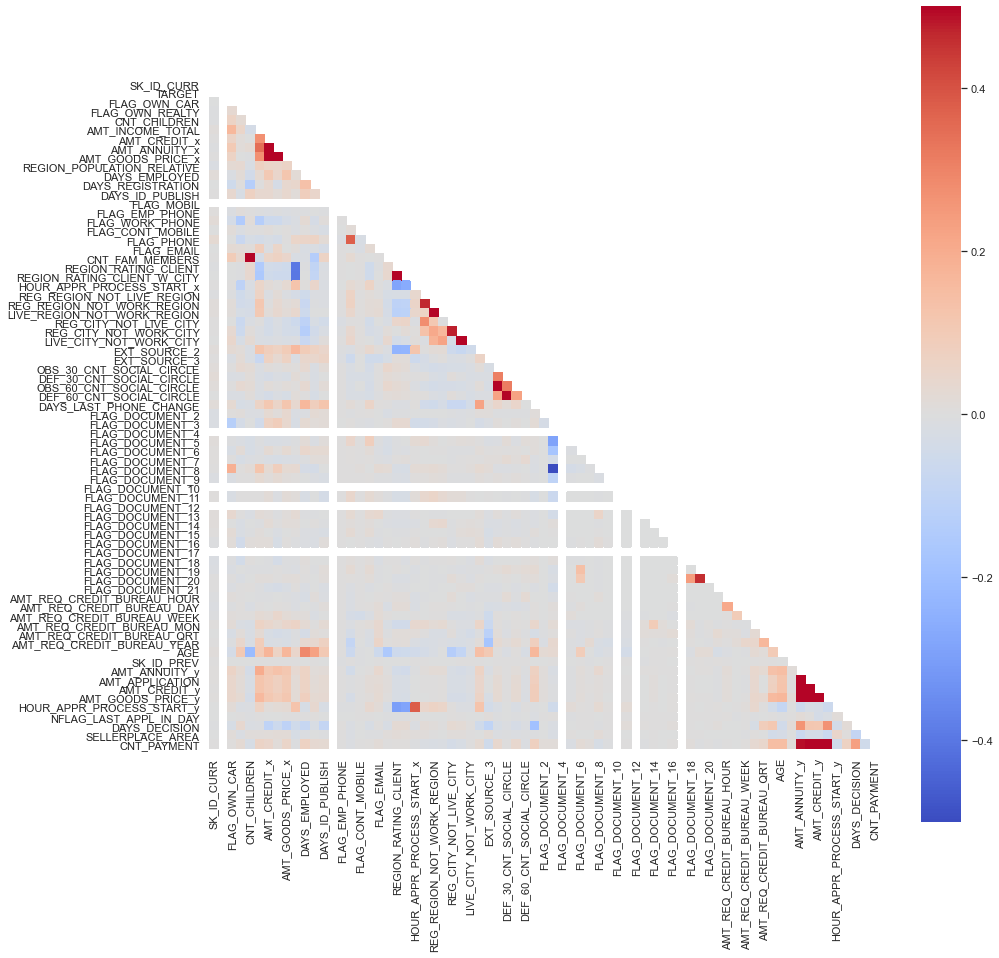

In [138]:
corr= new_T1.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax= plt.subplots(figsize=(15,15))
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-0.5, vmax=0.5, square=True, cmap='coolwarm')

### Top 10 correlations: Non-Defaulters

In [139]:
corr0= new_T0.corr().abs().unstack().sort_values(kind='quicksort')
corr0= corr0.dropna()
corr0= corr0[corr0 != 1.0]
corr0= corr0.drop_duplicates()
corr0

NFLAG_LAST_APPL_IN_DAY    FLAG_DOCUMENT_15              4.946992e-07
FLAG_WORK_PHONE           FLAG_DOCUMENT_21              2.277142e-06
OBS_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_21              5.065430e-06
FLAG_DOCUMENT_19          AMT_REQ_CREDIT_BUREAU_YEAR    5.700602e-06
SK_ID_PREV                FLAG_DOCUMENT_13              7.587390e-06
                                                            ...     
AMT_APPLICATION           AMT_CREDIT_y                  9.703614e-01
AMT_CREDIT_x              AMT_GOODS_PRICE_x             9.812620e-01
AMT_GOODS_PRICE_y         AMT_CREDIT_y                  9.925035e-01
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE      9.985625e-01
AMT_APPLICATION           AMT_GOODS_PRICE_y             9.998481e-01
Length: 2415, dtype: float64

In [140]:
top10_T0= corr0.tail(10)
top10_T0

AMT_ANNUITY_y               AMT_GOODS_PRICE_y              0.824009
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.867107
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.872864
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.894411
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.944162
AMT_APPLICATION             AMT_CREDIT_y                   0.970361
AMT_CREDIT_x                AMT_GOODS_PRICE_x              0.981262
AMT_GOODS_PRICE_y           AMT_CREDIT_y                   0.992503
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998563
AMT_APPLICATION             AMT_GOODS_PRICE_y              0.999848
dtype: float64

In [141]:
top10_df= new_T0[['AMT_ANNUITY_y',
                  'AMT_GOODS_PRICE_y',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'REG_REGION_NOT_WORK_REGION',
                  'LIVE_REGION_NOT_WORK_REGION',
                  'CNT_FAM_MEMBERS',
                  'CNT_CHILDREN',
                  'REGION_RATING_CLIENT_W_CITY',
                  'REGION_RATING_CLIENT',
                  'AMT_APPLICATION',
                  'AMT_CREDIT_y',
                  'AMT_CREDIT_x',
                  'AMT_GOODS_PRICE_x',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE']]

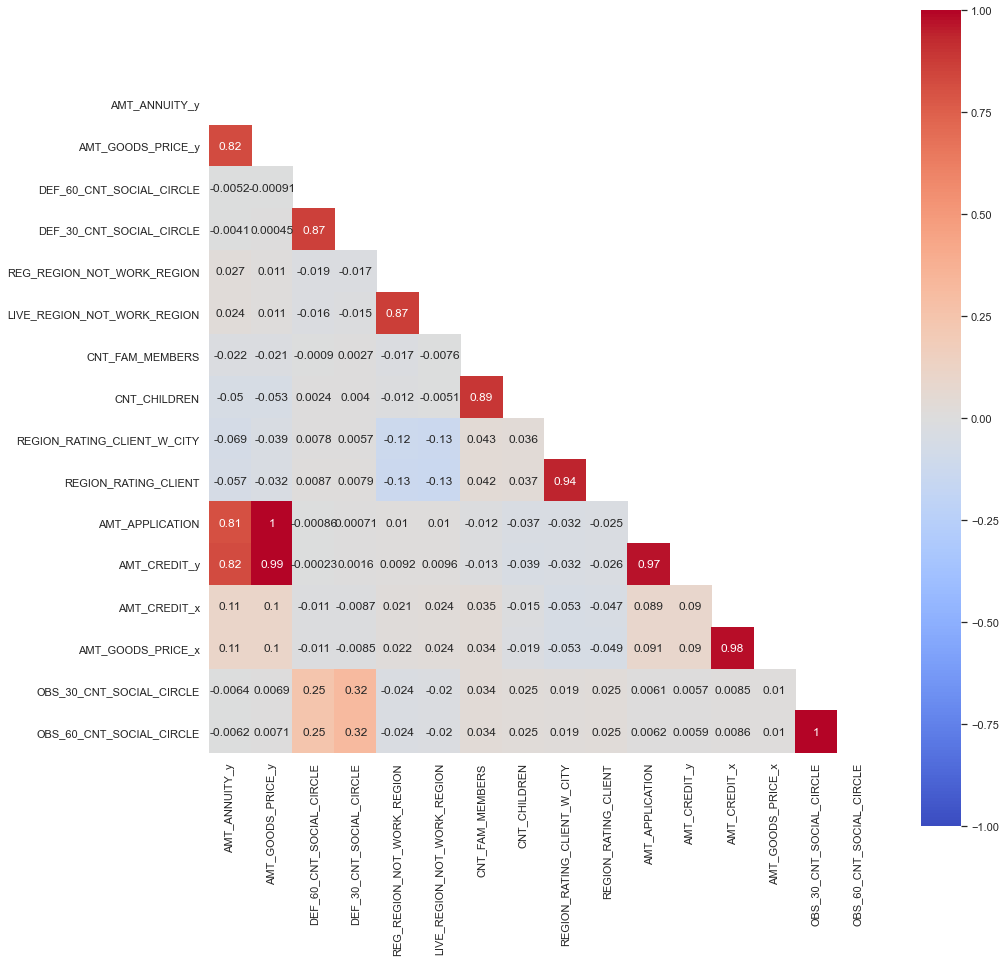

In [142]:
# Correlation Table.

corr= top10_df.corr()

# Masking repeated values.

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

# Plotting.

f, ax= plt.subplots(figsize=(15,15))
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, cmap='coolwarm',annot=True)

### Top 10 correlations: Defaulters

In [143]:
corr1= new_T1.corr().abs().unstack().sort_values(kind='quicksort')
corr1= corr1.dropna()
corr1= corr1[corr1 != 1.0]
corr1= corr1.drop_duplicates()
corr1

FLAG_PHONE                CNT_FAM_MEMBERS              0.000002
AMT_ANNUITY_x             OBS_30_CNT_SOCIAL_CIRCLE     0.000005
CNT_PAYMENT               FLAG_DOCUMENT_11             0.000006
FLAG_DOCUMENT_16          AMT_REQ_CREDIT_BUREAU_MON    0.000006
SK_ID_PREV                SELLERPLACE_AREA             0.000016
                                                         ...   
AMT_CREDIT_y              AMT_APPLICATION              0.971396
AMT_GOODS_PRICE_x         AMT_CREDIT_x                 0.977593
AMT_CREDIT_y              AMT_GOODS_PRICE_y            0.991325
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998340
AMT_GOODS_PRICE_y         AMT_APPLICATION              0.999658
Length: 2211, dtype: float64

In [144]:
top10_T1= corr1.tail(10)
top10_T1

AMT_CREDIT_y                 AMT_ANNUITY_y                 0.844570
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.851966
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.873279
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.895862
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.961163
AMT_CREDIT_y                 AMT_APPLICATION               0.971396
AMT_GOODS_PRICE_x            AMT_CREDIT_x                  0.977593
AMT_CREDIT_y                 AMT_GOODS_PRICE_y             0.991325
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998340
AMT_GOODS_PRICE_y            AMT_APPLICATION               0.999658
dtype: float64

In [145]:
top10_df= new_T1[['AMT_ANNUITY_y',
                  'AMT_GOODS_PRICE_y',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'REG_REGION_NOT_WORK_REGION',
                  'LIVE_REGION_NOT_WORK_REGION',
                  'CNT_FAM_MEMBERS',
                  'CNT_CHILDREN',
                  'REGION_RATING_CLIENT_W_CITY',
                  'REGION_RATING_CLIENT',
                  'AMT_APPLICATION',
                  'AMT_CREDIT_y',
                  'AMT_CREDIT_x',
                  'AMT_GOODS_PRICE_x',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE']]

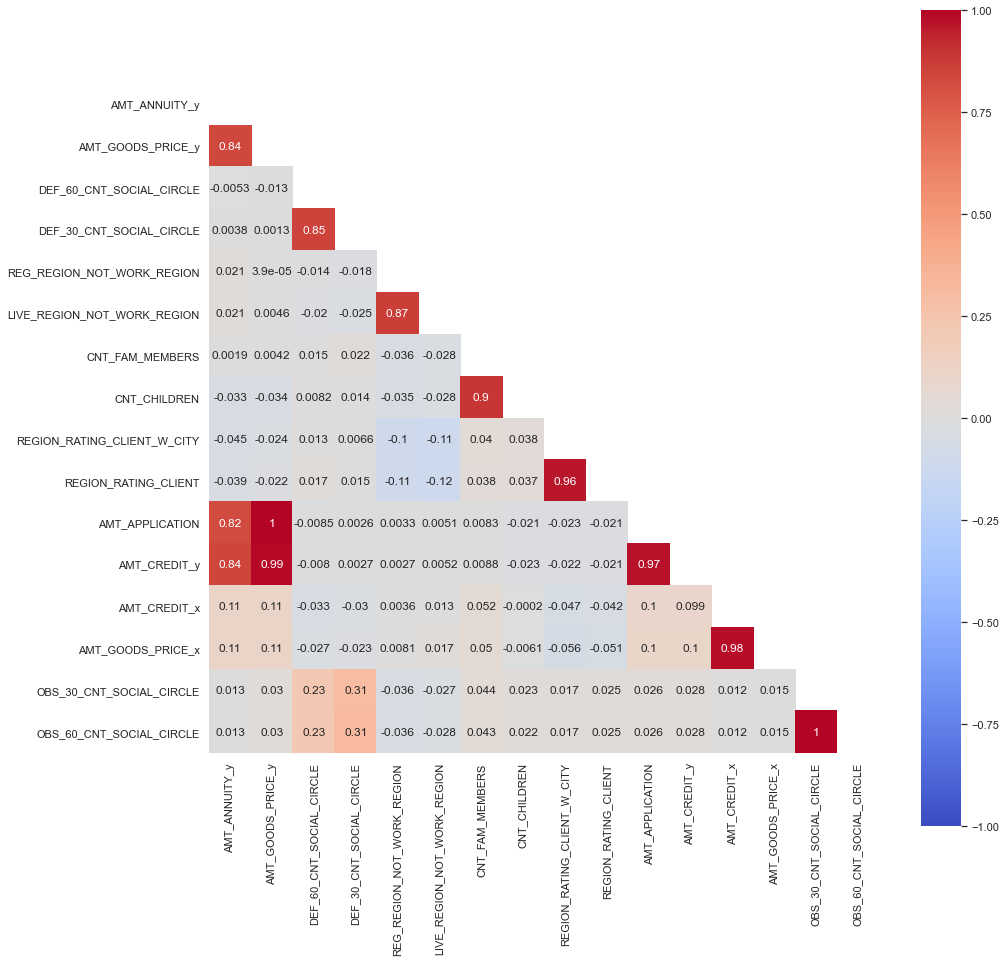

In [146]:
# Correlation Table.

corr= top10_df.corr()

# Masking repeated values.

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

# Plotting.

f, ax= plt.subplots(figsize=(15,15))
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, cmap='coolwarm',annot=True)

### Bivariate analysis on cetegorical columns

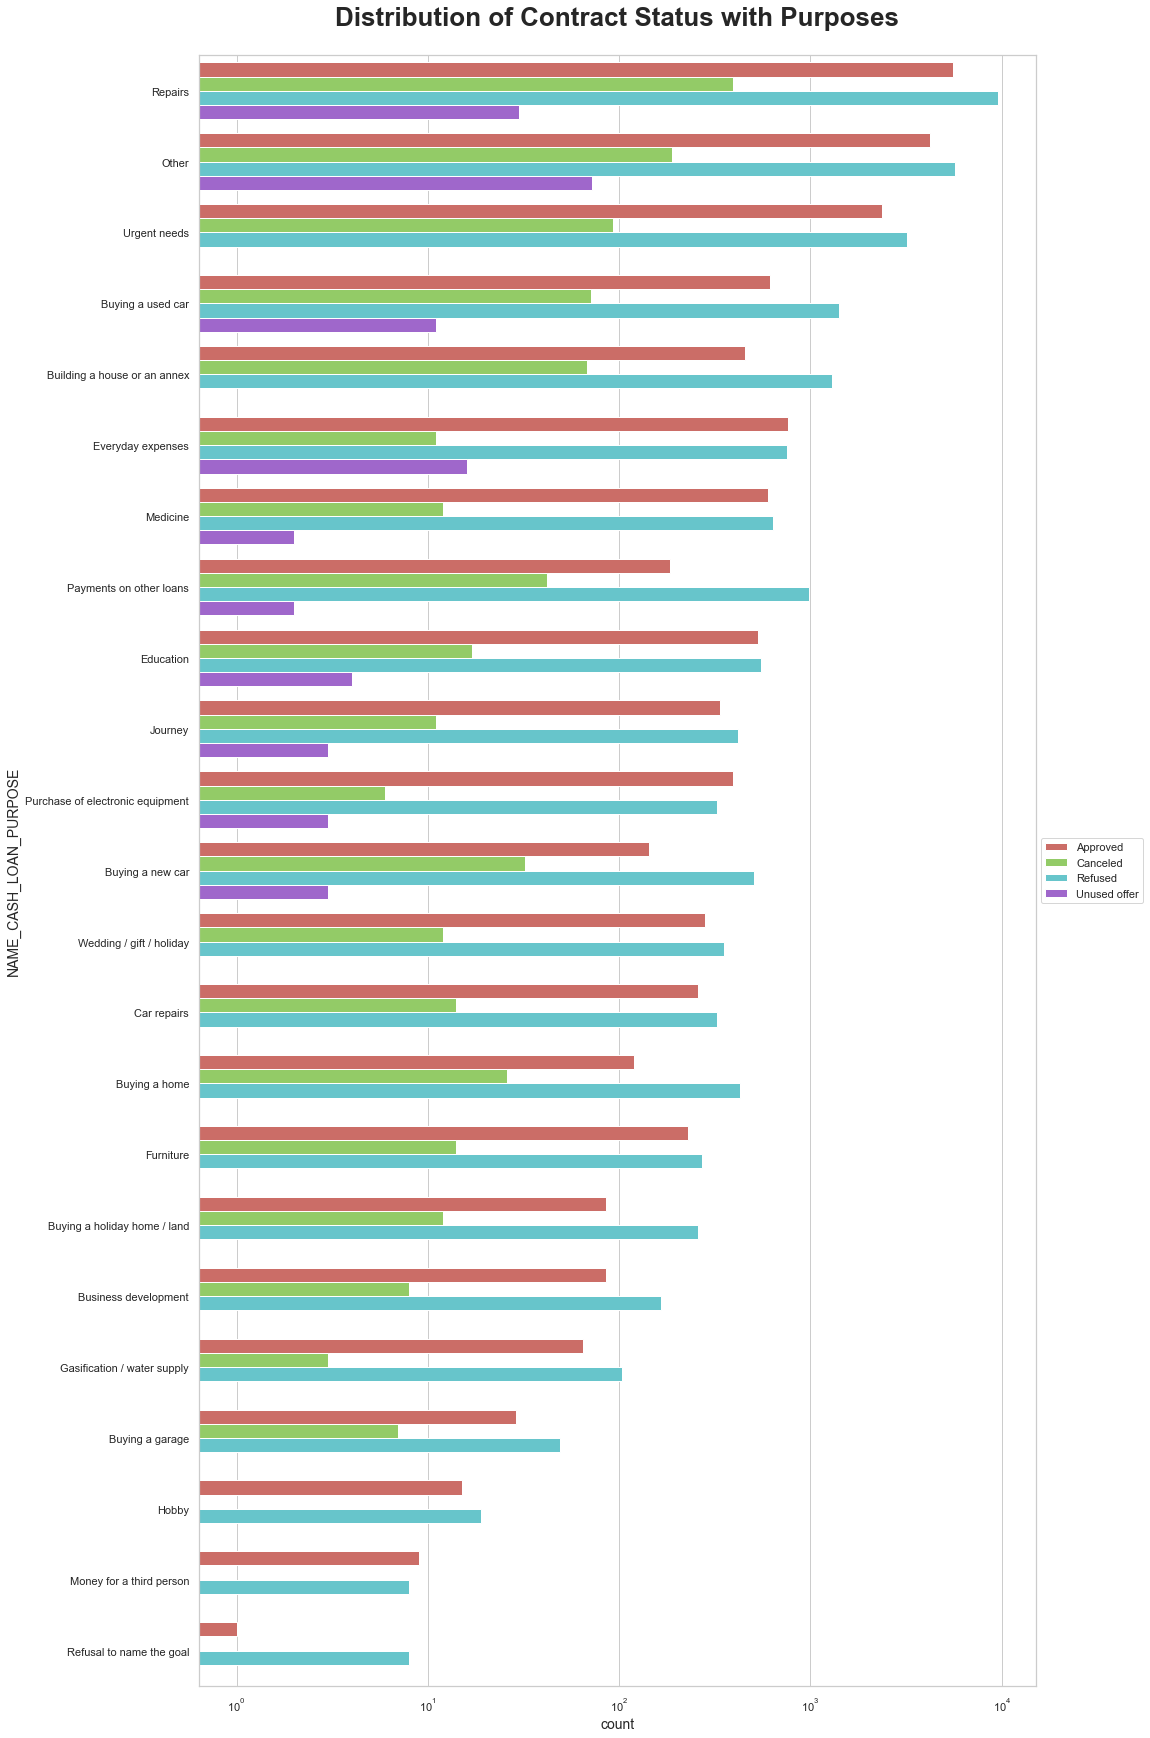

In [147]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
# sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
# plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes', fontsize= 26, fontweight= 'bold')
ax = sns.countplot(data = new_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='hls')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.show()
# sns.reset_defaults

Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection.
3. Paying other loans , buying a home and buying a new car is having significant higher rejection than approves.

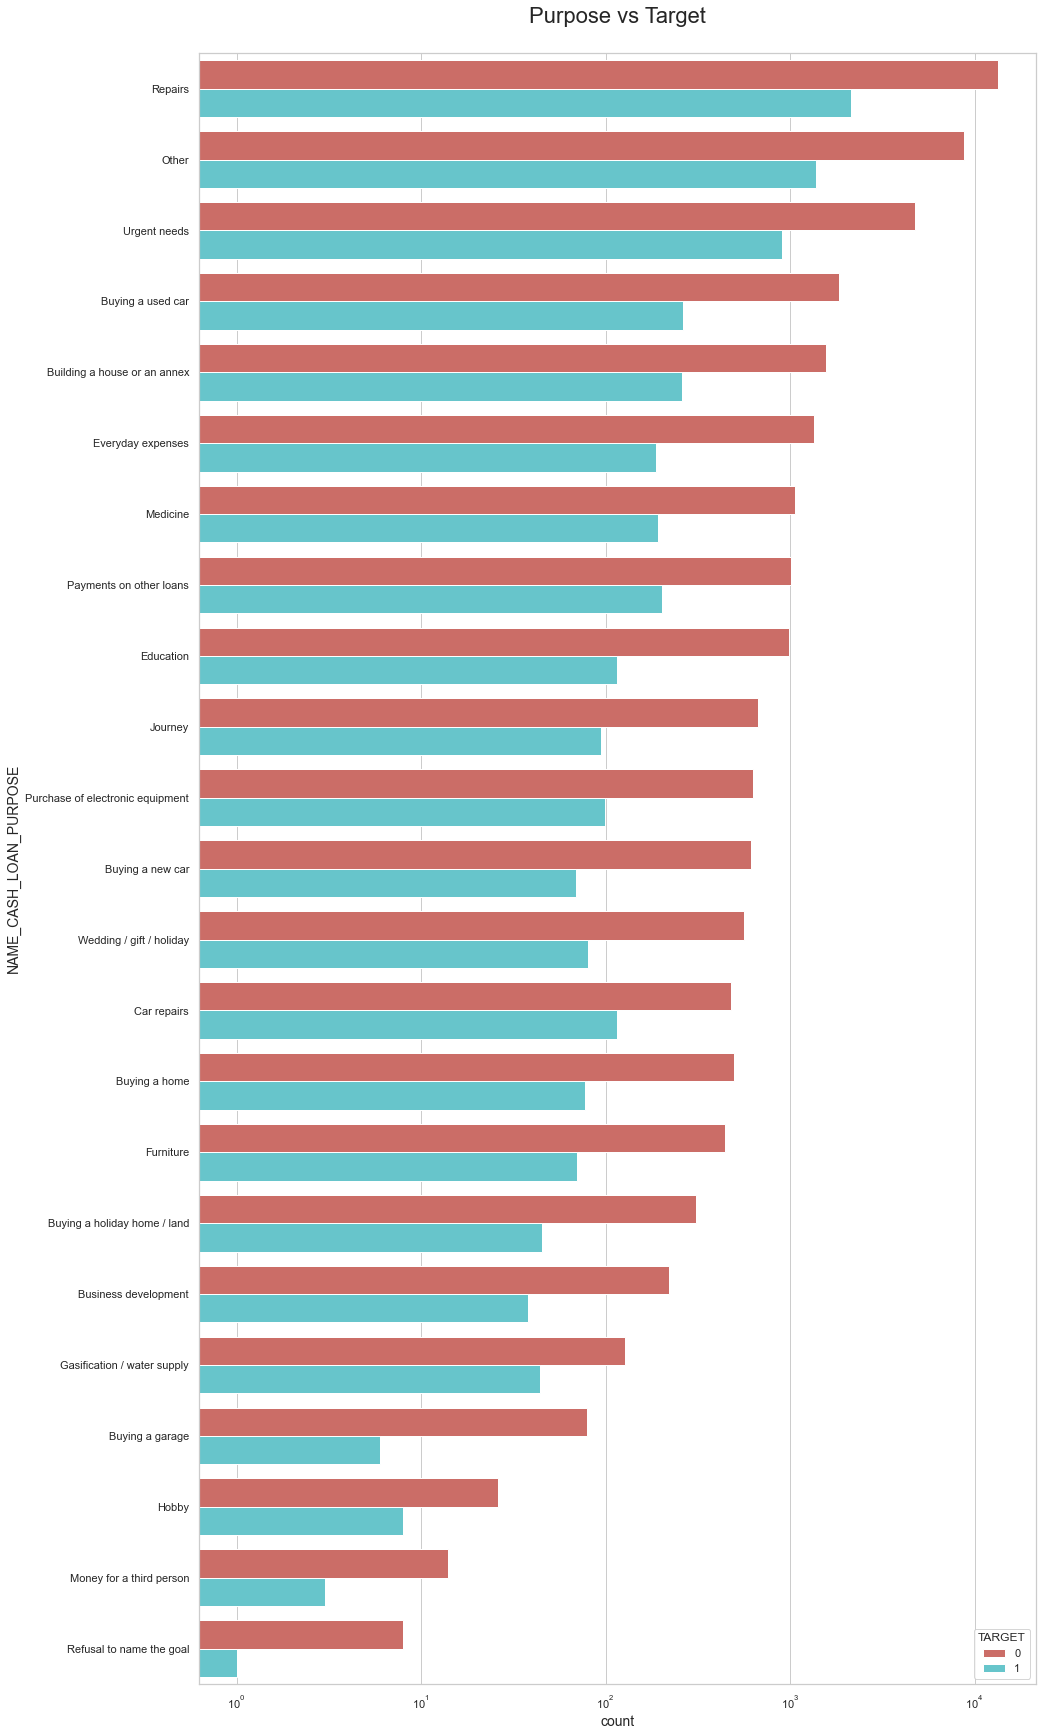

In [148]:
# Distribution of contract status

sns.set_style('whitegrid')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
# plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Purpose vs Target')
ax = sns.countplot(data = new_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='hls')
plt.show()

Few points we can conclude from above plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land', 'Buying a new car' and 'Education'
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

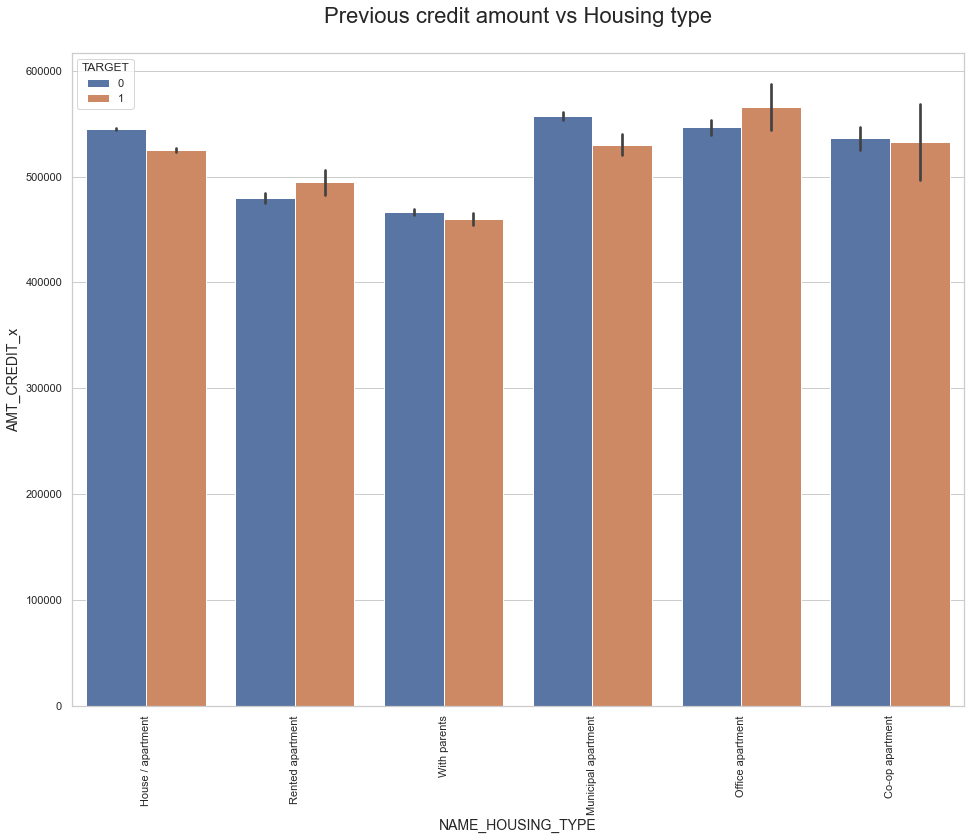

In [149]:
# Bar plotting for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_data, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Previous credit amount vs Housing type')
plt.show()

Here for Housing type, office apartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with House\apartment or municipal apartment for successful payments.

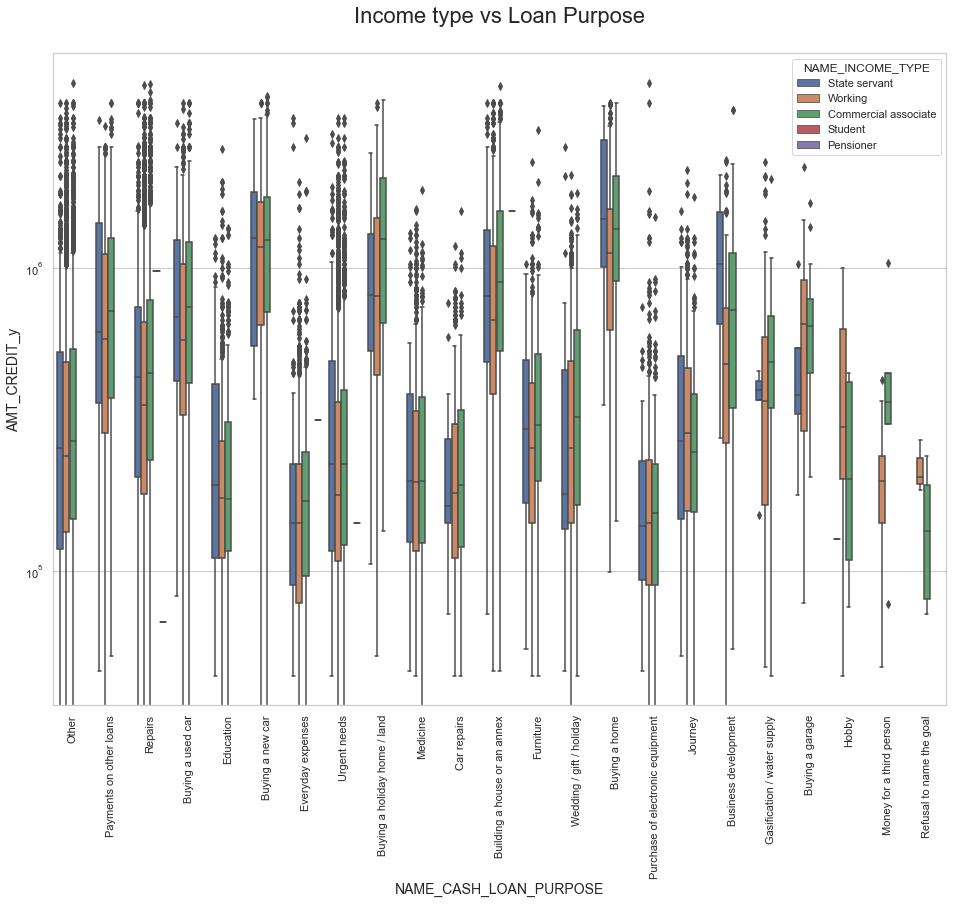

In [150]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_T0, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y')
plt.title('Income type vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

These are some of the important analyses that have been done of the credit information. With this we end our analysis.